In [1]:
####  Awa SAMAKE

# la librairie principale pour la gestion des données
import pandas as pd

# la librairie pour normalizer les données par Z-Score
from sklearn.preprocessing import StandardScaler

#
from math import *
import numpy as np
import seaborn as sns
# split
from sklearn.model_selection import train_test_split


# algorithmes
from sklearn.decomposition import PCA
# from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
#
from sklearn.mixture import GaussianMixture


# metriques
from sklearn import metrics


# plot 
from sklearn.metrics import plot_confusion_matrix, mean_squared_error
#
import matplotlib.pyplot as plt
%matplotlib inline 

###############---------------- Times Series
import statsmodels.api as sm
#
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# 
from statsmodels.tsa.stattools import acf, pacf
from mpl_toolkits.mplot3d.axes3d import Axes3D
#
from statsmodels.tsa.stattools import adfuller


# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



import warnings

warnings.simplefilter('ignore')


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# ==========================================
# ====CHARGEMENT DES DONNÉES EN MÉMOIRE=====
# ==========================================

# Charger en mémoire les features préparées (pré-traités)
features = pd.read_csv("./data_final_test_genothidx_preprocessed.csv") 
features.head()

Unnamed: 0  HRD_ID  HRD_PRV_CD  ANM_ID ENTER_HERD_DATE  COMPTR_NO  REGION  \
0           0    1687           4       1      2007-03-09      508.0      12   
1           1    1687           4       1      2007-03-09      508.0      12   
2           2    1687           4       1      2007-03-09      508.0      12   
3           3    1687           4       1      2007-03-09      508.0      12   
4           4    1687           4       1      2007-03-09      508.0      12   

   BIRTH_DATE LEFT_HERD_DATE  LHR_CD  ...     MT     DF     CA    DCA    BCS  \
0  2007-03-09     2014-12-15    14.0  ...  103.0  104.0  105.0  100.0  100.0   
1  2007-03-09     2014-12-15    14.0  ...  103.0  104.0  105.0  100.0  100.0   
2  2007-03-09     2014-12-15    14.0  ...  103.0  104.0  105.0  100.0  100.0   
3  2007-03-09     2014-12-15    14.0  ...  103.0  104.0  105.0  100.0  100.0   
4  2007-03-09     2014-12-15    14.0  ...  103.0  104.0  105.0  100.0  100.0   

     MR  THURL_PLACE   MDR  profit  cumul_profit  
0  99.0          2.0  98.0   14.13         523.0  
1  99.0          2.0  98.0   15.17         843.0  
2  99.0          2.0  98.0   16.12        1296.0  
3  99.0          2.0  98.0   19.86        1918.0  
4  99.0          2.0  98.0   15.34        2417.0  

[5 rows x 83 columns]

In [3]:
# Initialisation des données
x = features.iloc[:, 1:].copy() # "x" contient l'ensemble des données d'entrainement
y = x["profit"]      # "y" contient les étiquettes des enregistrements dans "x"

# Elimination 
x = x.drop(['profit'], axis=1)
x.head()

HRD_ID  HRD_PRV_CD  ANM_ID ENTER_HERD_DATE  COMPTR_NO  REGION  BIRTH_DATE  \
0    1687           4       1      2007-03-09      508.0      12  2007-03-09   
1    1687           4       1      2007-03-09      508.0      12  2007-03-09   
2    1687           4       1      2007-03-09      508.0      12  2007-03-09   
3    1687           4       1      2007-03-09      508.0      12  2007-03-09   
4    1687           4       1      2007-03-09      508.0      12  2007-03-09   

  LEFT_HERD_DATE  LHR_CD  LHR_CD_2  ...    MSP     MT     DF     CA    DCA  \
0     2014-12-15    14.0       8.0  ...  102.0  103.0  104.0  105.0  100.0   
1     2014-12-15    14.0       8.0  ...  102.0  103.0  104.0  105.0  100.0   
2     2014-12-15    14.0       8.0  ...  102.0  103.0  104.0  105.0  100.0   
3     2014-12-15    14.0       8.0  ...  102.0  103.0  104.0  105.0  100.0   
4     2014-12-15    14.0       8.0  ...  102.0  103.0  104.0  105.0  100.0   

     BCS    MR  THURL_PLACE   MDR  cumul_profit  
0  100.0  99.0          2.0  98.0         523.0  
1  100.0  99.0          2.0  98.0         843.0  
2  100.0  99.0          2.0  98.0        1296.0  
3  100.0  99.0          2.0  98.0        1918.0  
4  100.0  99.0          2.0  98.0        2417.0  

[5 rows x 81 columns]

In [4]:
x.shape

(60740, 81)

In [5]:
x[['ANM_ID', 'HRD_ID', 'TEST_DATE']]

ANM_ID  HRD_ID   TEST_DATE
0           1    1687  2009-10-26
1           1    1687  2009-11-18
2           1    1687  2009-12-17
3           1    1687  2010-01-20
4           1    1687  2010-02-18
...       ...     ...         ...
60735   13953    2994  2007-07-09
60736   13953    2994  2007-09-11
60737   13953    2994  2007-10-09
60738   13953    2994  2007-11-19
60739   13953    2994  2007-12-11

[60740 rows x 3 columns]

## Normalisation & PCA

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60740 entries, 0 to 60739
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HRD_ID               60740 non-null  int64  
 1   HRD_PRV_CD           60740 non-null  int64  
 2   ANM_ID               60740 non-null  int64  
 3   ENTER_HERD_DATE      60740 non-null  object 
 4   COMPTR_NO            60740 non-null  float64
 5   REGION               60740 non-null  int64  
 6   BIRTH_DATE           60740 non-null  object 
 7   LEFT_HERD_DATE       56238 non-null  object 
 8   LHR_CD               60740 non-null  float64
 9   LHR_CD_2             60740 non-null  float64
 10  ANB_CD               60740 non-null  int64  
 11  COU_CD               60740 non-null  int64  
 12  REG_ID               60740 non-null  float64
 13  ANB_CD_DAM           60740 non-null  int64  
 14  COU_CD_DAM           60740 non-null  int64  
 15  DAM_REG_ID           60740 non-null 

In [7]:
# To get the 'object' features
list_cols_object = []
for col in x.columns:
    if x[col].dtypes =='object':
        list_cols_object.append(col)
print(list_cols_object)
print( len(list_cols_object))

['ENTER_HERD_DATE', 'BIRTH_DATE', 'LEFT_HERD_DATE', 'TEST_DATE']
4


In [8]:
# to get all columns 'date'
cols_date = []
for col in list_cols_object:
    if 'DATE' in col:
        cols_date.append(col)
cols_date

['ENTER_HERD_DATE', 'BIRTH_DATE', 'LEFT_HERD_DATE', 'TEST_DATE']

In [9]:
# col_date = ['END_DATE', 'START_DATE', 'ENTER_HERD_DATE', 'BIRTH_DATE', 'LEFT_HERD_DATE', 
#        'OBSRVD_DATE_WGT', 'OBSRVD_DATE_BCS', 'PRGNCY_CHK_DATE', 'MILKNG_SPEED_DATE', 'INDX_DATE']
for date in cols_date:
    x[date]= pd.to_datetime(x[date])#, format = '%d/%m/%Y' '%H-%M-%S')

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60740 entries, 0 to 60739
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   HRD_ID               60740 non-null  int64         
 1   HRD_PRV_CD           60740 non-null  int64         
 2   ANM_ID               60740 non-null  int64         
 3   ENTER_HERD_DATE      60740 non-null  datetime64[ns]
 4   COMPTR_NO            60740 non-null  float64       
 5   REGION               60740 non-null  int64         
 6   BIRTH_DATE           60740 non-null  datetime64[ns]
 7   LEFT_HERD_DATE       56238 non-null  datetime64[ns]
 8   LHR_CD               60740 non-null  float64       
 9   LHR_CD_2             60740 non-null  float64       
 10  ANB_CD               60740 non-null  int64         
 11  COU_CD               60740 non-null  int64         
 12  REG_ID               60740 non-null  float64       
 13  ANB_CD_DAM           60740 non-

In [10]:
# Description des données de manière générale 
print('Statistiques descriptives: \n')
x.describe()

Statistiques descriptives: 



HRD_ID  HRD_PRV_CD        ANM_ID     COMPTR_NO        REGION  \
count  60740.000000     60740.0  60740.000000  60740.000000  60740.000000   
mean    3437.184491         4.0   6974.436813    624.696032      9.759911   
std     1963.153232         0.0   4031.119242    380.327113      6.024751   
min        3.000000         4.0      1.000000      1.000000      1.000000   
25%     1729.000000         4.0   3484.000000    393.000000      3.000000   
50%     3482.000000         4.0   7036.000000    547.000000     12.000000   
75%     5131.000000         4.0  10435.000000    753.000000     16.000000   
max     6788.000000         4.0  13953.000000   4397.000000     18.000000   

             LHR_CD     LHR_CD_2        ANB_CD        COU_CD        REG_ID  \
count  60740.000000  60740.00000  60740.000000  60740.000000  6.074000e+04   
mean      16.375749      8.44893      2.883602      1.000346  1.149010e+06   
std        7.923166      2.81903      0.609812      0.020285  6.567042e+05   
min        1.000000      2.00000      0.000000      0.000000  2.900000e+01   
25%       10.000000      8.00000      3.000000      1.000000  5.766840e+05   
50%       14.000000      8.00000      3.000000      1.000000  1.147536e+06   
75%       24.000000      8.00000      3.000000      1.000000  1.731515e+06   
max       33.000000     33.00000      4.000000      2.000000  2.271389e+06   

       ...           MSP            MT            DF            CA  \
count  ...  60740.000000  60740.000000  60740.000000  60740.000000   
mean   ...     99.248765     99.292838    100.834541     98.456767   
std    ...      2.991339      2.752153      2.651533      3.401343   
min    ...     87.000000     87.000000     92.000000     81.000000   
25%    ...     97.000000     97.000000     99.000000     96.000000   
50%    ...     99.000000     99.000000    101.000000     99.000000   
75%    ...    101.000000    101.000000    103.000000    101.000000   
max    ...    109.000000    109.000000    110.000000    109.000000   

                DCA           BCS            MR   THURL_PLACE           MDR  \
count  60740.000000  60740.000000  60740.000000  60740.000000  60740.000000   
mean      99.130902    101.360915     98.748387     -0.301136     97.591785   
std        2.552332      2.735556      2.594618      2.765797      2.760226   
min       88.000000     93.000000     89.000000    -12.000000     87.000000   
25%       97.000000    100.000000     97.000000     -2.000000     96.000000   
50%       99.000000    102.000000     99.000000      0.000000     98.000000   
75%      101.000000    103.000000    100.000000      1.000000     99.000000   
max      109.000000    111.000000    110.000000     10.000000    109.000000   

       cumul_profit  
count  60740.000000  
mean    2550.500938  
std     2131.571605  
min    -2884.000000  
25%      672.000000  
50%     2281.000000  
75%     3984.000000  
max    15054.000000  

[8 rows x 76 columns]

In [11]:
# def Downcast(df):
#     '''Downcasts df columns to smaller columns types'''
#     for col in df.columns:
#         try:
#             df[col]=pd.to_numeric(df[col],downcast='float')
#             df[col]=pd.to_numeric(df[col],downcast='unsigned')
#             print(col ,"has been downcasted to", df[col].dtypes)
#         except:
#             #If it doesn't downcast, aware the user
#             print(col ,"has not been downcasted")
#     return df

In [12]:
# x = Downcast(x)

profit


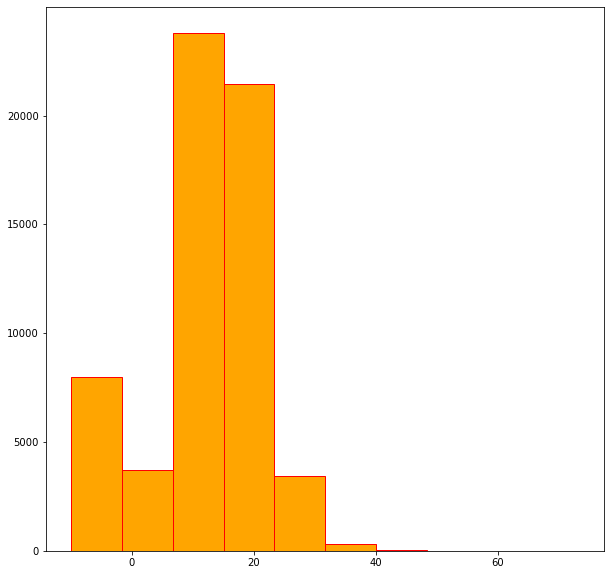

cumul_profit


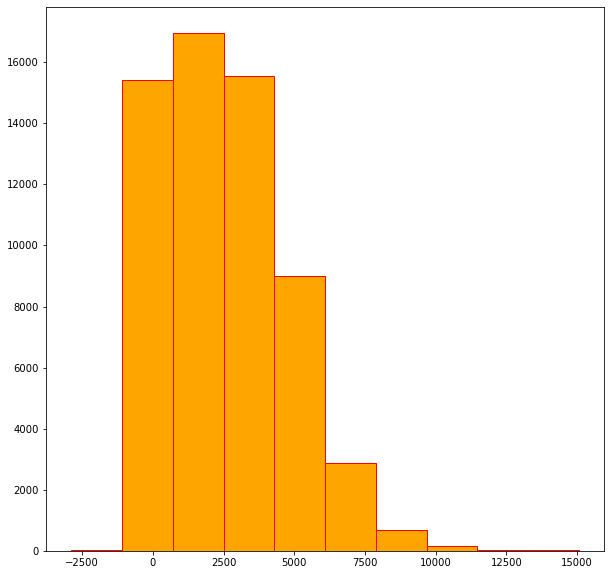

In [13]:
col = ['profit', 'cumul_profit']
for i in col:
    print(i)
    plt.figure(figsize=(10,10))
    plt.hist(features[i], color='orange', edgecolor='red') #bins= int(features.shape[0]/100000),
    plt.show()

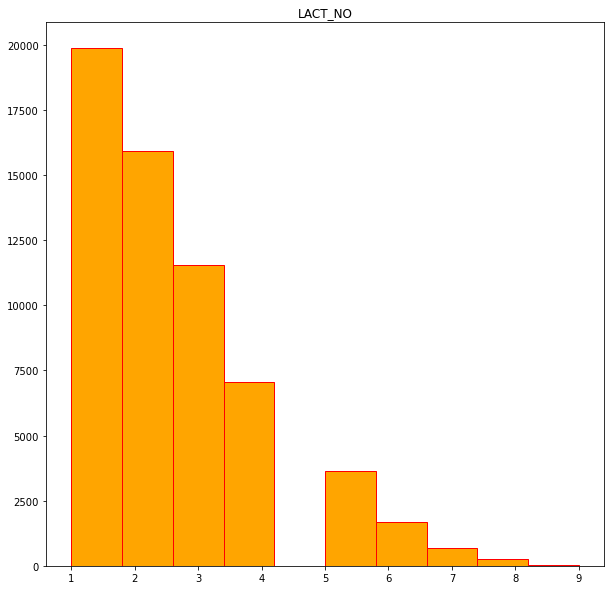

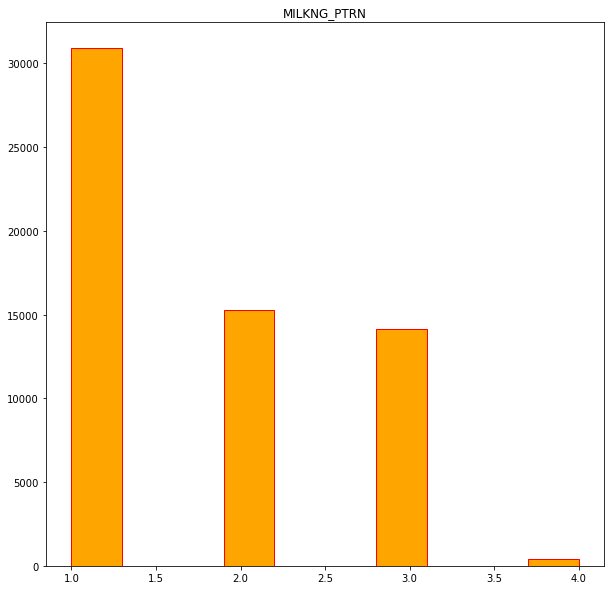

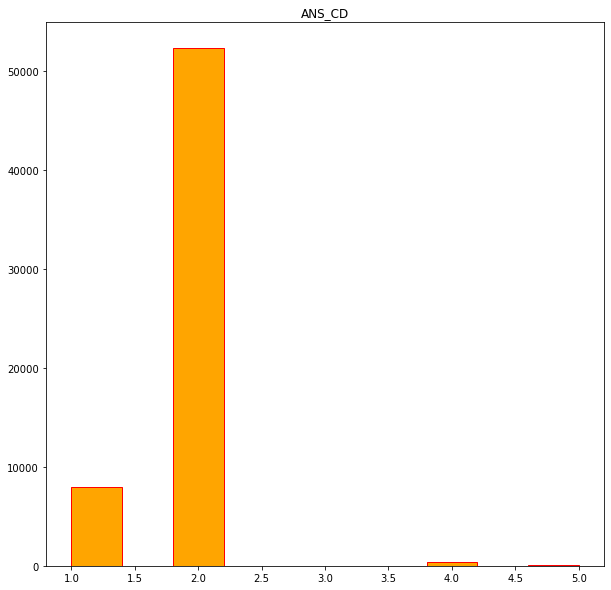

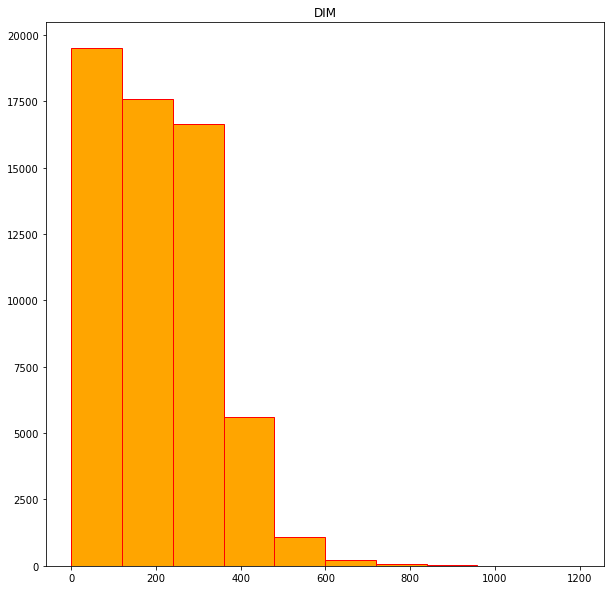

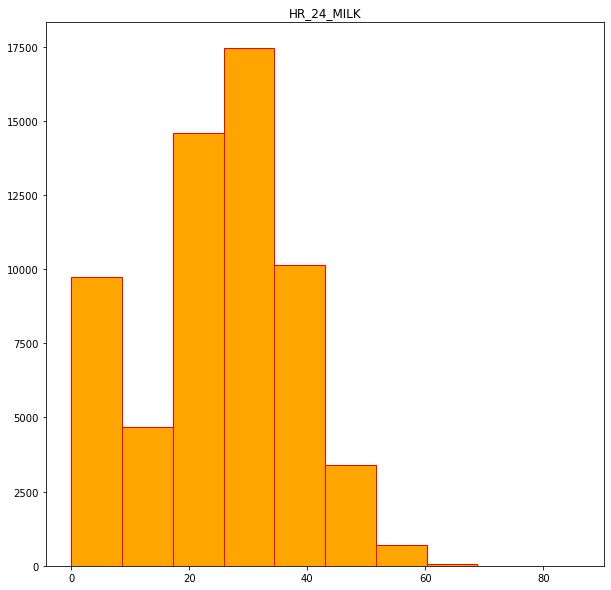

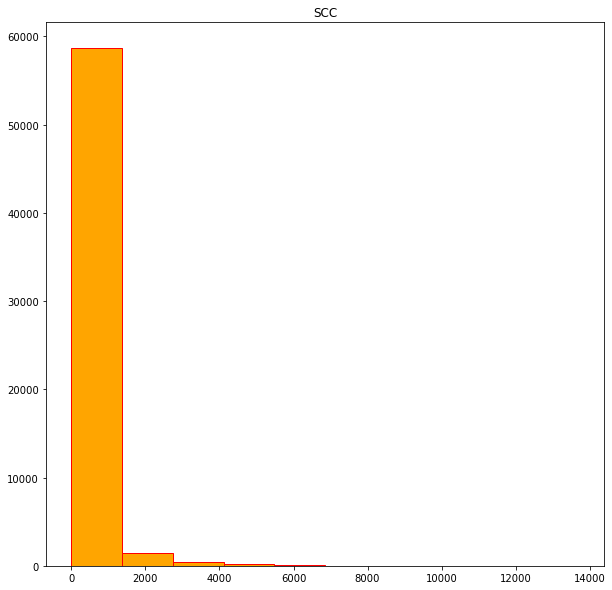

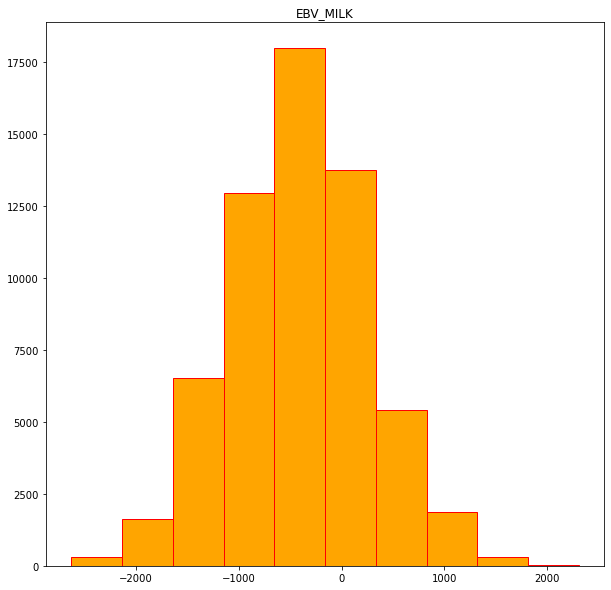

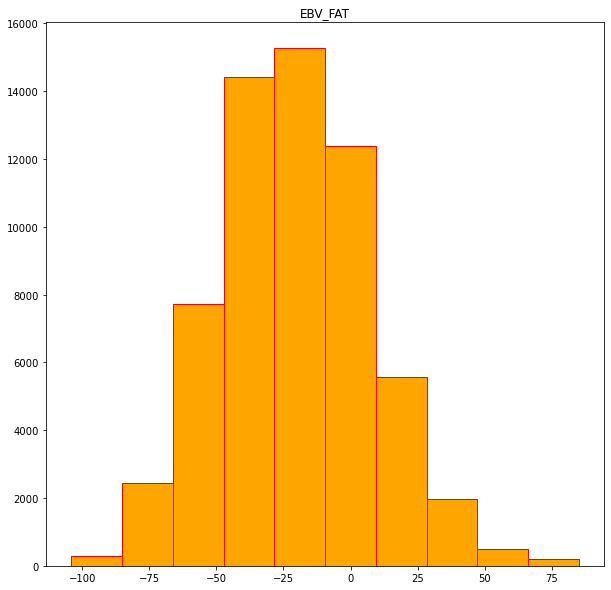

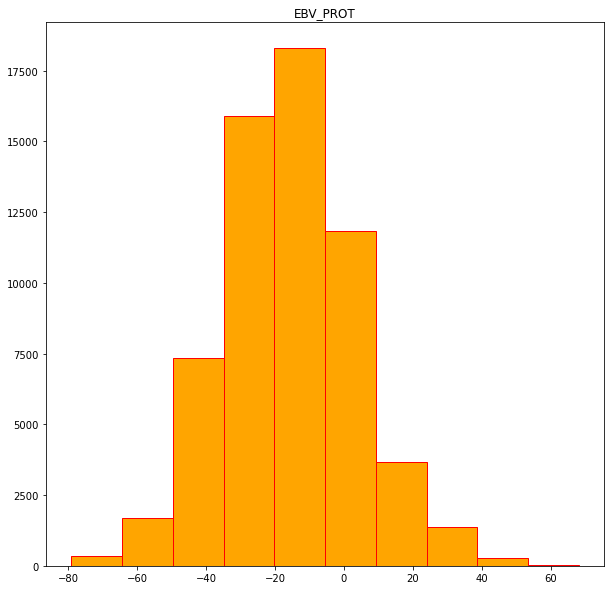

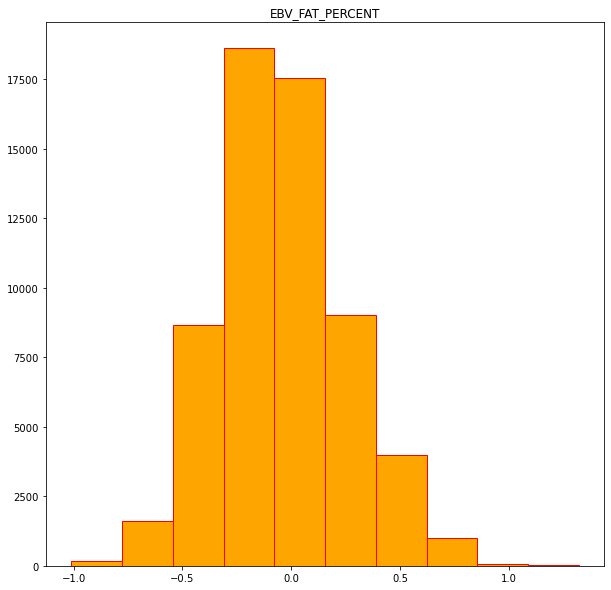

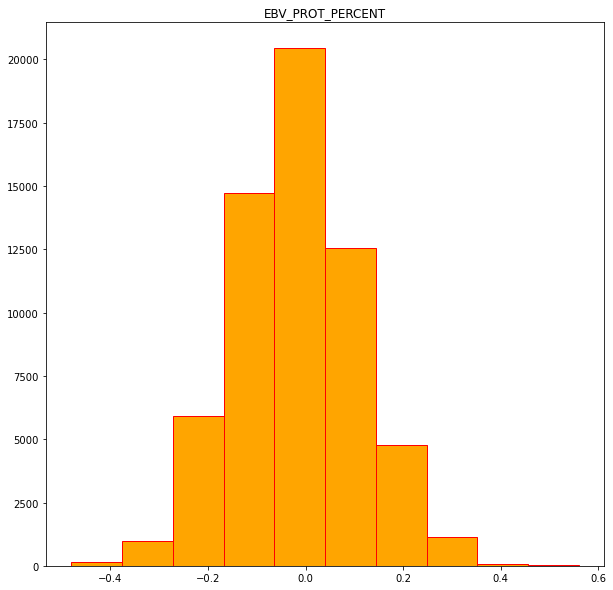

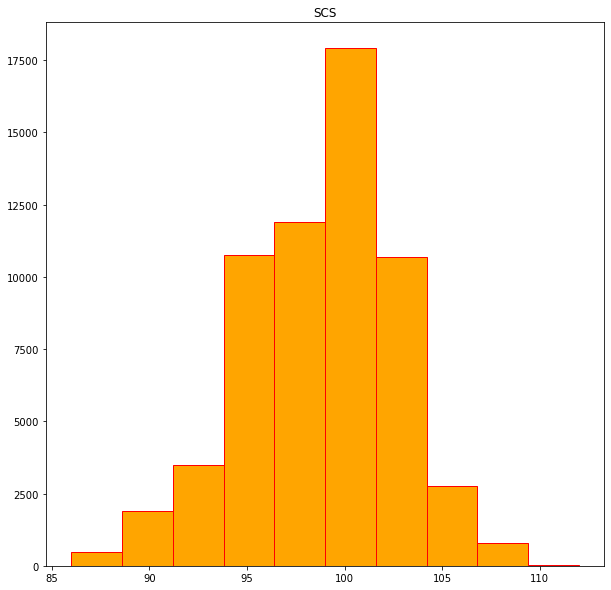

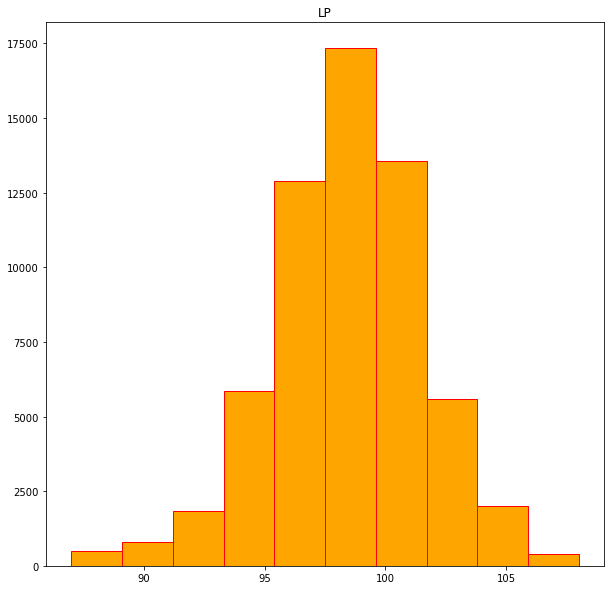

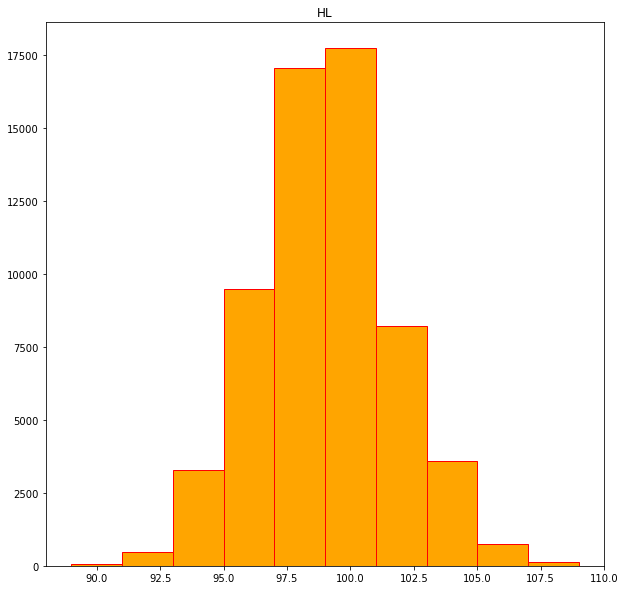

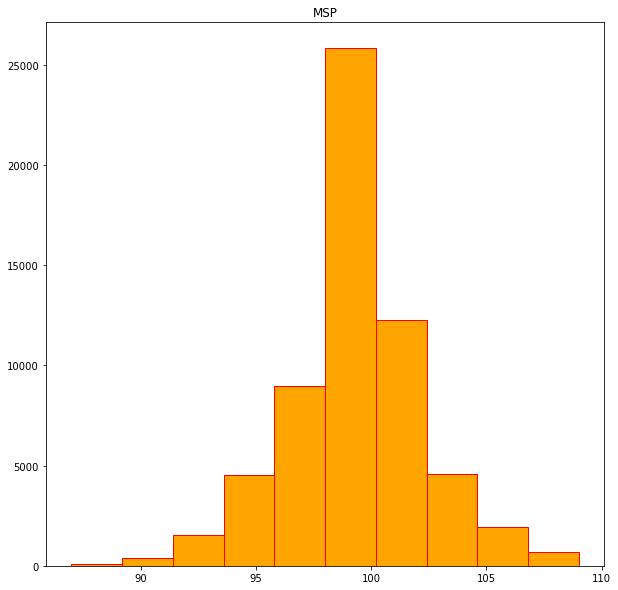

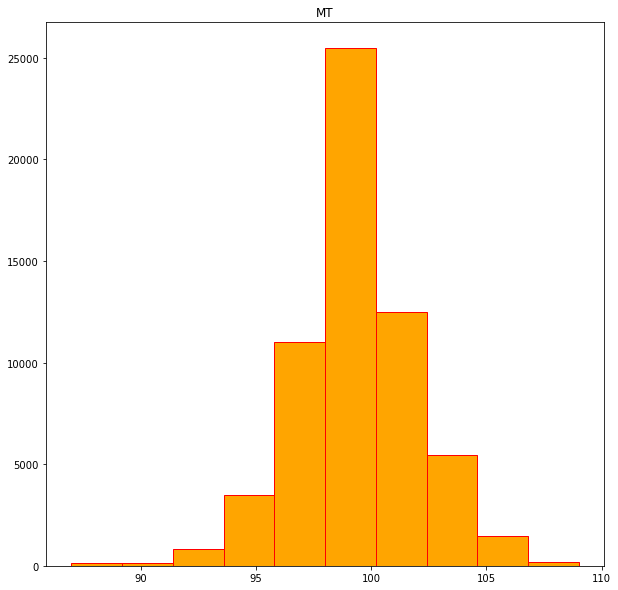

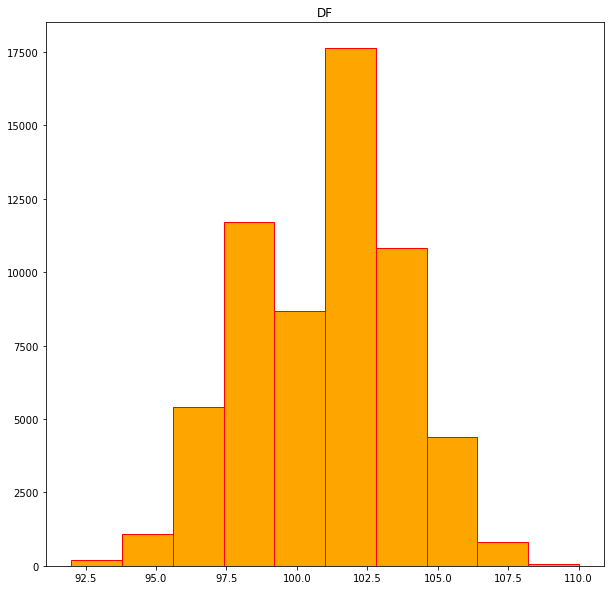

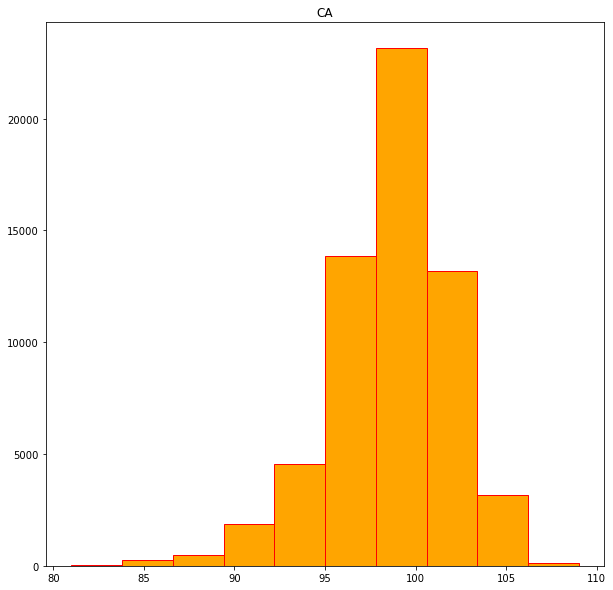

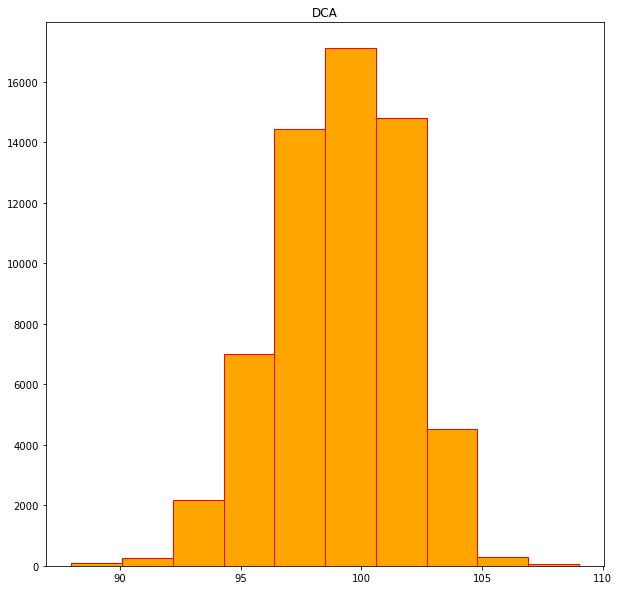

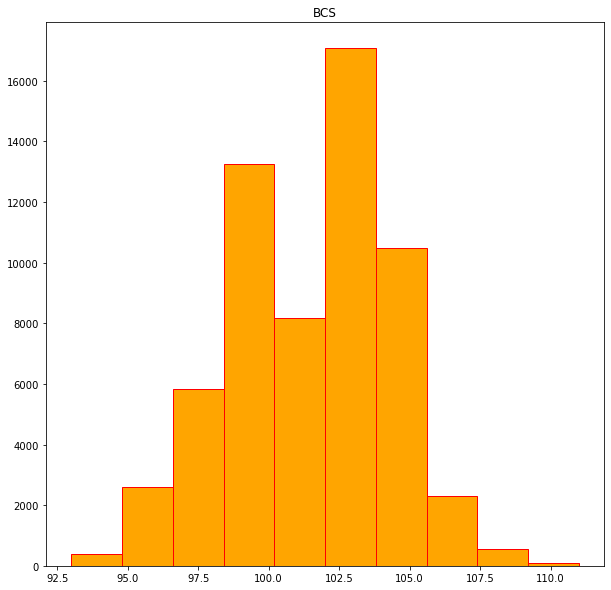

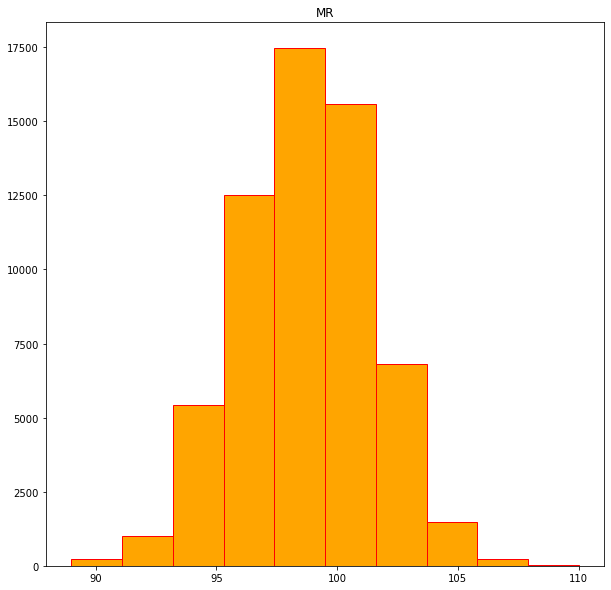

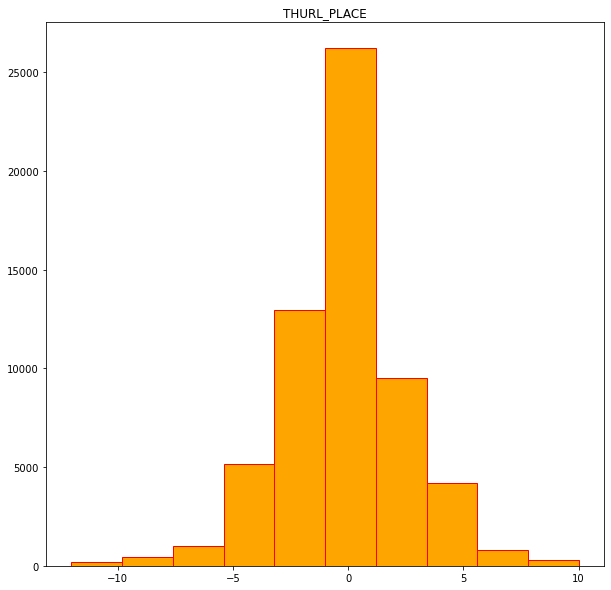

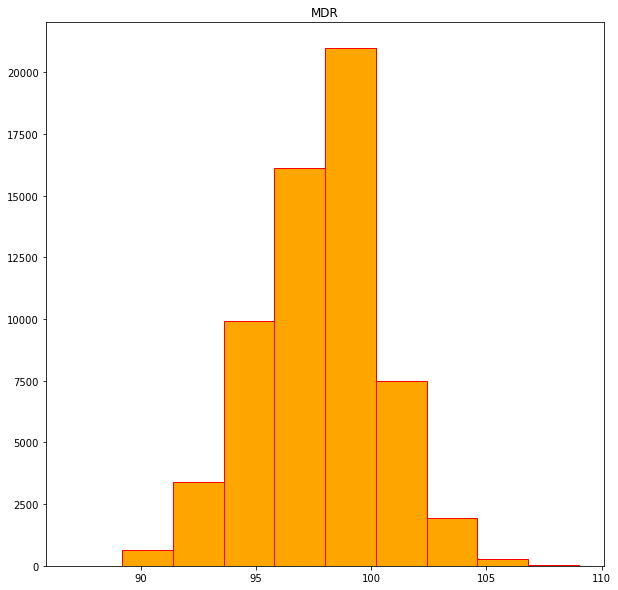

In [14]:
col = ['LACT_NO', 'MILKNG_PTRN', 'ANS_CD', 'DIM', 'HR_24_MILK', 'SCC',
      'EBV_MILK', 'EBV_FAT', 'EBV_PROT', 'EBV_FAT_PERCENT', 'EBV_PROT_PERCENT', 'SCS',
      'LP', 'HL', 'MSP', 'MT', 'DF', 'CA', 'DCA', 'BCS', 'MR', 'THURL_PLACE', 'MDR']
for i in col:
#     print(i)
    plt.figure(figsize=(10,10))
    plt.hist(features[i], color='orange', edgecolor='red') #bins= int(features.shape[0]/100000),
    plt.title('%s' %i)
    plt.show()

### Normalization  & PCA visualization

In [15]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#  - Normaliser les données en utilisant Z-score (StandardScaler dans Scikit-learn)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# # list_cols_object = cols_date
# x_normalized = x_normalized = x.drop(list_cols_object, axis=1)
# # definir standard scaler
# scaler = StandardScaler().fit_transform(x_normalized)

# # print(x_normalized)

## Visualizations

Le but de cette partie est de detecter les attributs qui changent dans le temps,  ainsi que de voir certaines visualisations afin de mieux comprendre les donnees

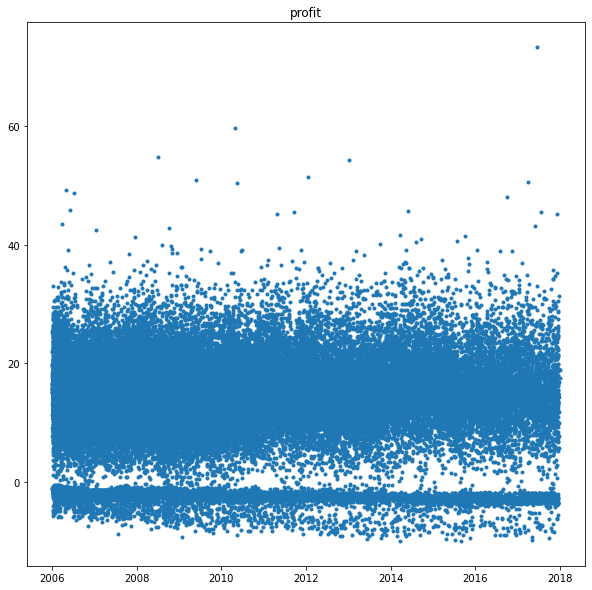

In [16]:
plt.figure(figsize=(10,10))
plt.plot(x['TEST_DATE'], y, '.')
plt.title('profit')
plt.show()

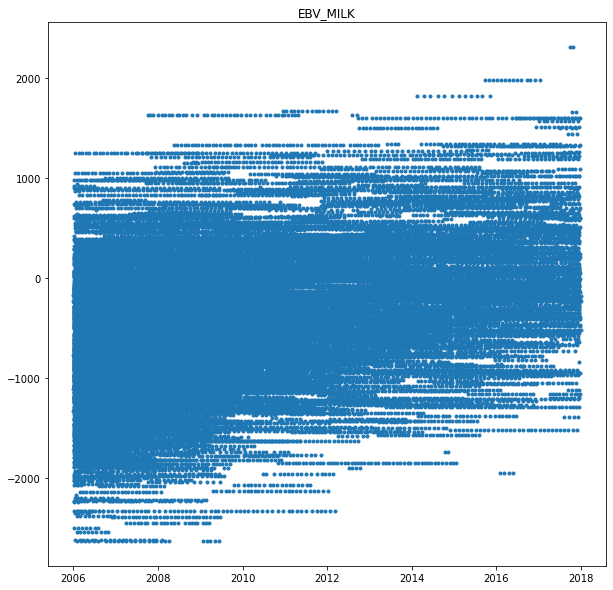

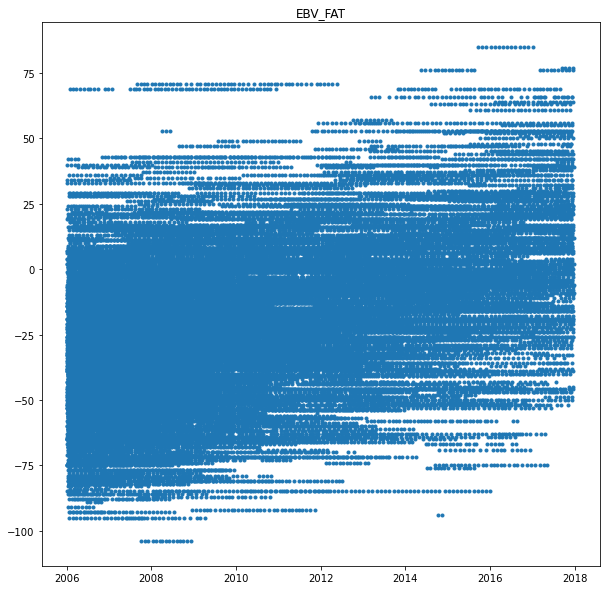

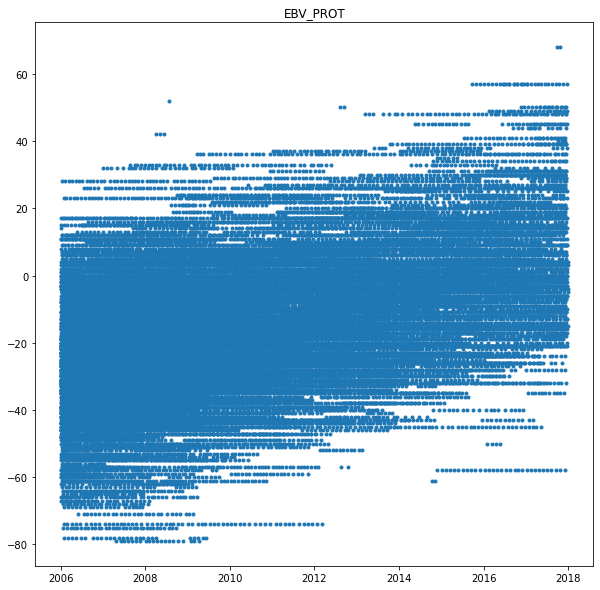

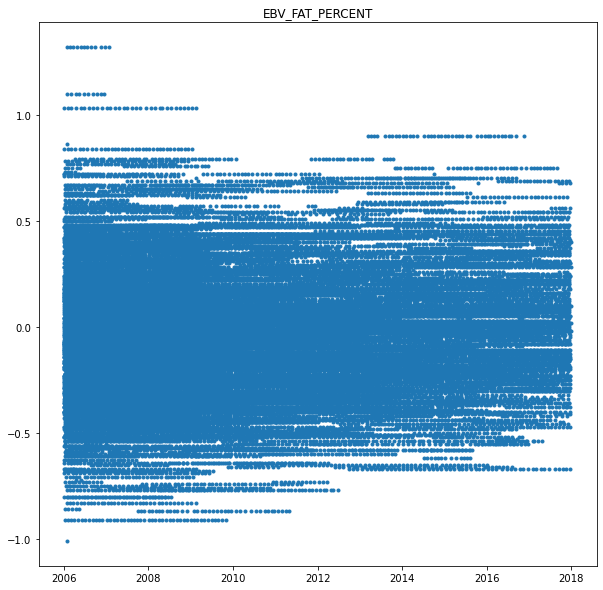

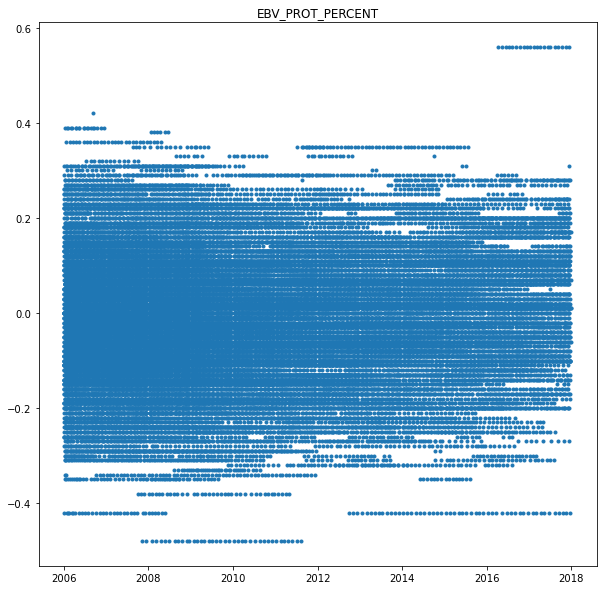

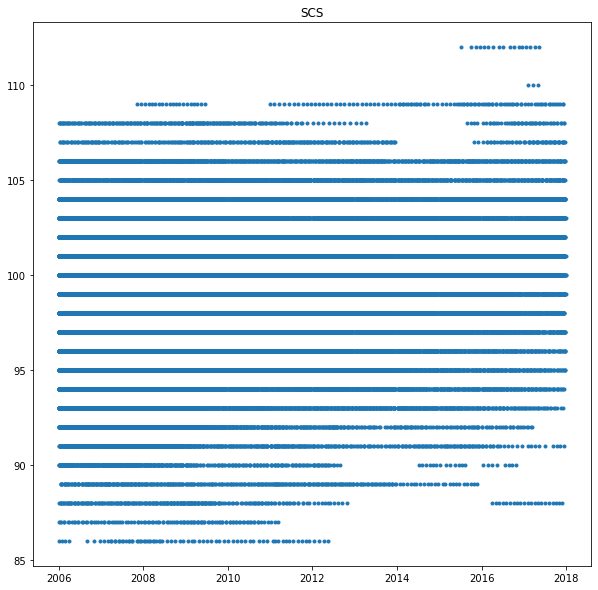

In [17]:
# EBV
for c in ['EBV_MILK', 'EBV_FAT', 'EBV_PROT', 'EBV_FAT_PERCENT','EBV_PROT_PERCENT', 'SCS']:
    plt.figure(figsize=(10,10))
    plt.plot(x['TEST_DATE'], x[c], '.')
    plt.title('%s' %c)
    plt.show()

In [18]:
# features.columns

In [19]:
pd.unique(x.TEST_DATE)

array(['2009-10-26T00:00:00.000000000', '2009-11-18T00:00:00.000000000',
       '2009-12-17T00:00:00.000000000', ...,
       '2006-10-14T00:00:00.000000000', '2010-06-26T00:00:00.000000000',
       '2007-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

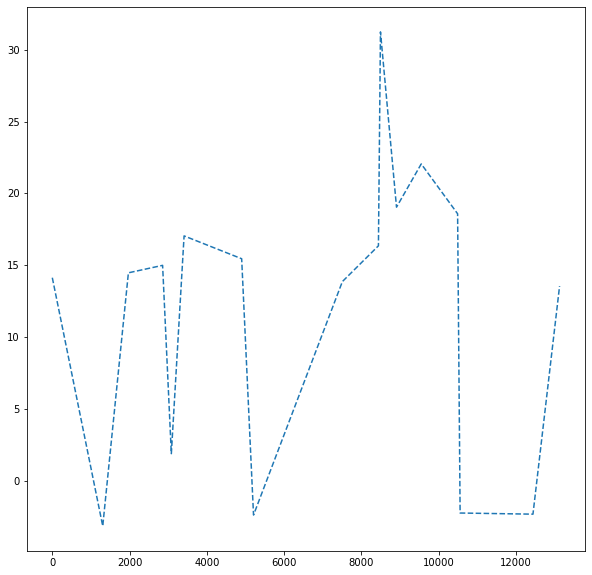

In [20]:
ind = np.where(x.TEST_DATE=='2009-10-26T00:00:00.000000000')[0]
plt.figure(figsize=(10,10))
plt.plot(x[x.TEST_DATE=='2009-10-26T00:00:00.000000000']['ANM_ID'], y[ind], '--')

In [21]:
print(pd.unique(x.ANM_ID))
print('length ', len(pd.unique(x.ANM_ID)) )

[    1     4    13 ... 13949 13951 13953]
length  2978


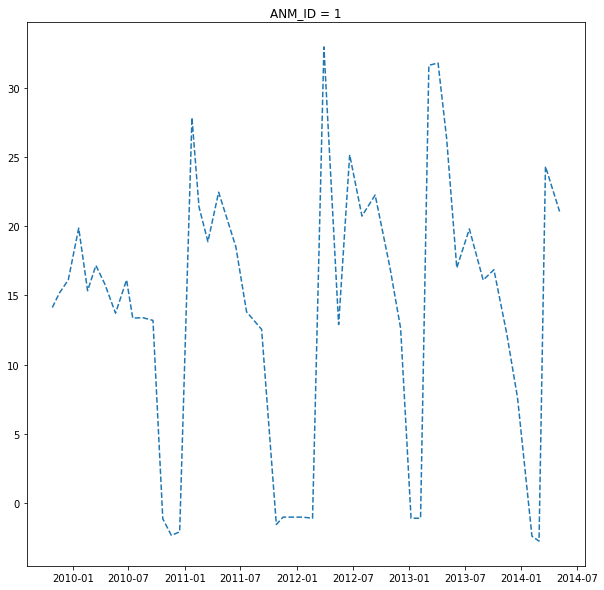

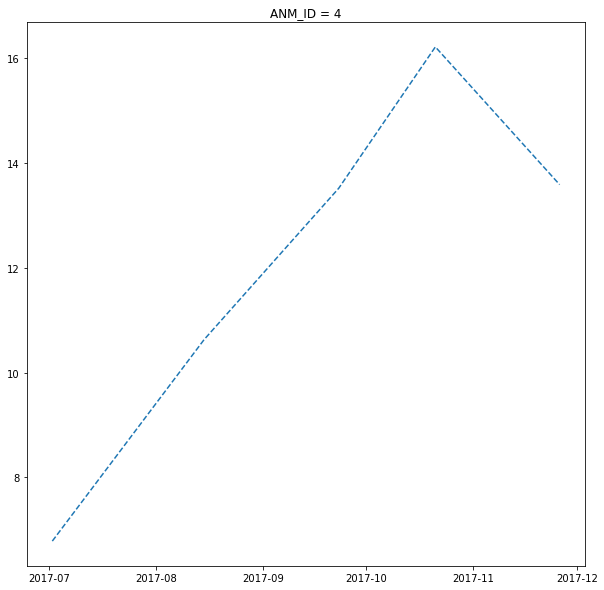

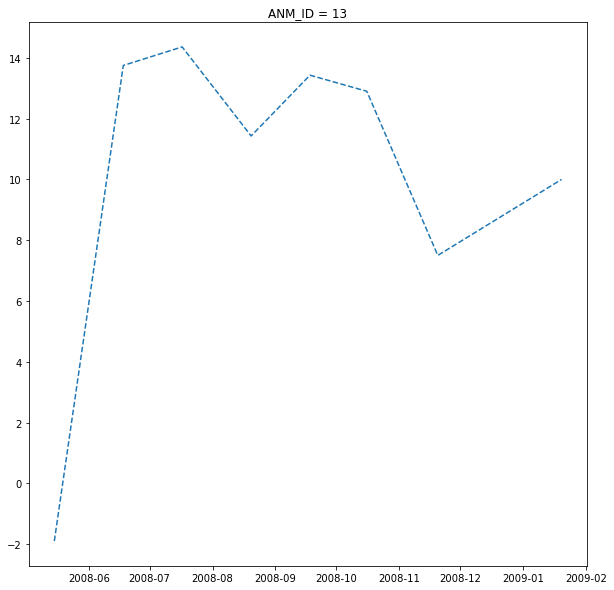

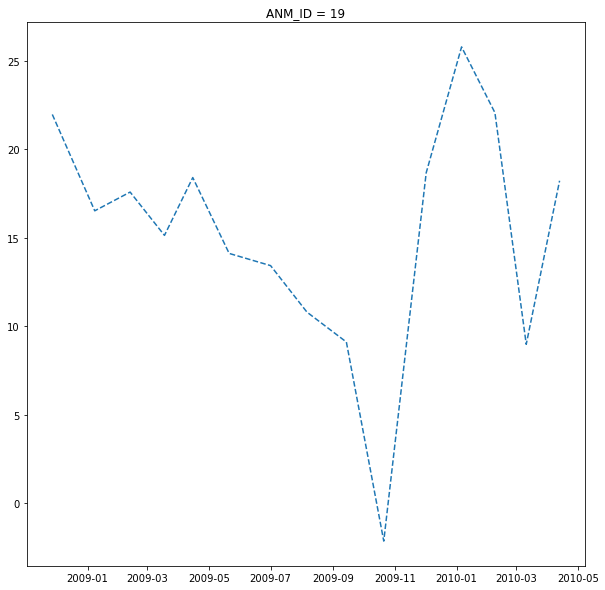

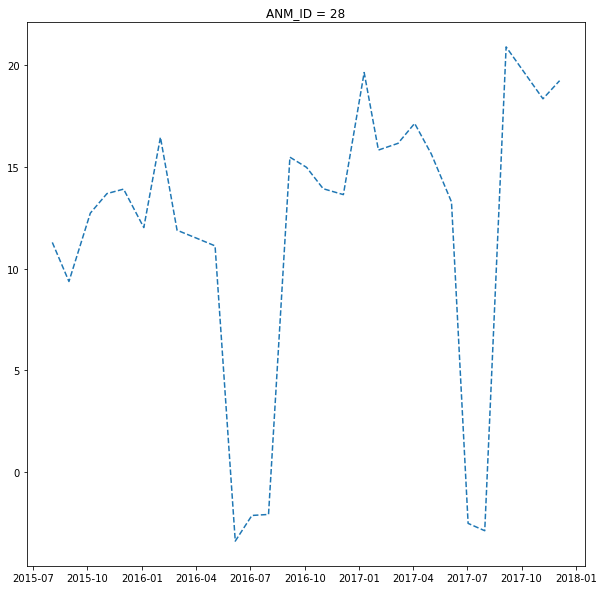

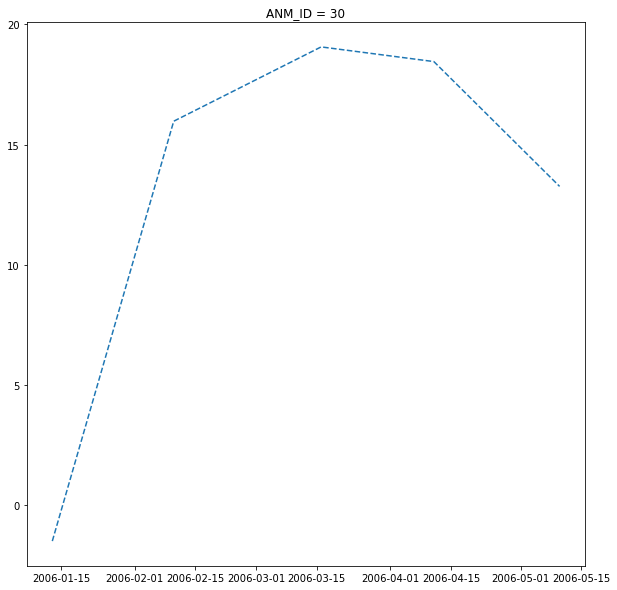

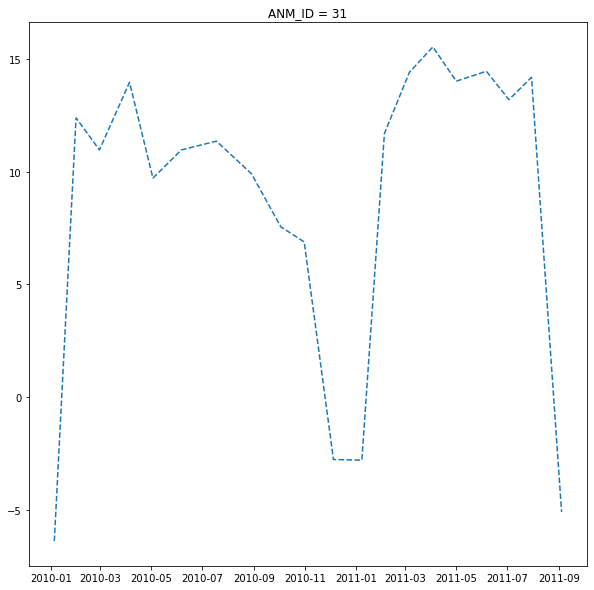

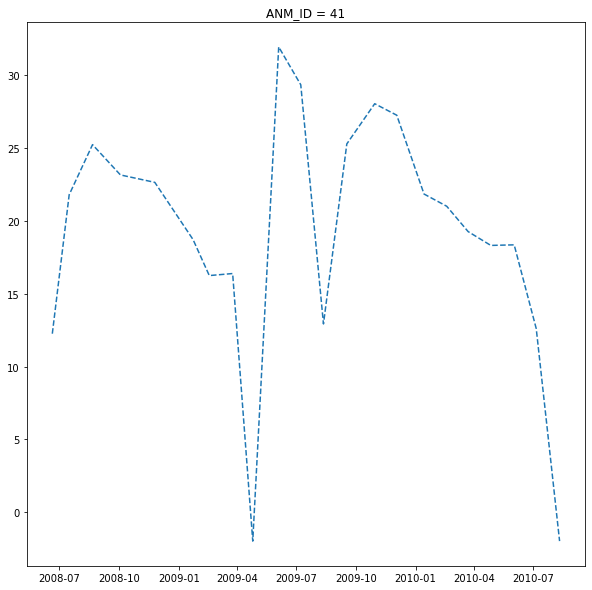

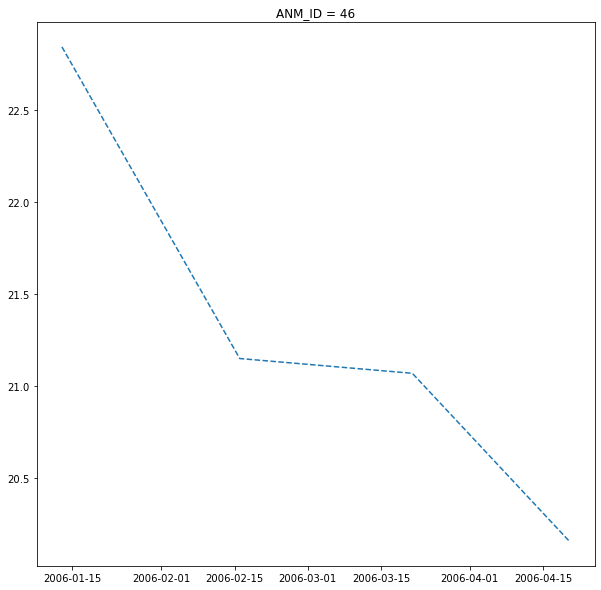

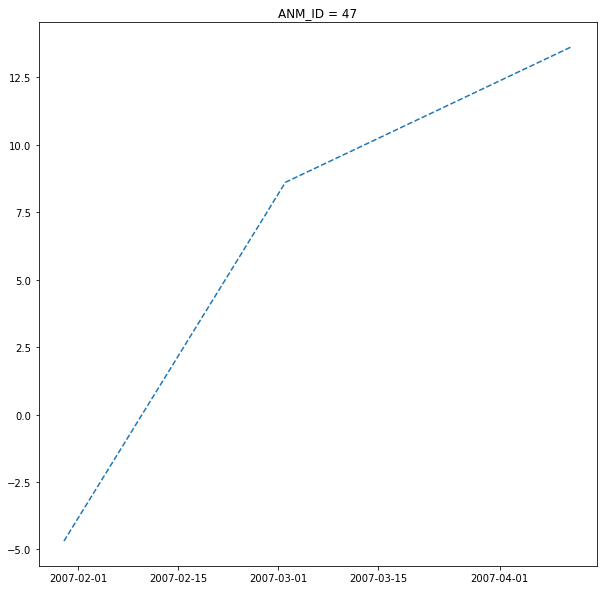

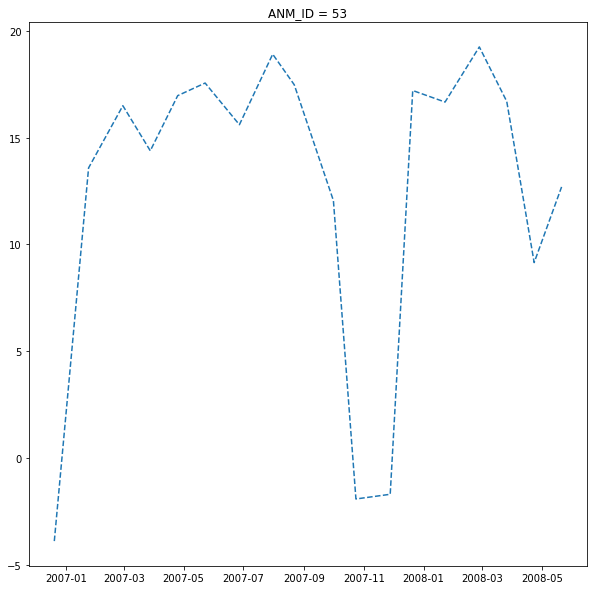

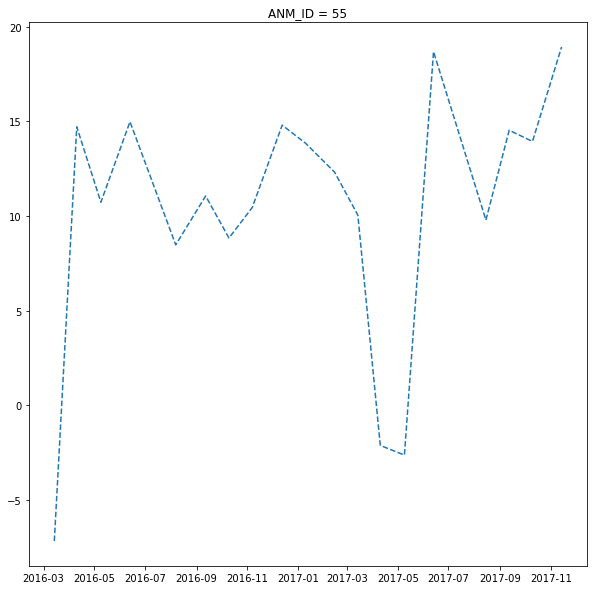

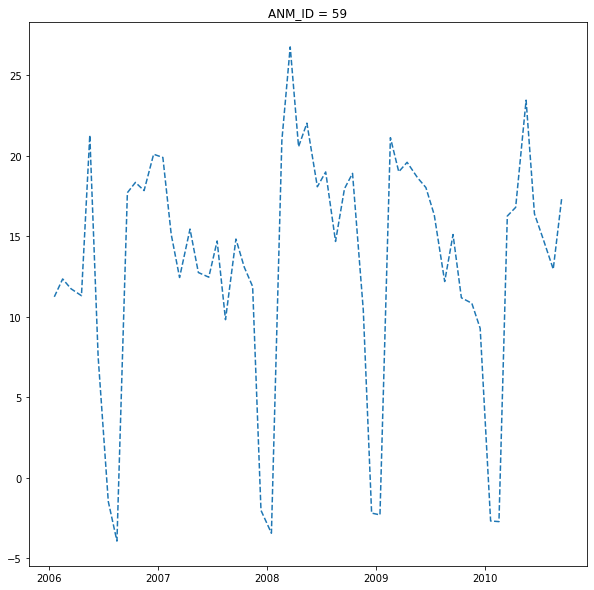

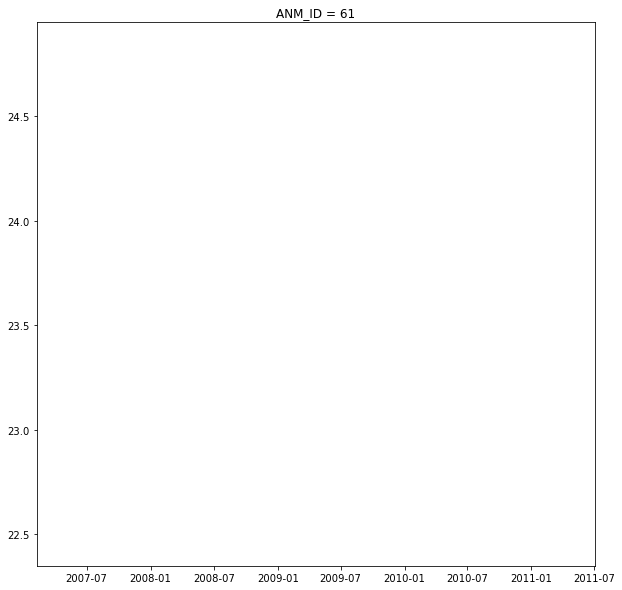

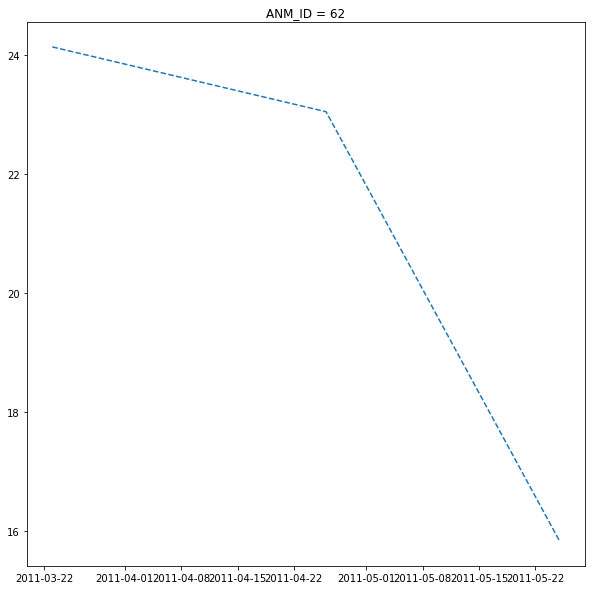

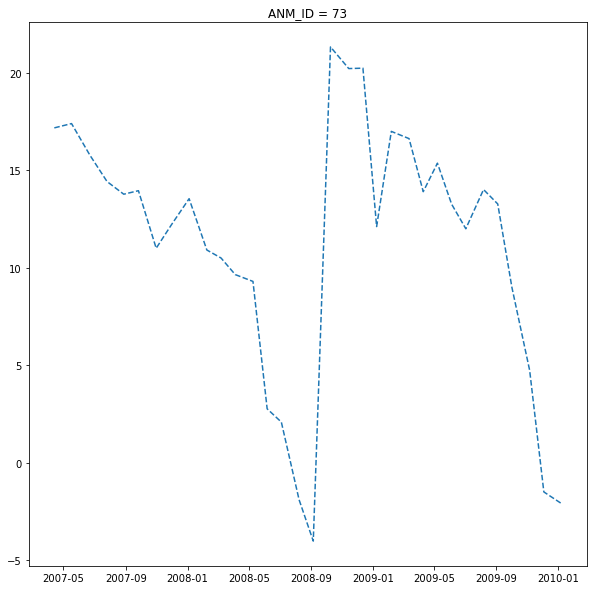

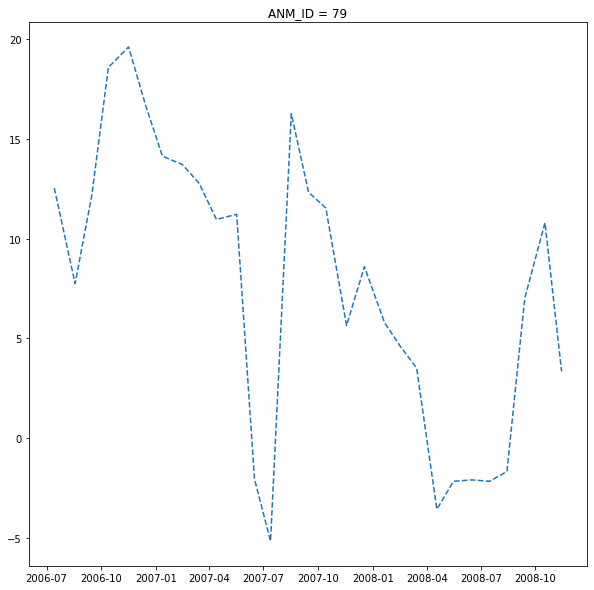

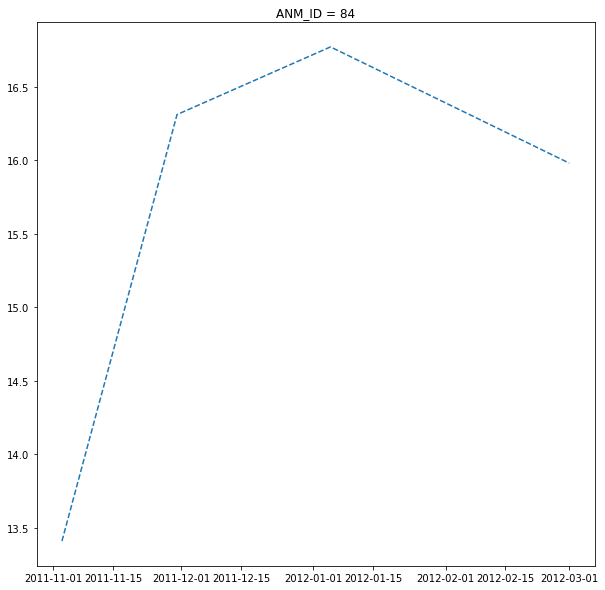

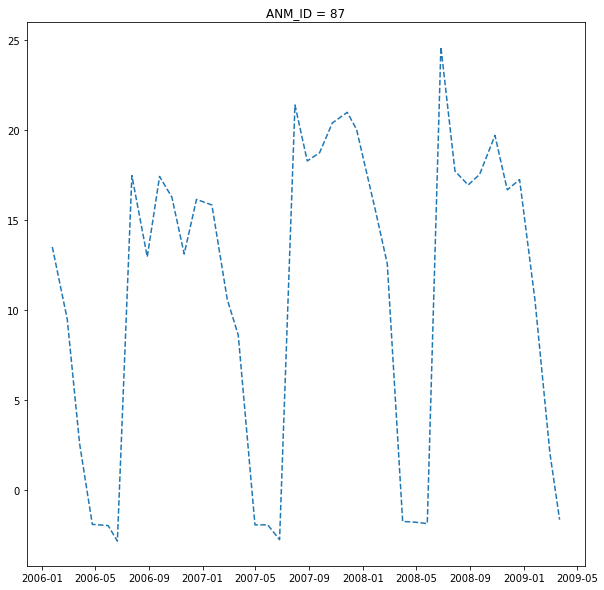

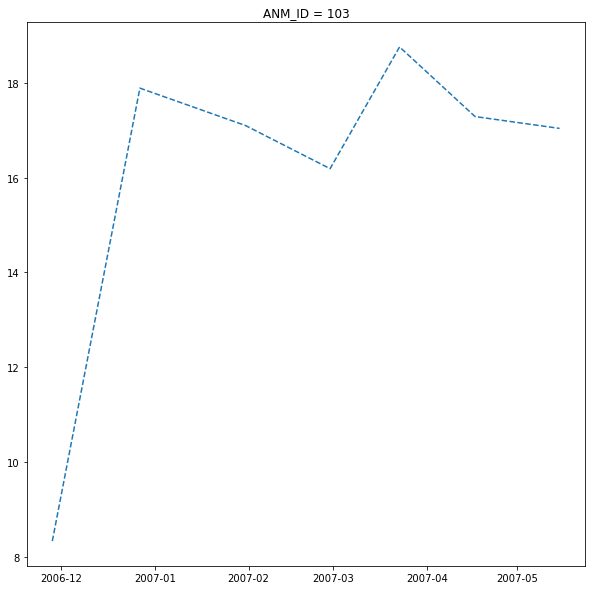

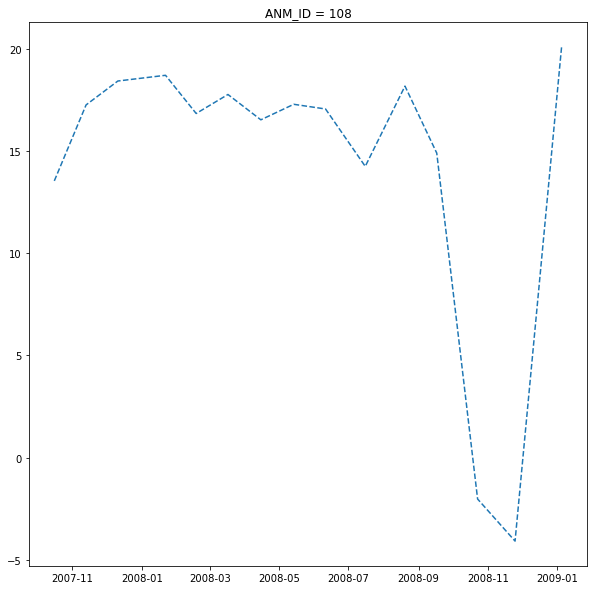

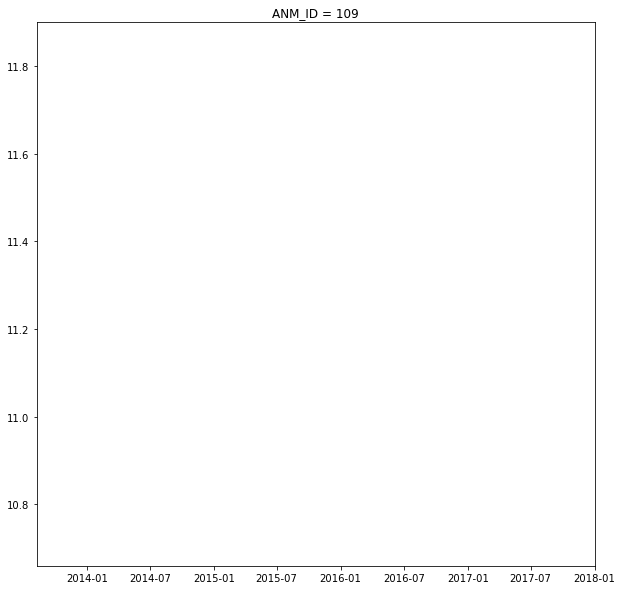

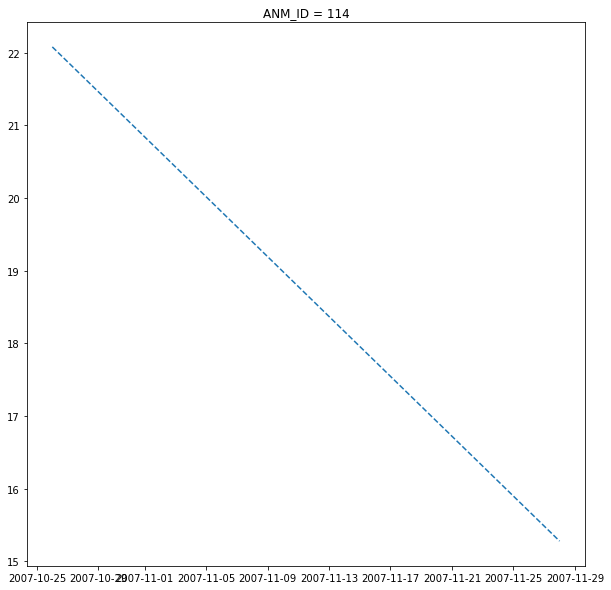

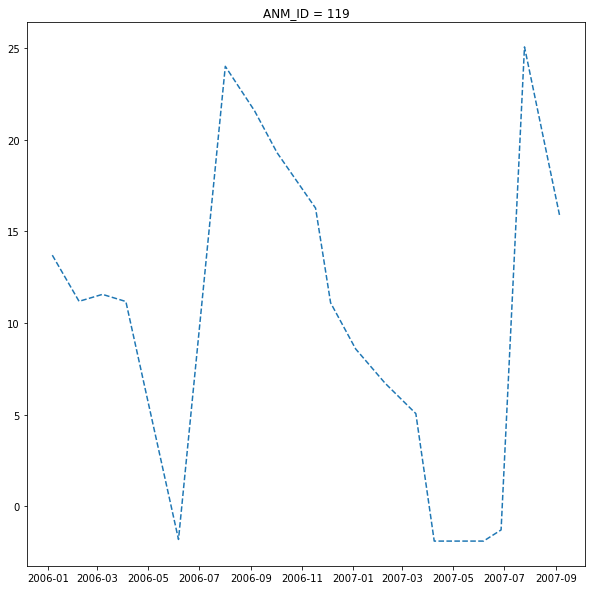

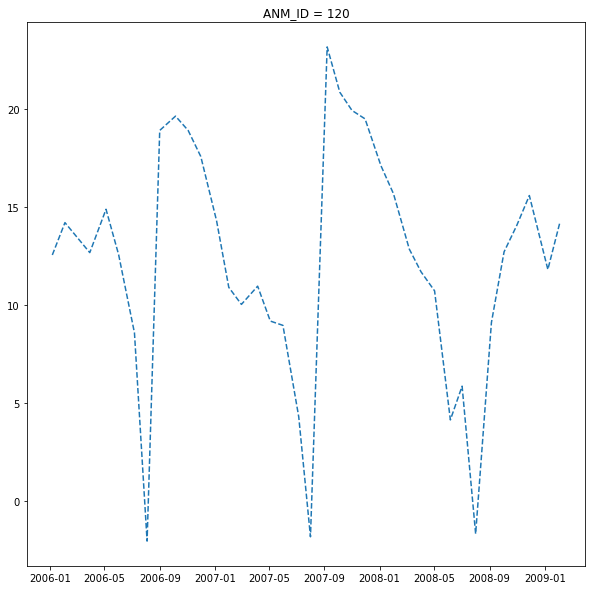

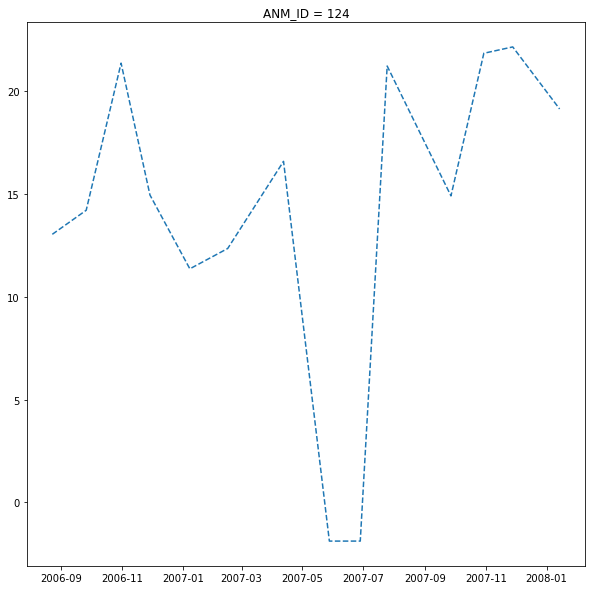

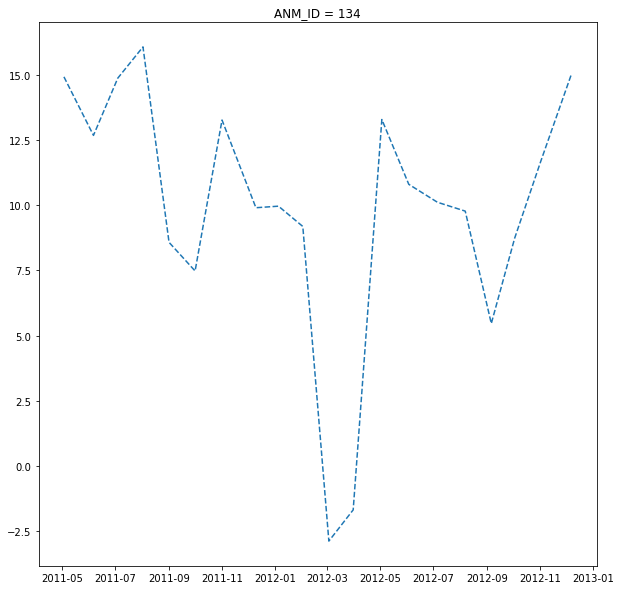

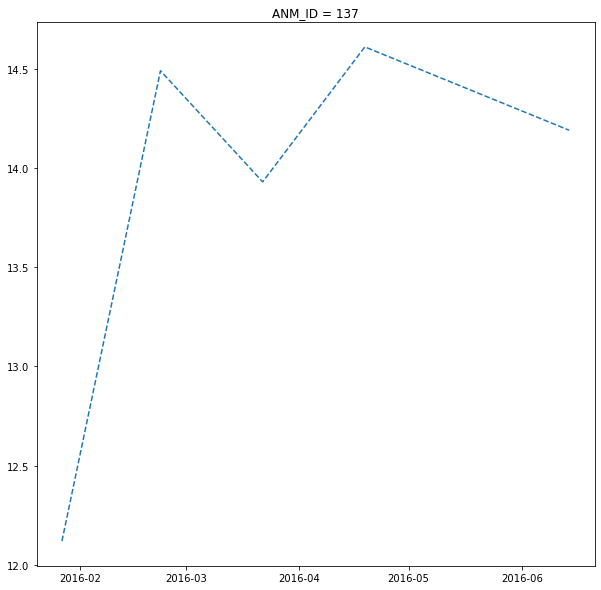

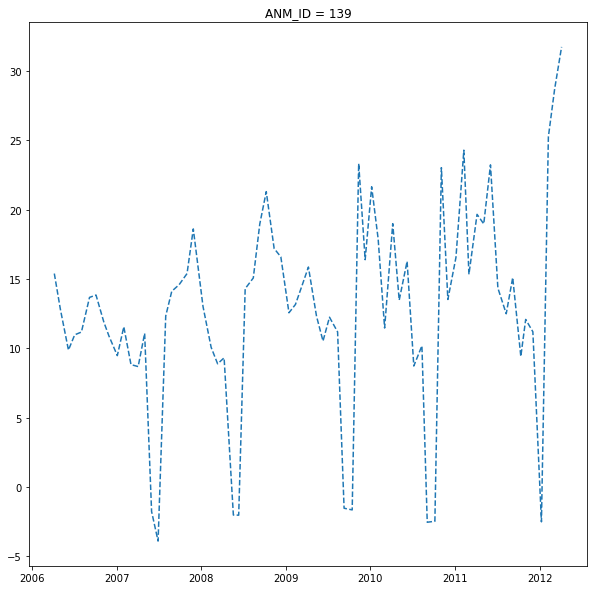

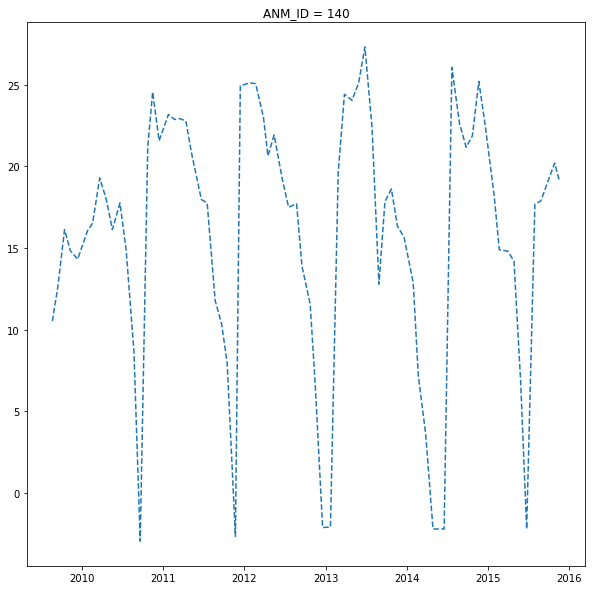

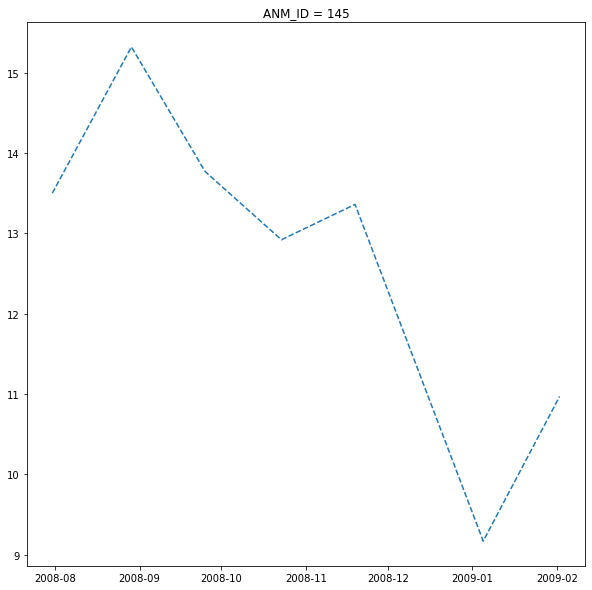

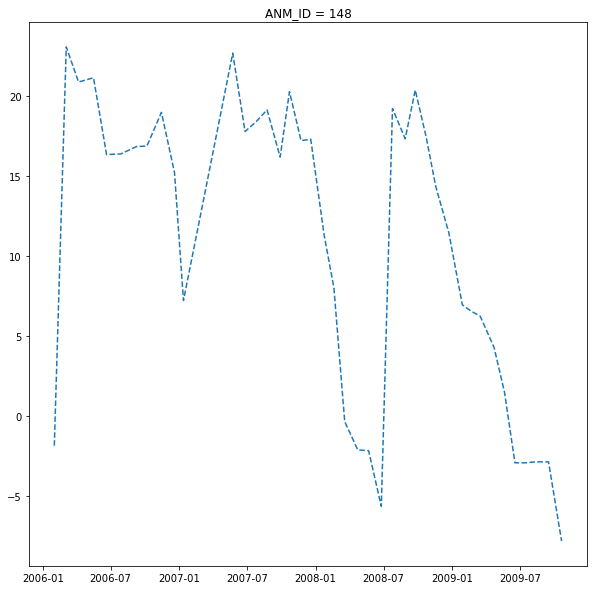

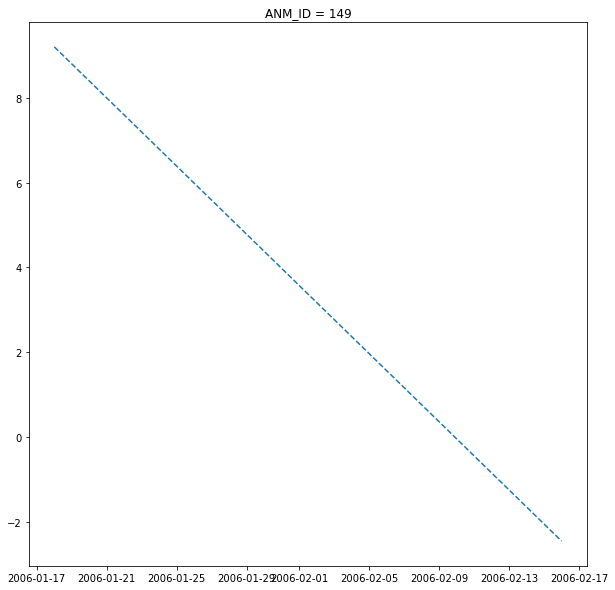

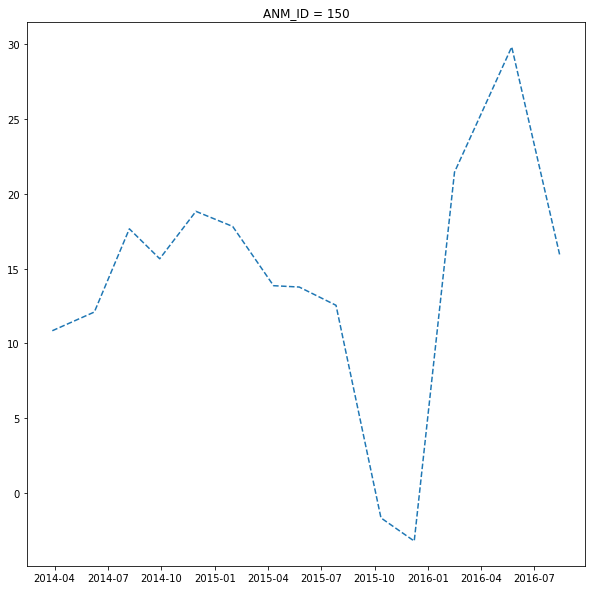

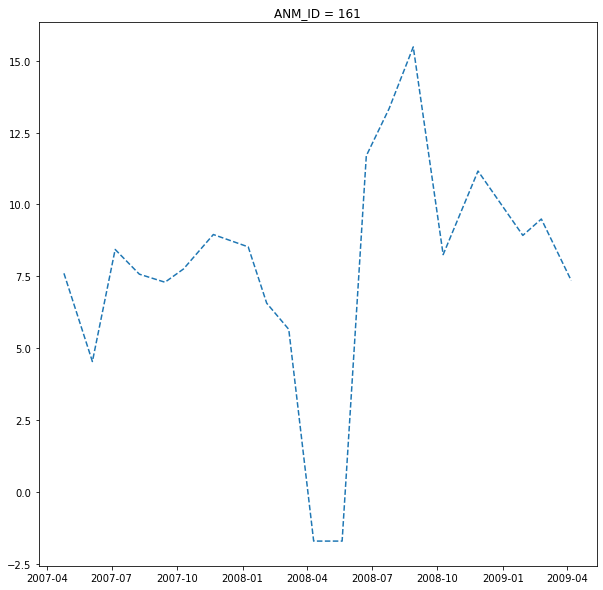

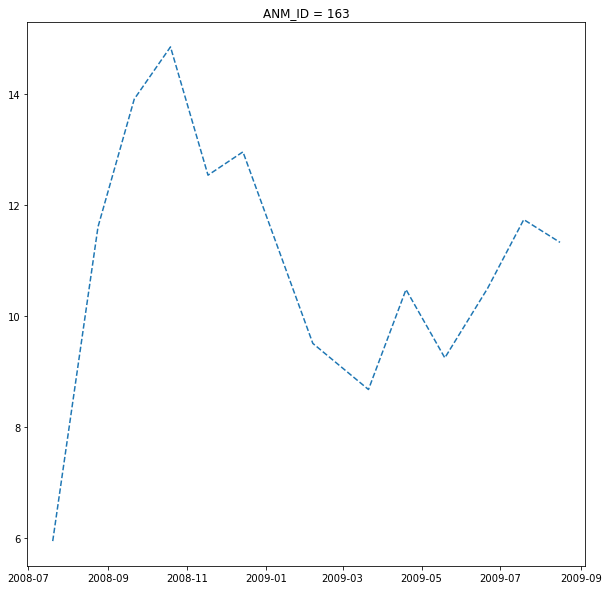

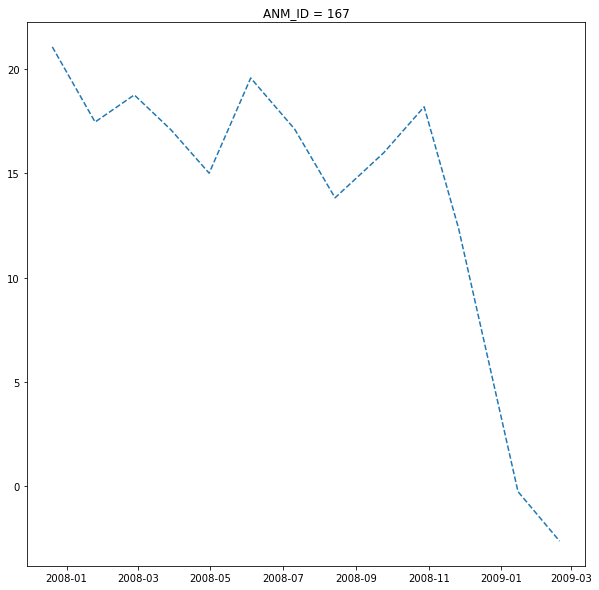

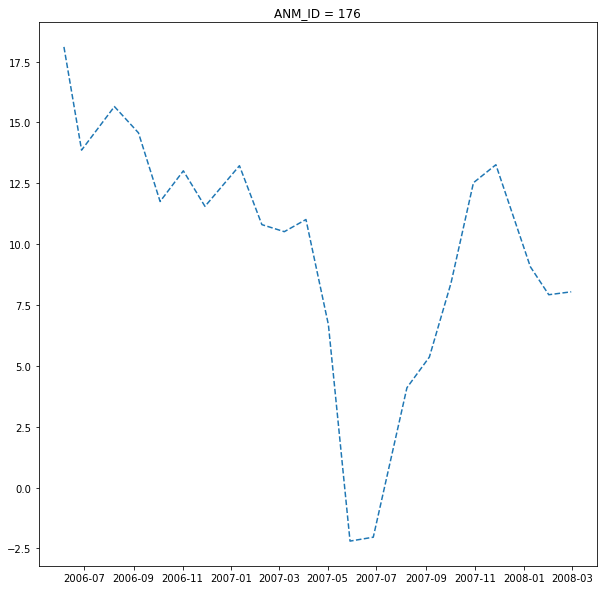

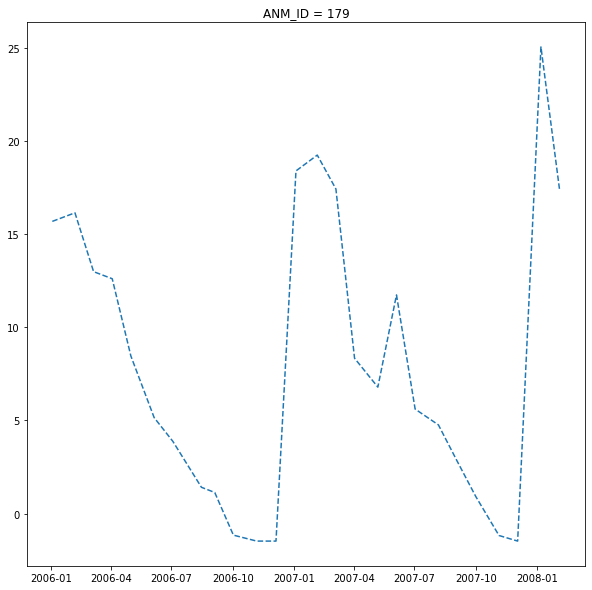

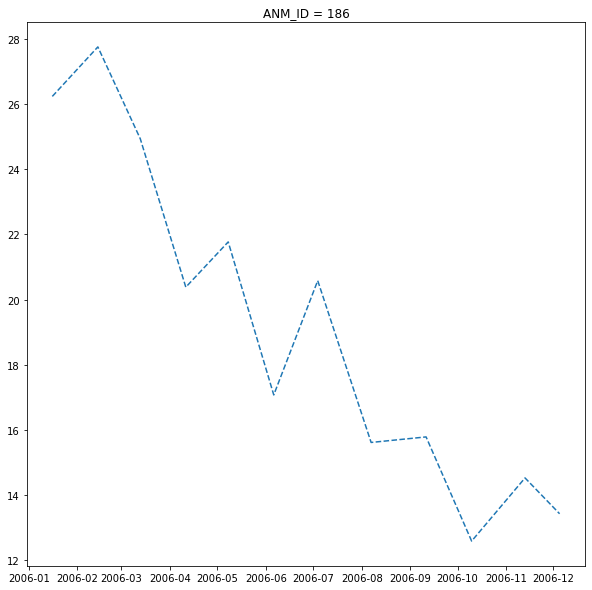

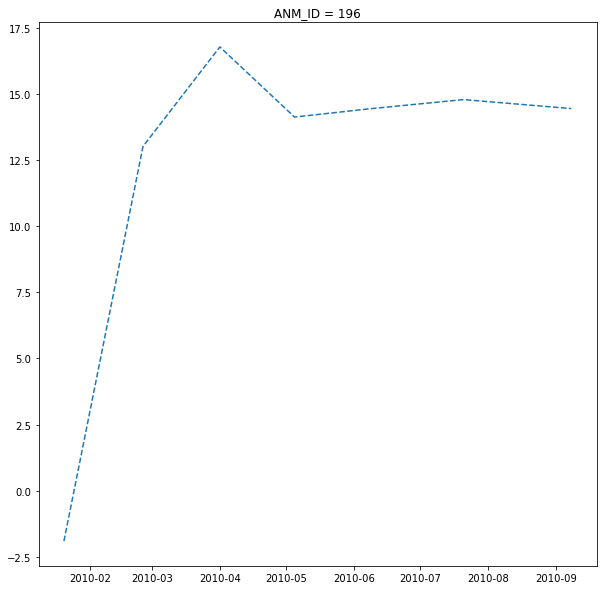

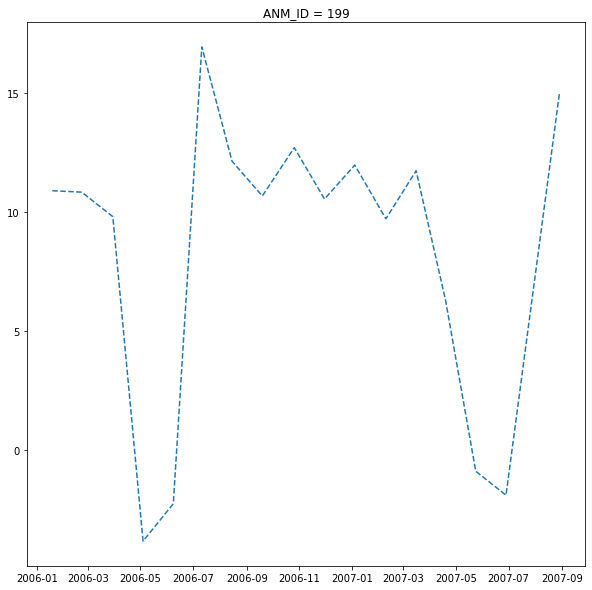

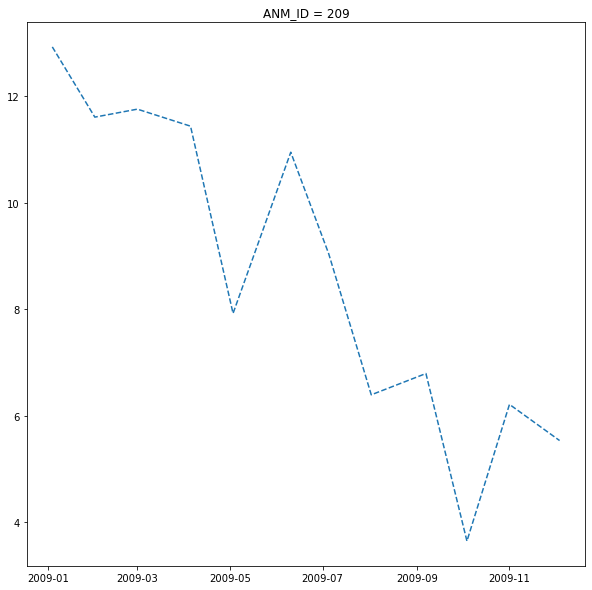

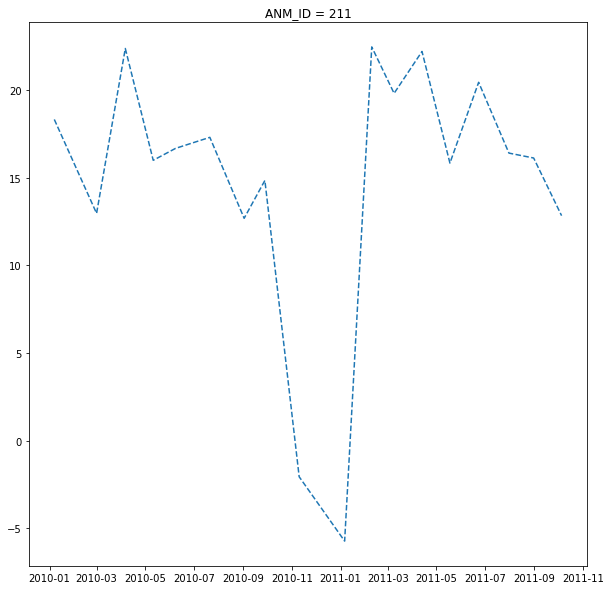

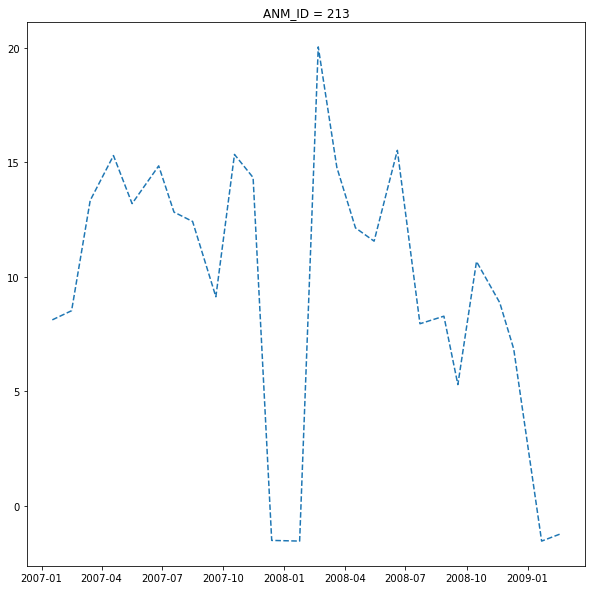

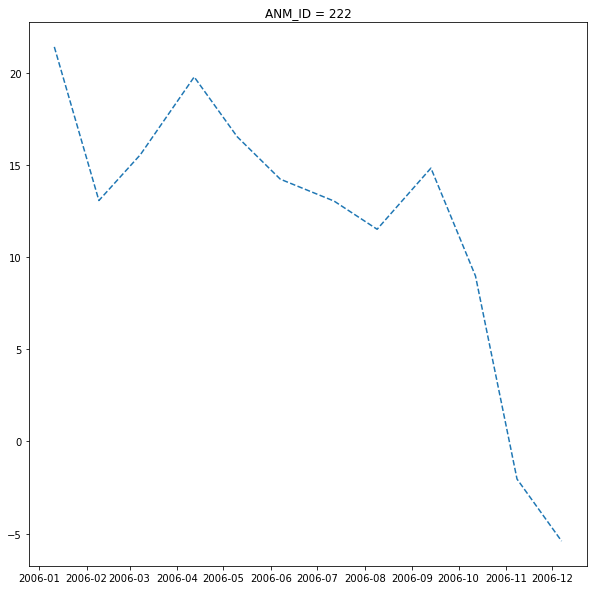

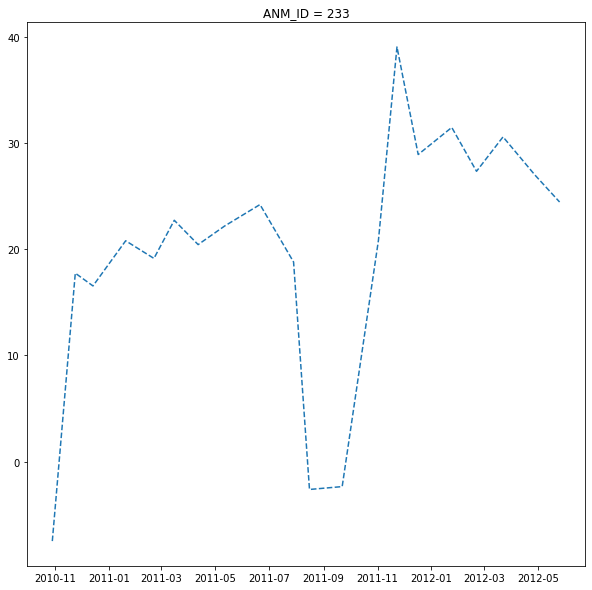

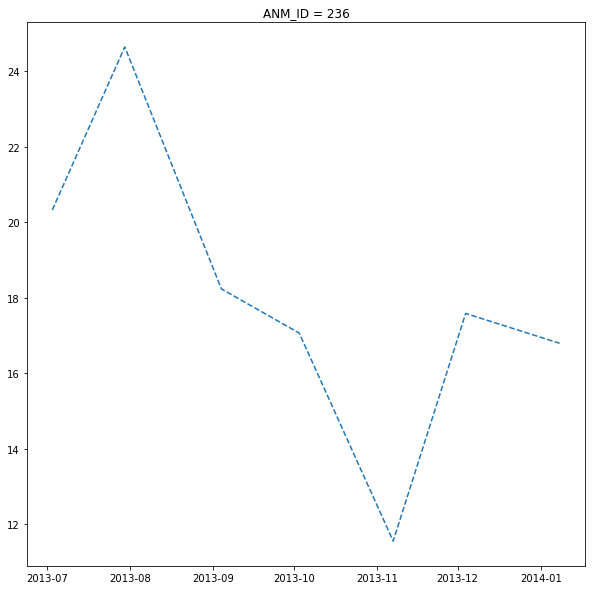

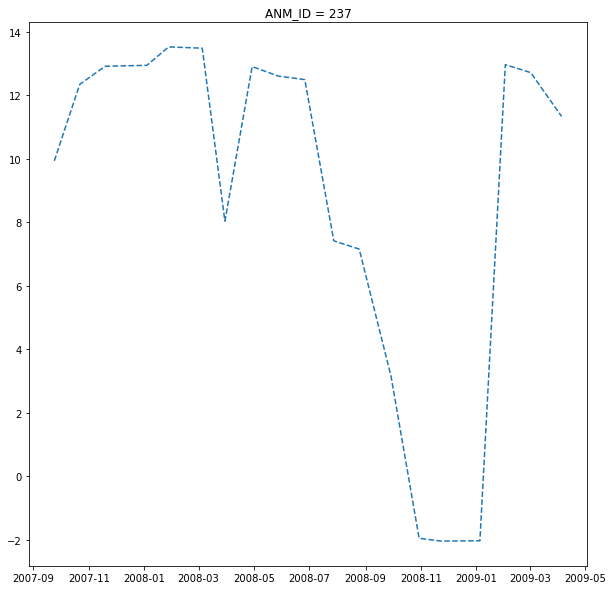

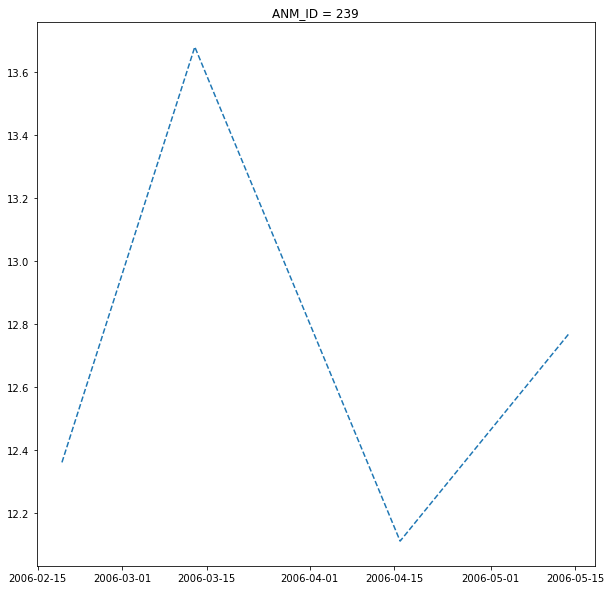

In [22]:
for i in pd.unique(x.ANM_ID)[:50]:
    ind0 = np.where(x.ANM_ID==i)[0]
    plt.figure(figsize=(10,10))
    plt.plot(x.TEST_DATE[ind0], y[ind0], '--')
    plt.title('ANM_ID = %i' %i)

In [23]:
# why ?????
print(x[x.ANM_ID==61]['TEST_DATE'])
x[x.ANM_ID==61]

253   2009-04-20
Name: TEST_DATE, dtype: datetime64[ns]


HRD_ID  HRD_PRV_CD  ANM_ID ENTER_HERD_DATE  COMPTR_NO  REGION BIRTH_DATE  \
253    2443           4      61      2008-04-18      479.0       5 2004-03-01   

    LEFT_HERD_DATE  LHR_CD  LHR_CD_2  ...   MSP     MT     DF     CA   DCA  \
253     2013-02-04    13.0       8.0  ...  97.0  100.0  100.0  100.0  97.0   

       BCS     MR  THURL_PLACE   MDR  cumul_profit  
253  105.0  103.0          0.0  96.0         592.0  

[1 rows x 81 columns]

In [24]:
features[features.ANM_ID==61][['TEST_DATE', 'profit']]

TEST_DATE  profit
253  2009-04-20   23.65

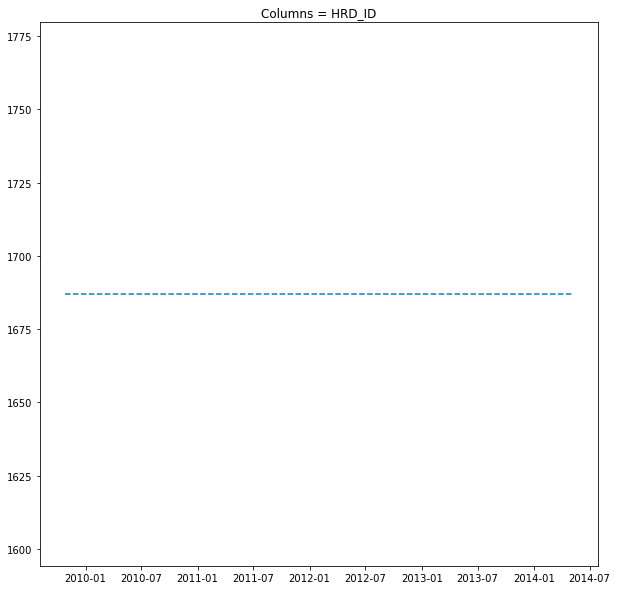

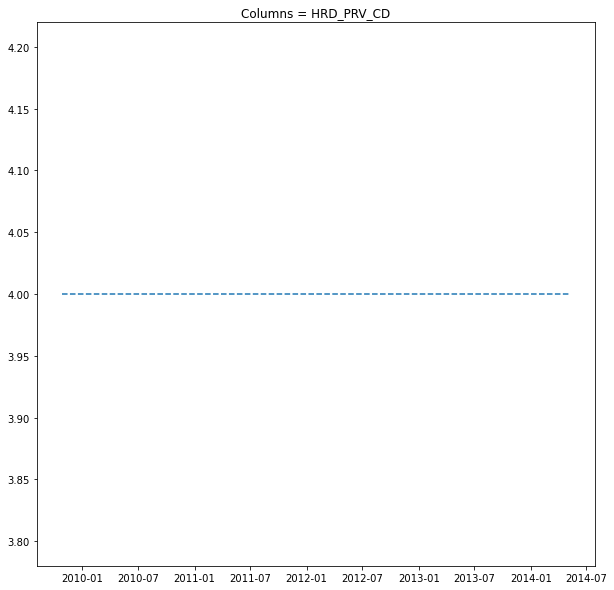

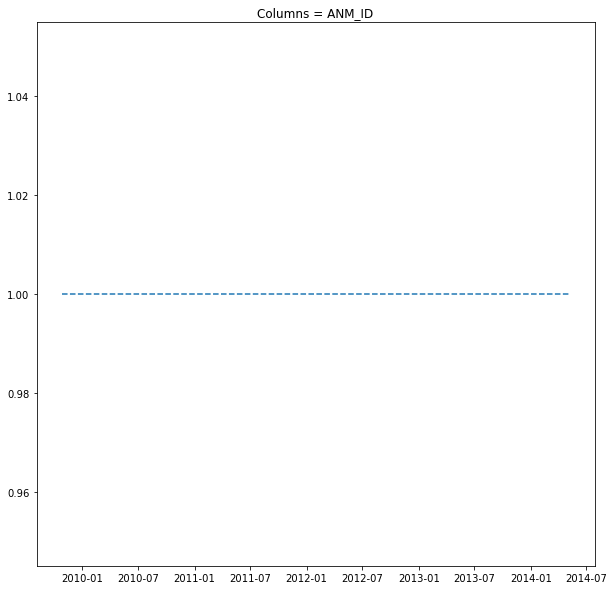

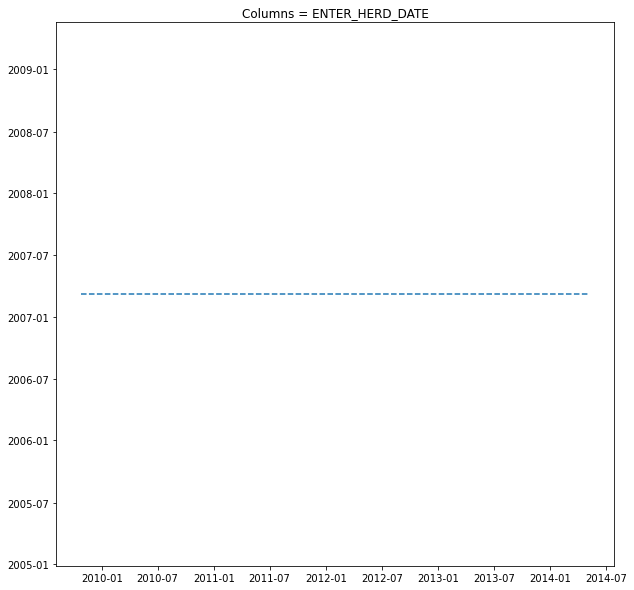

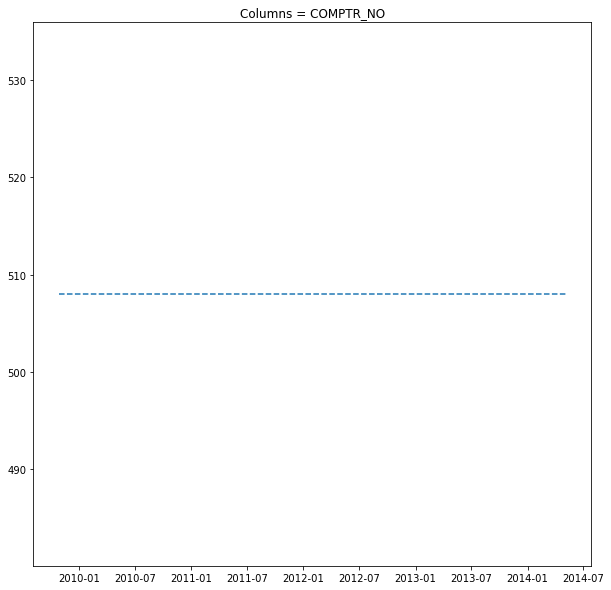

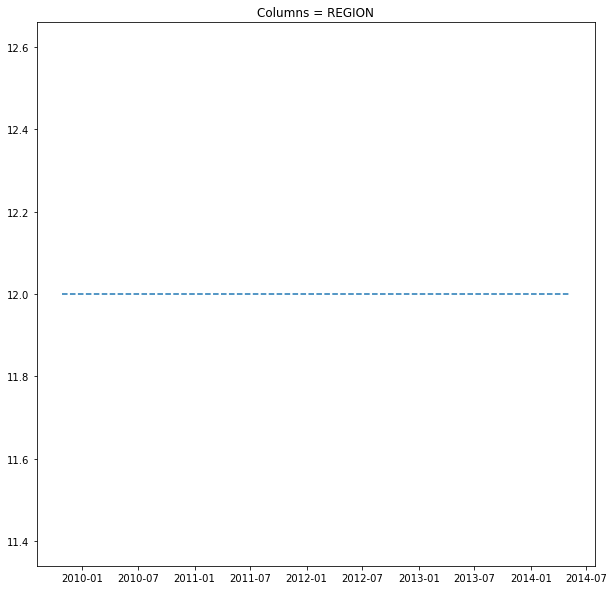

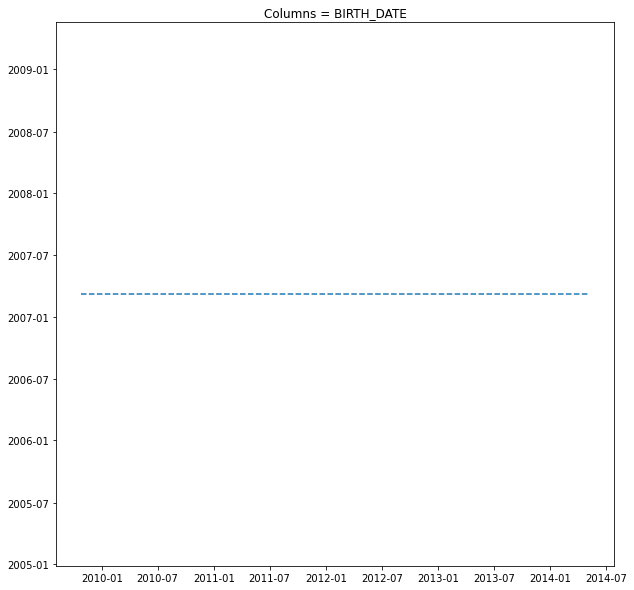

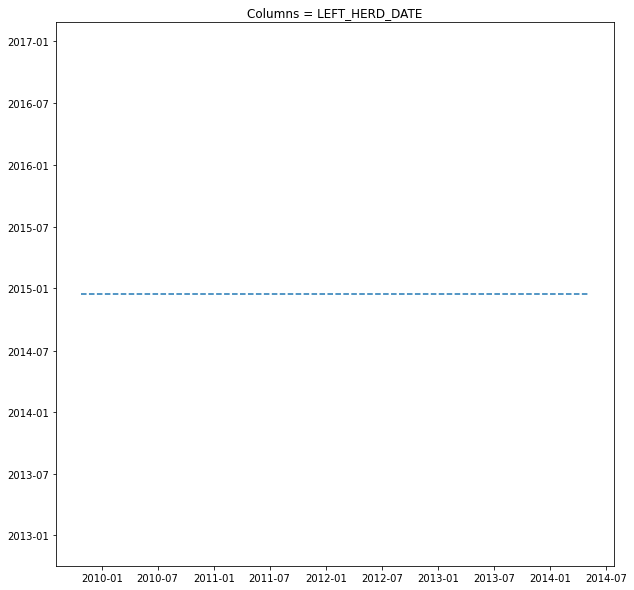

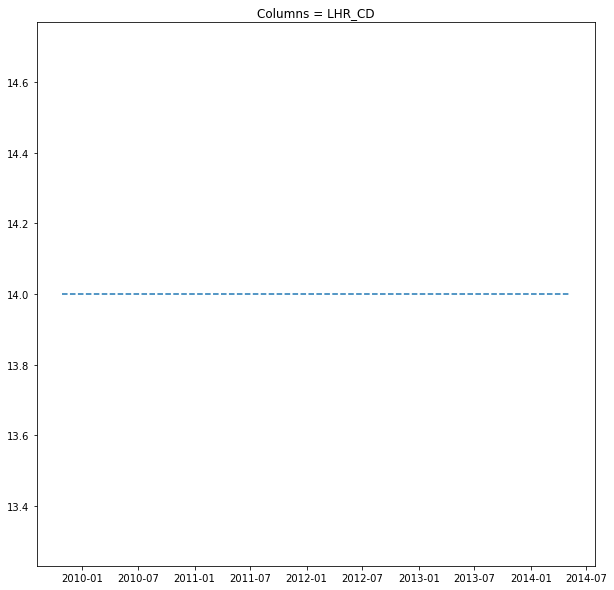

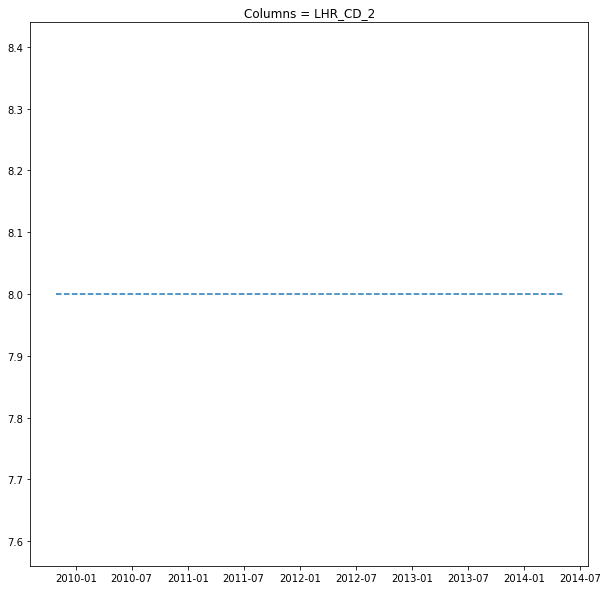

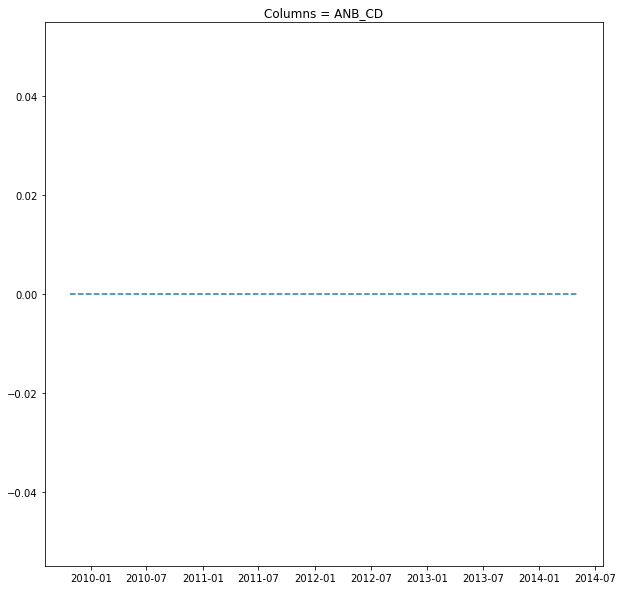

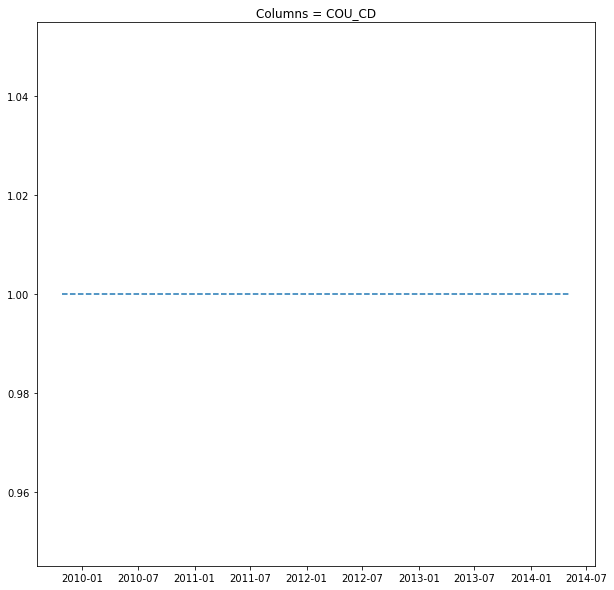

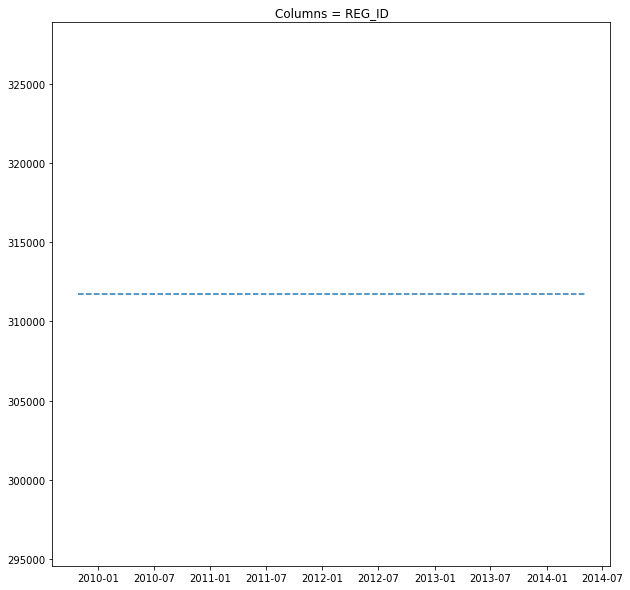

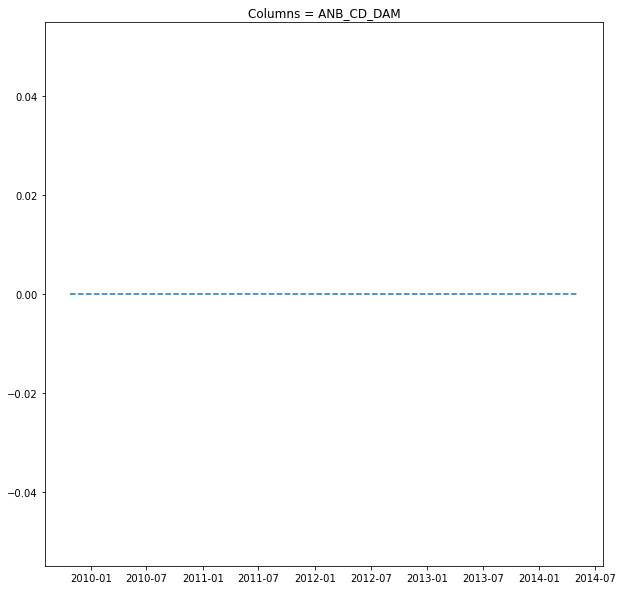

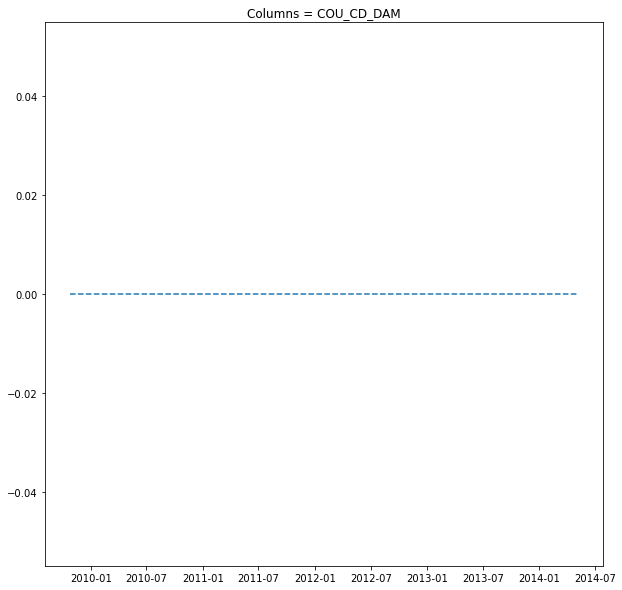

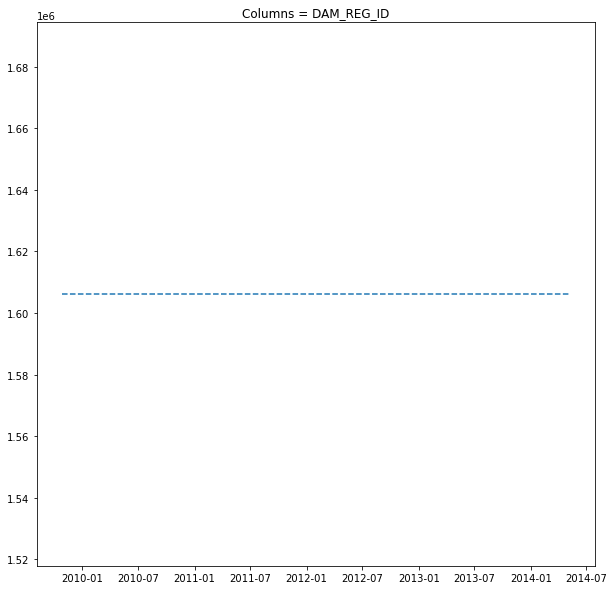

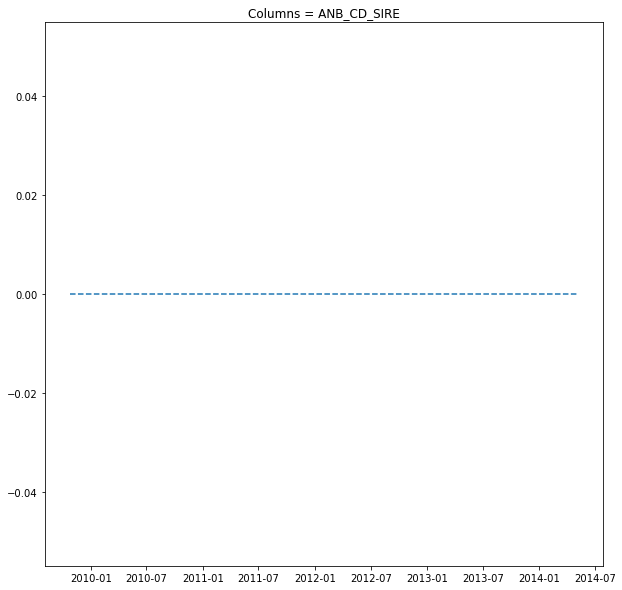

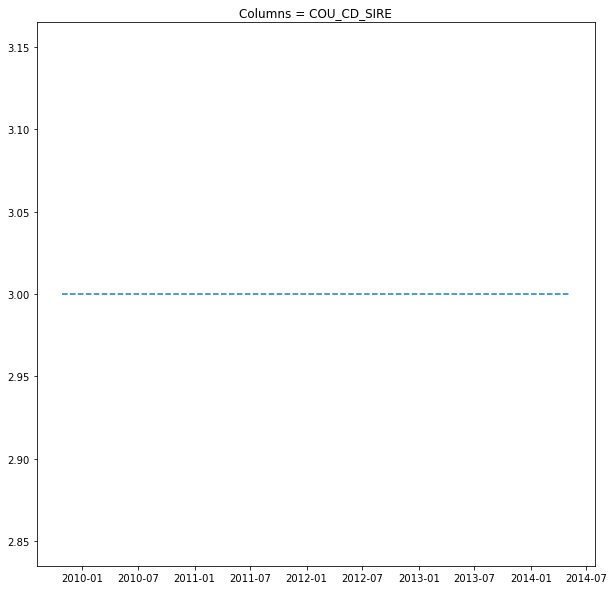

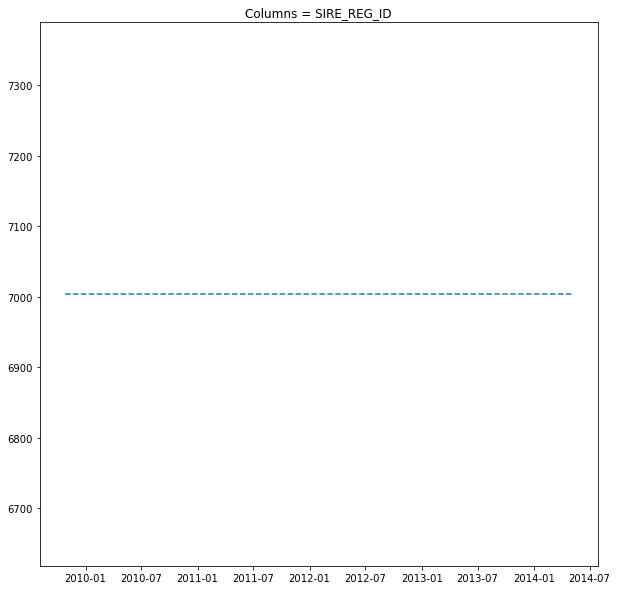

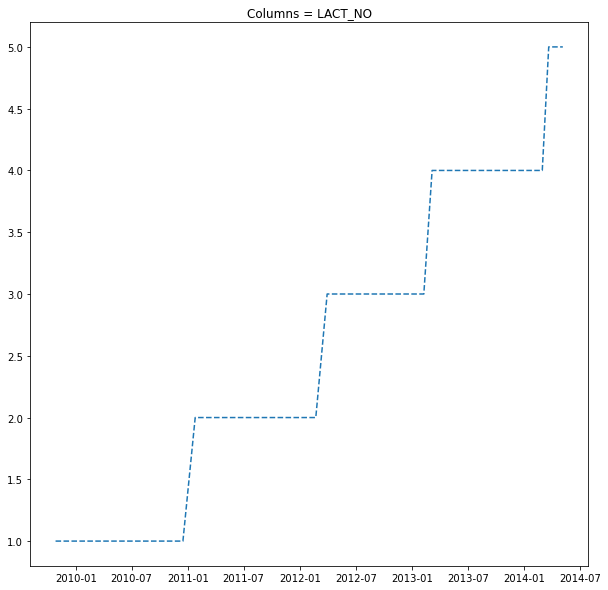

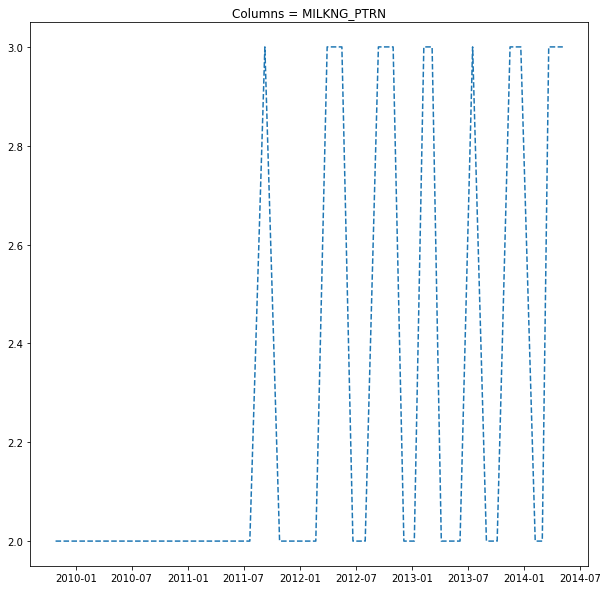

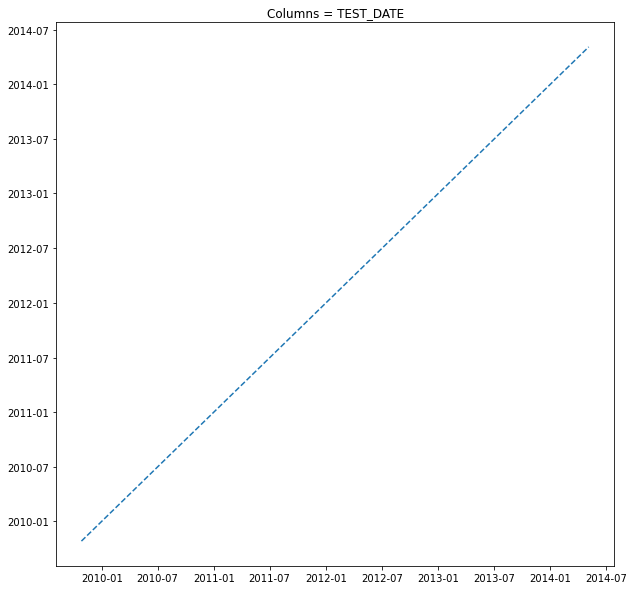

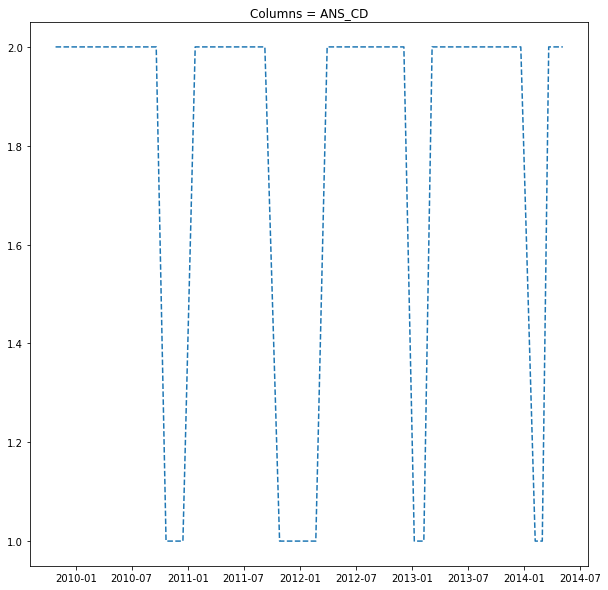

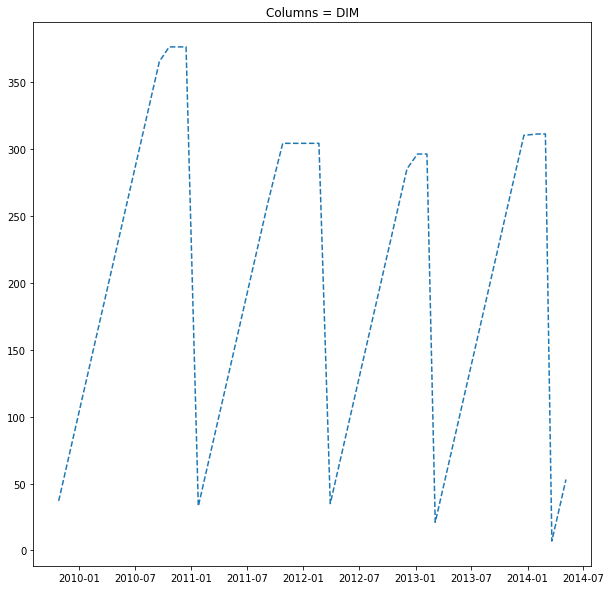

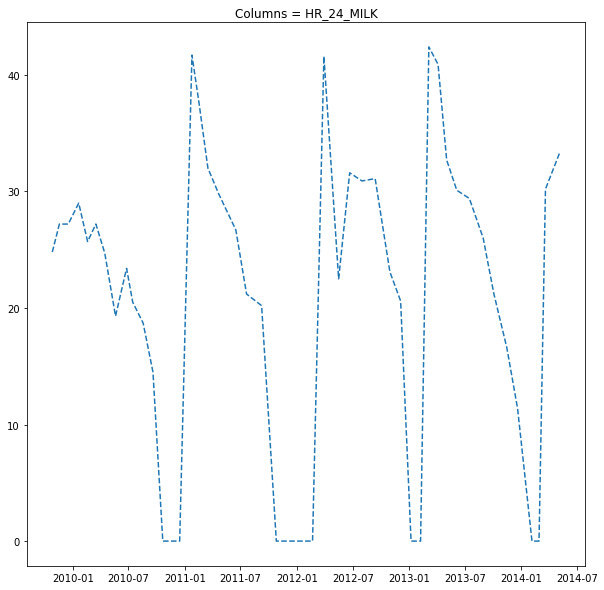

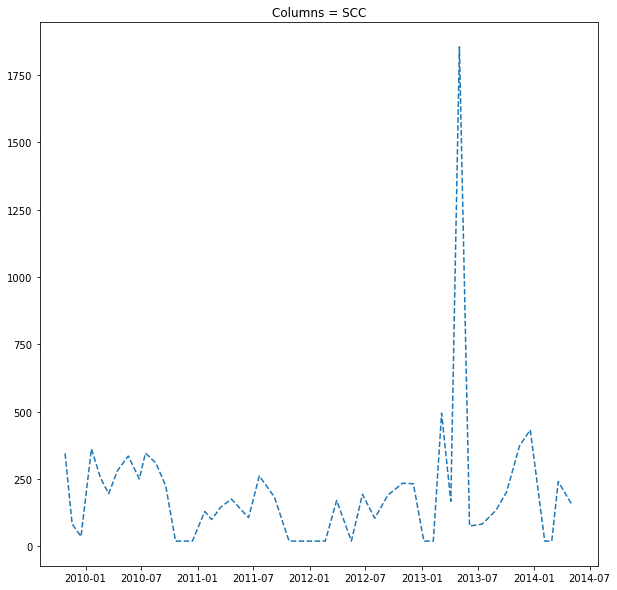

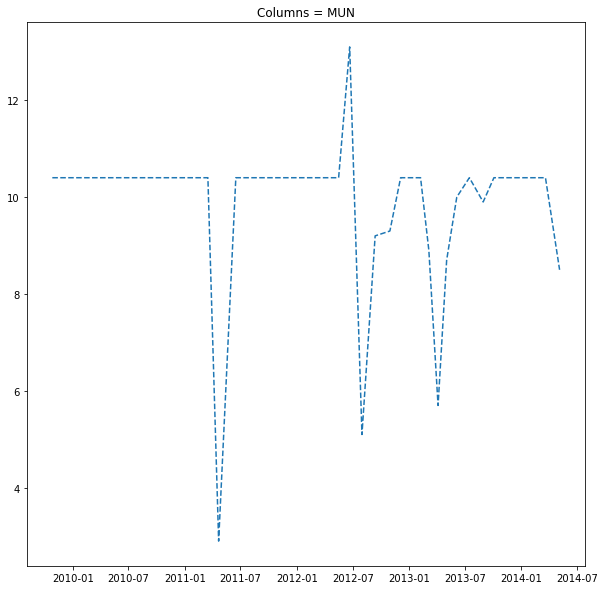

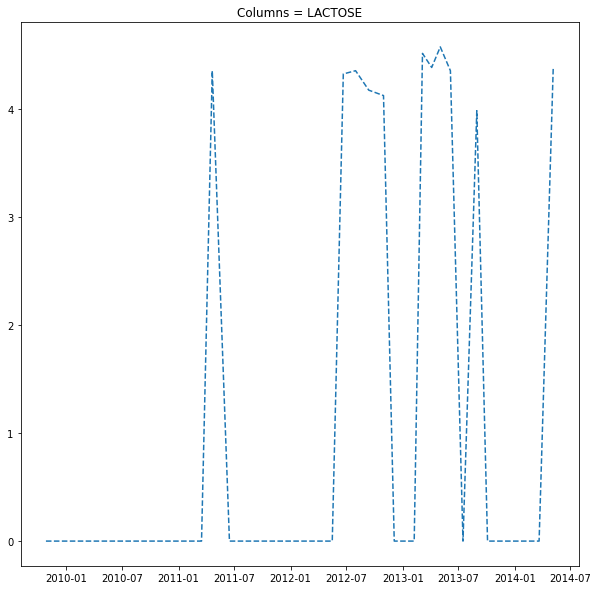

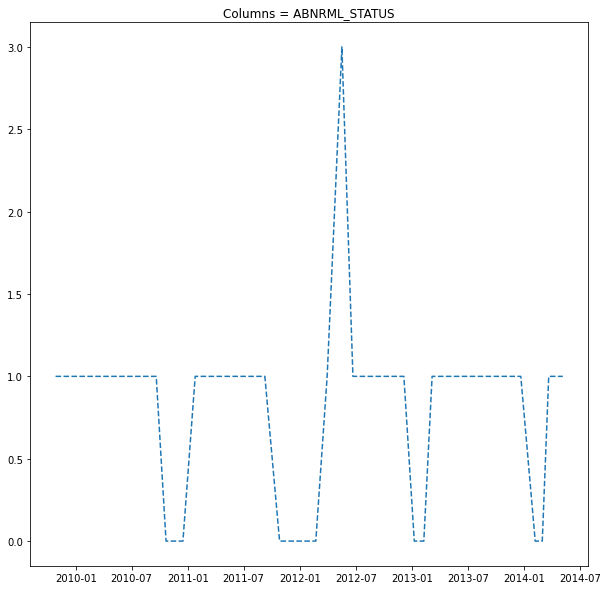

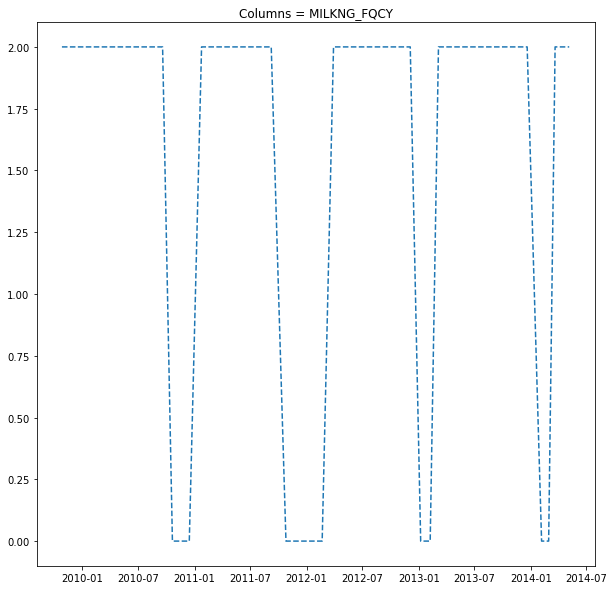

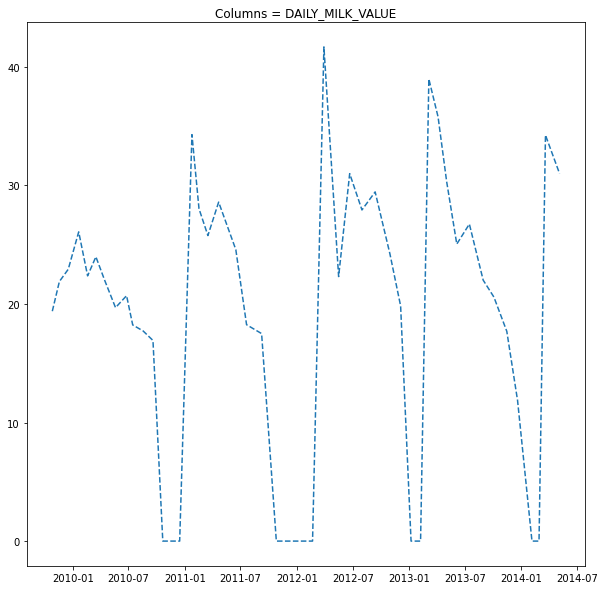

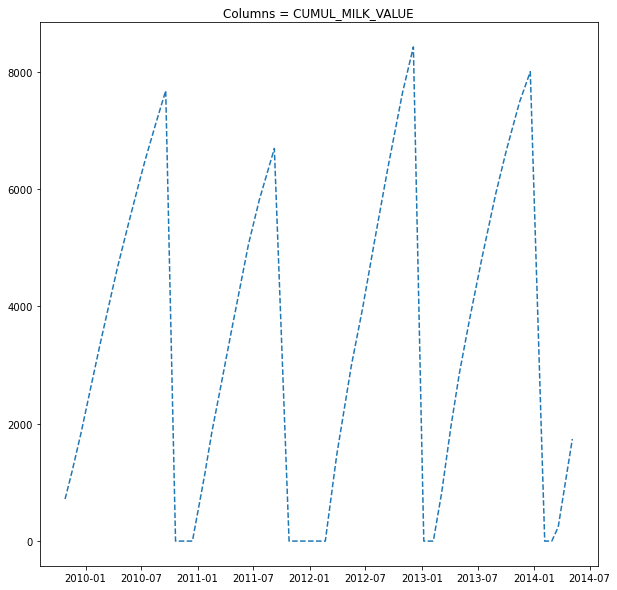

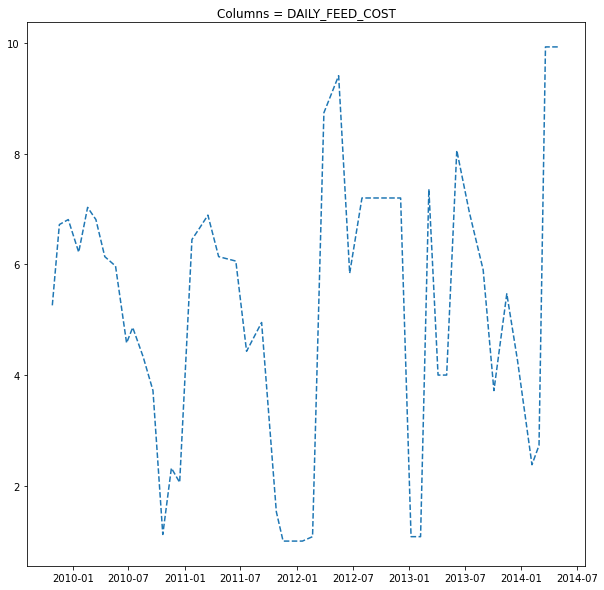

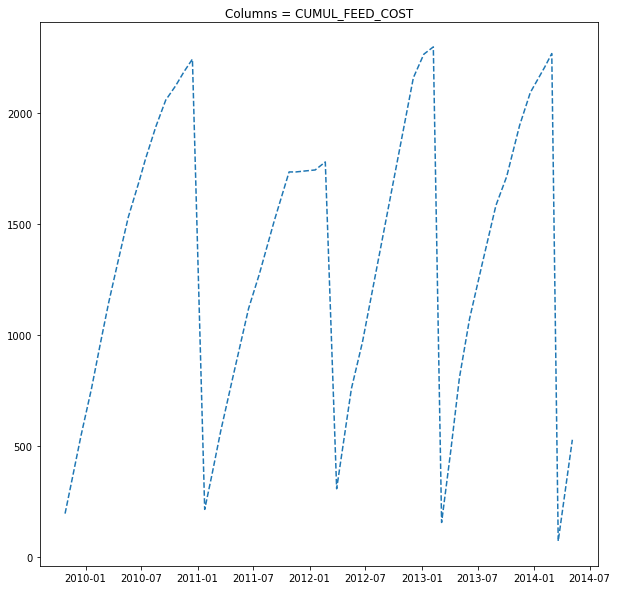

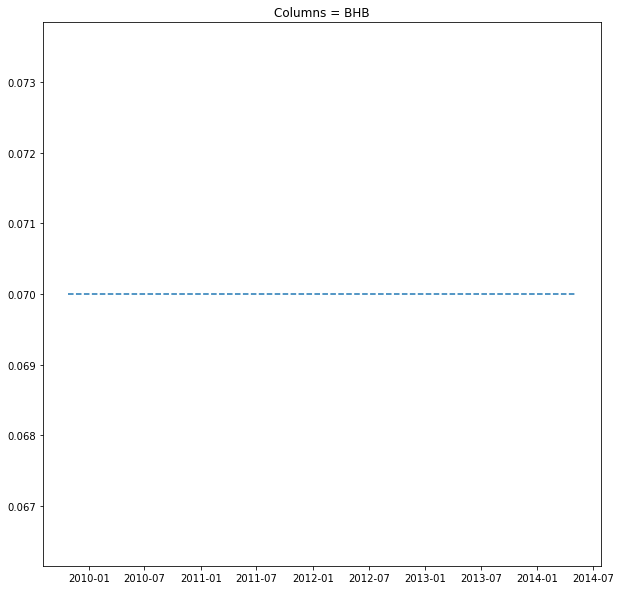

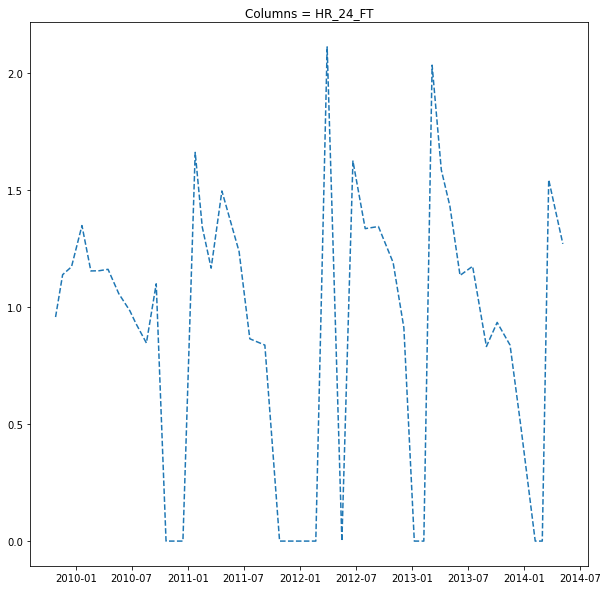

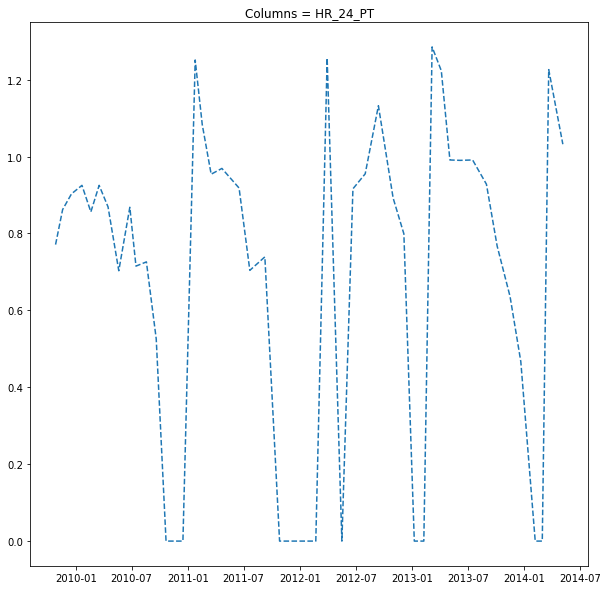

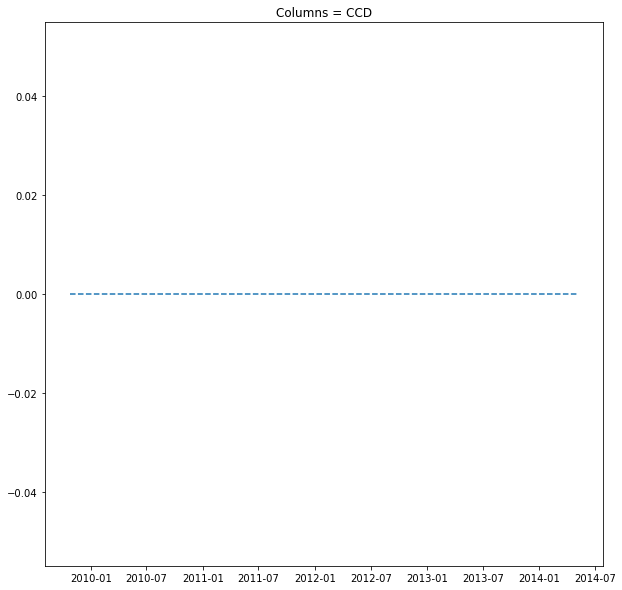

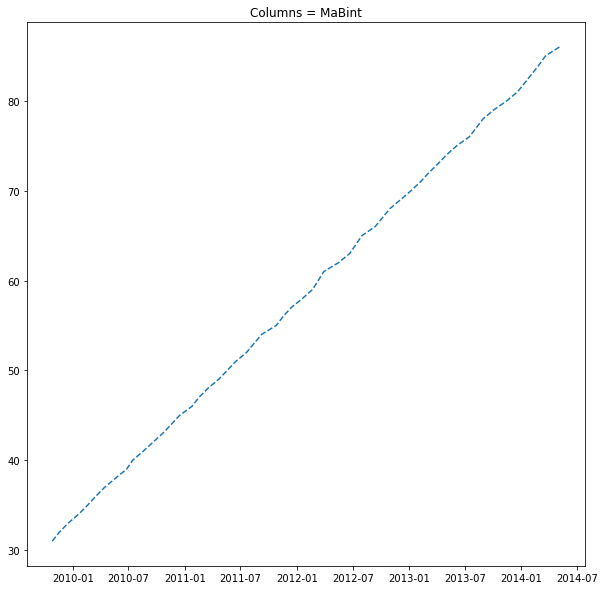

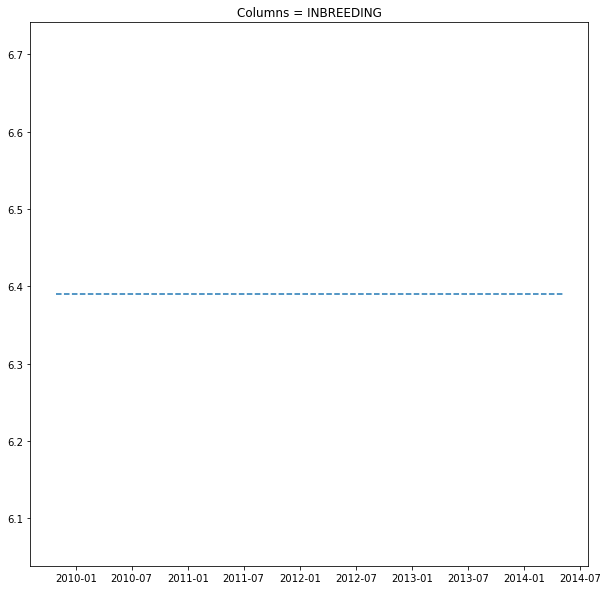

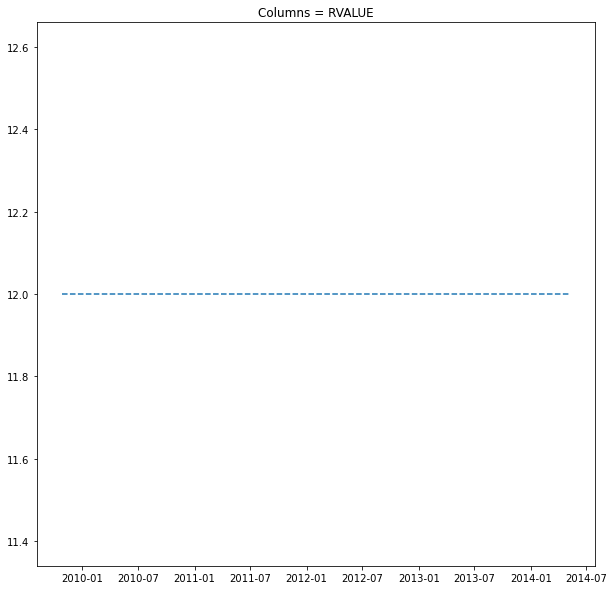

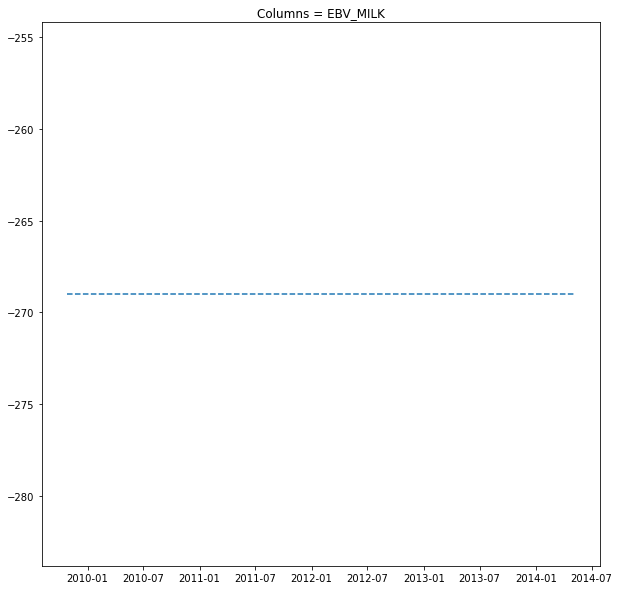

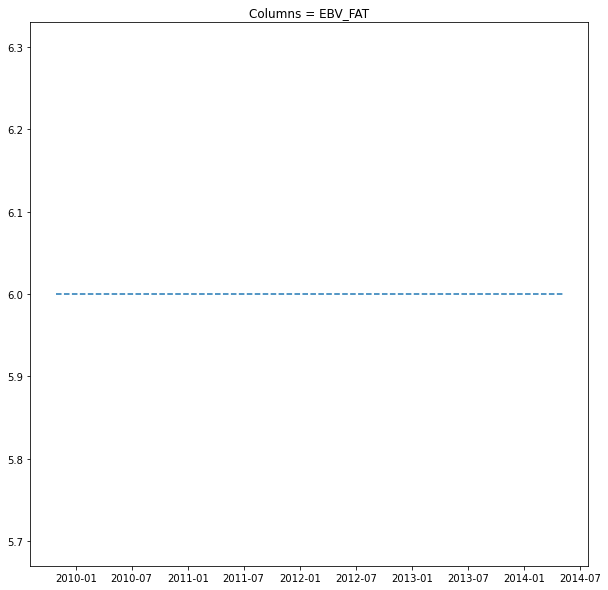

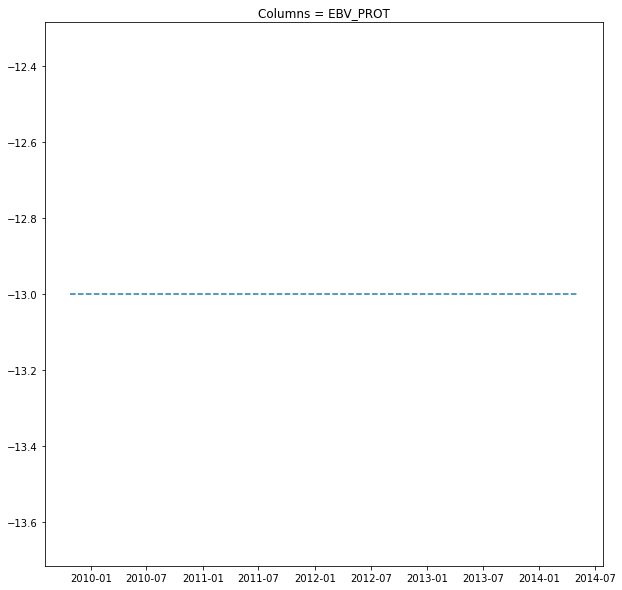

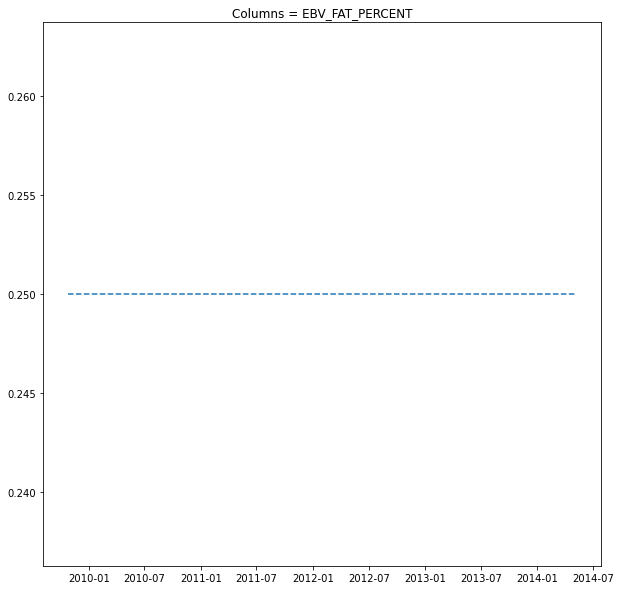

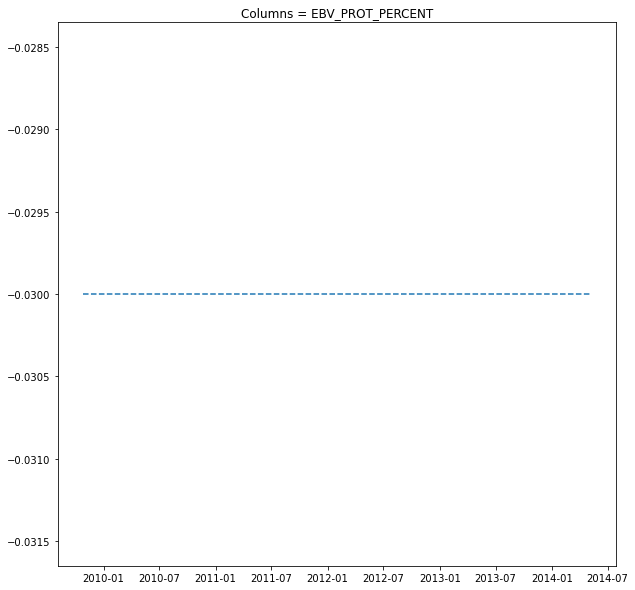

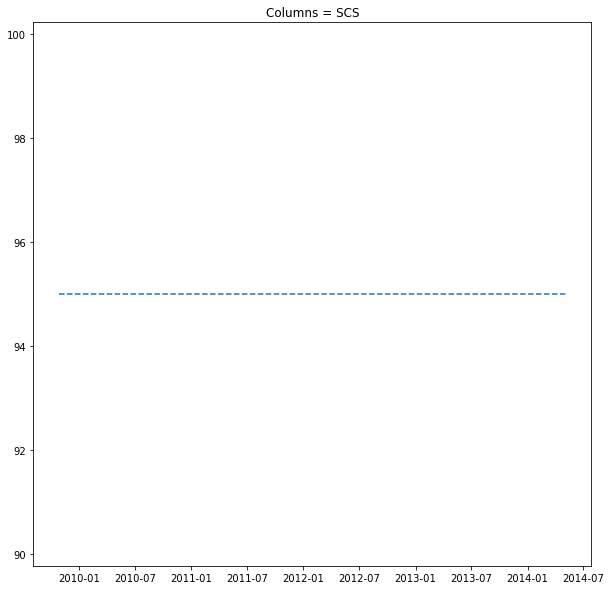

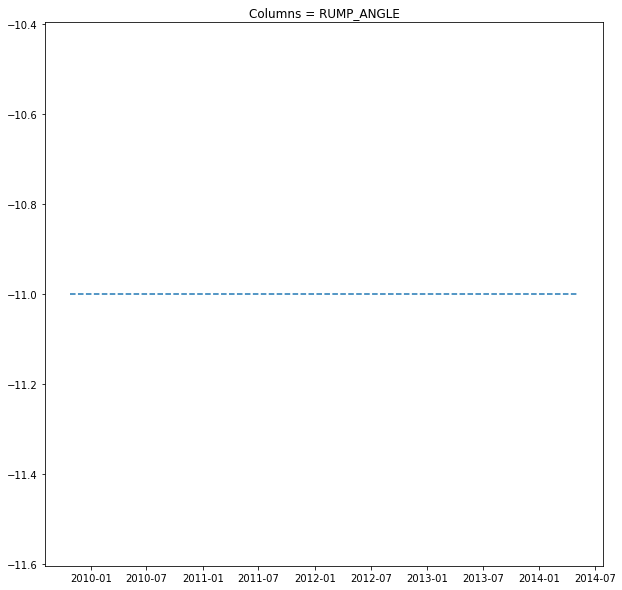

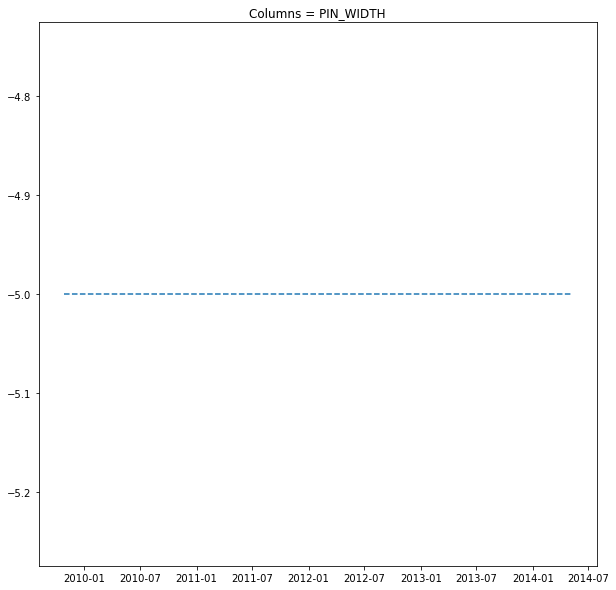

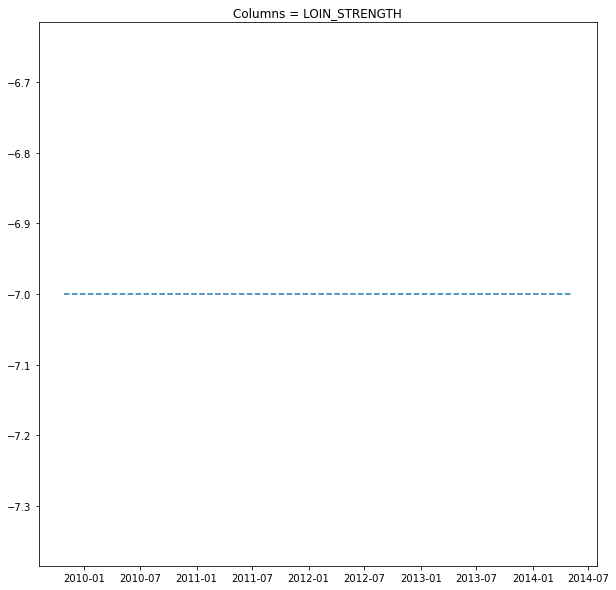

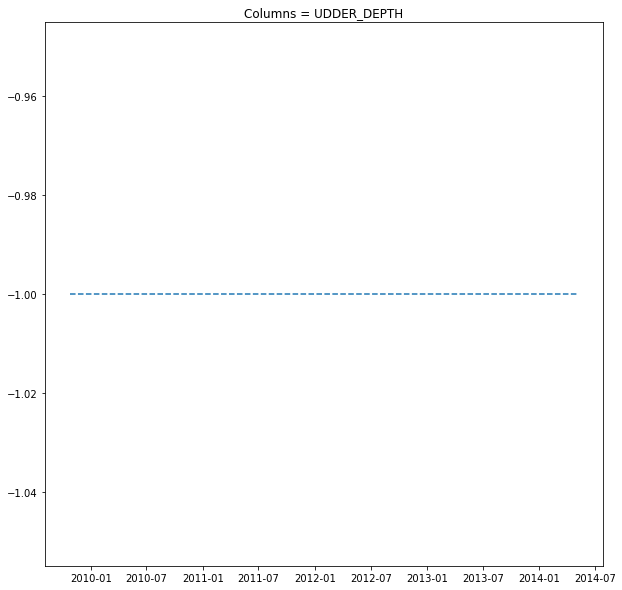

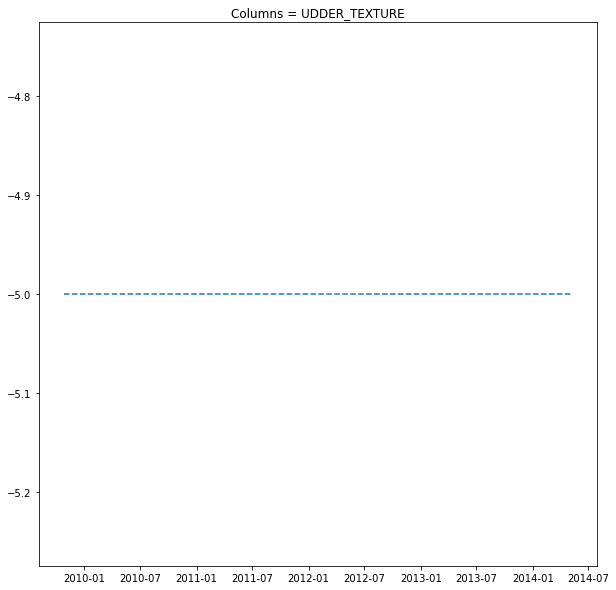

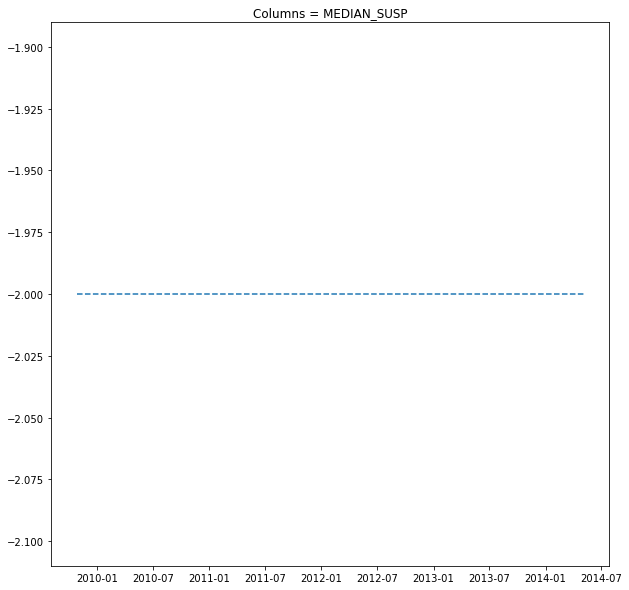

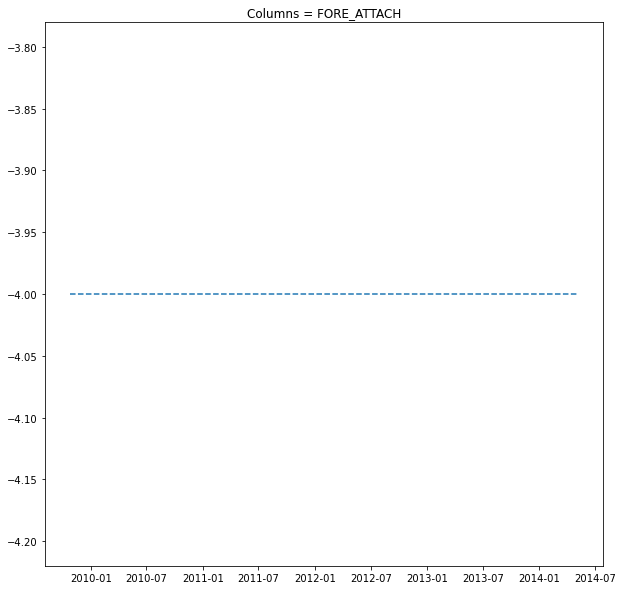

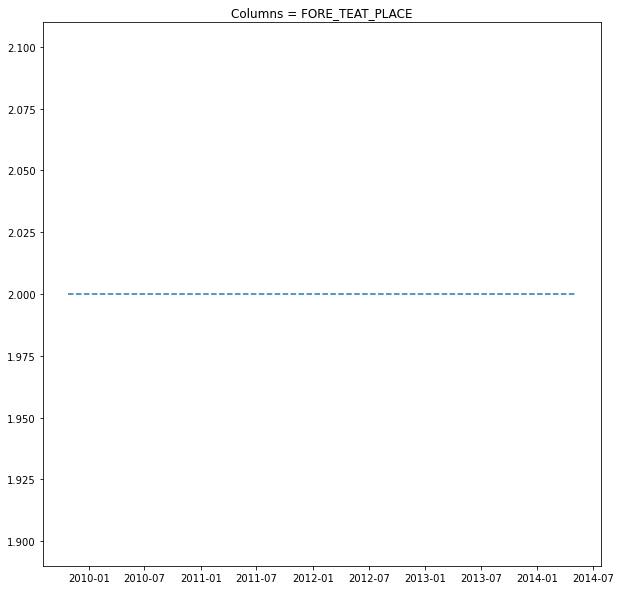

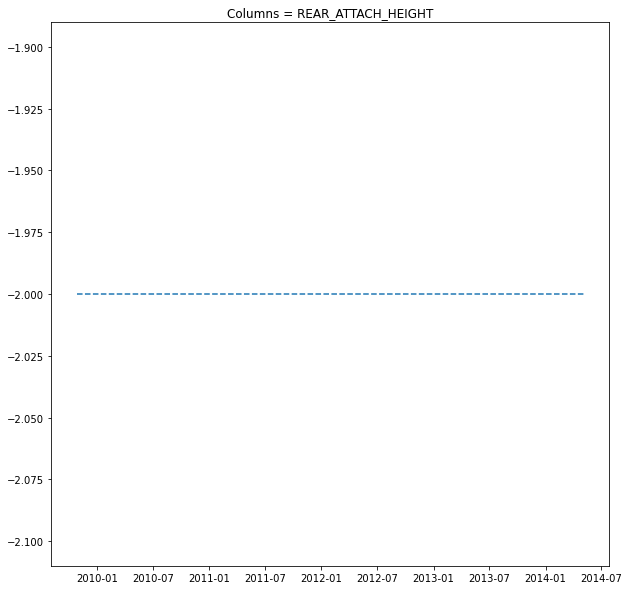

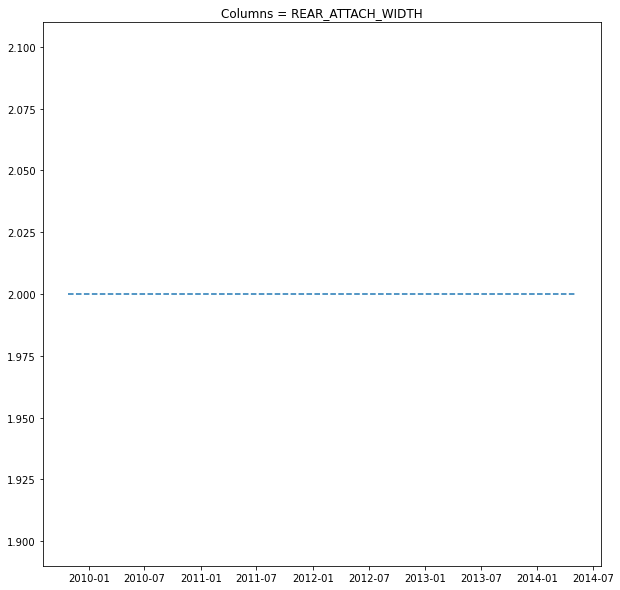

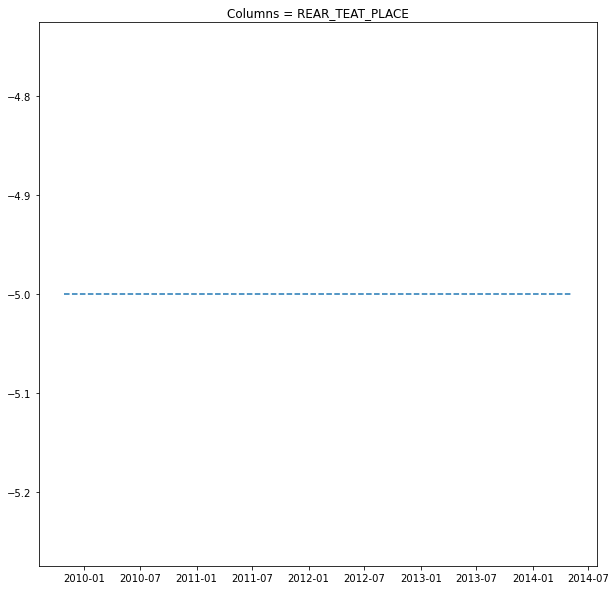

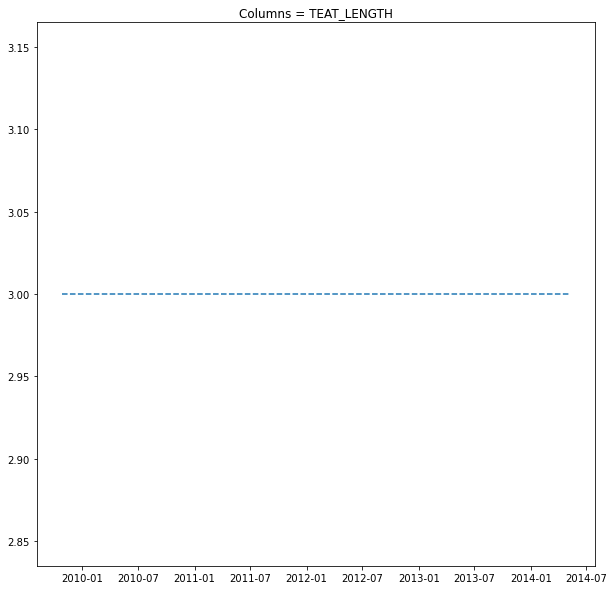

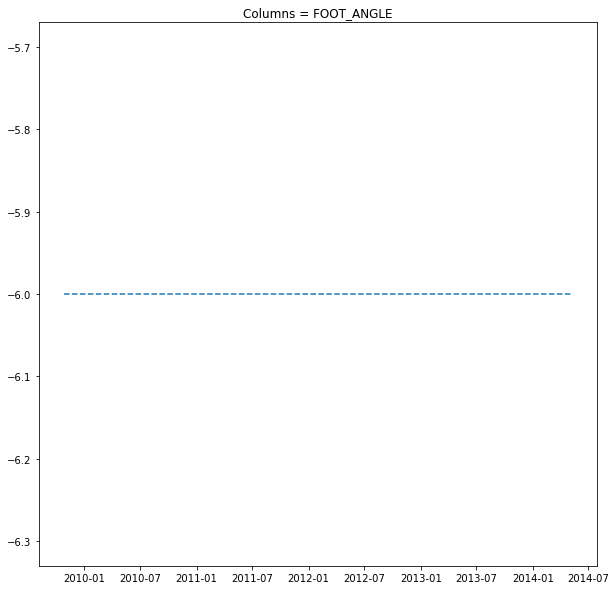

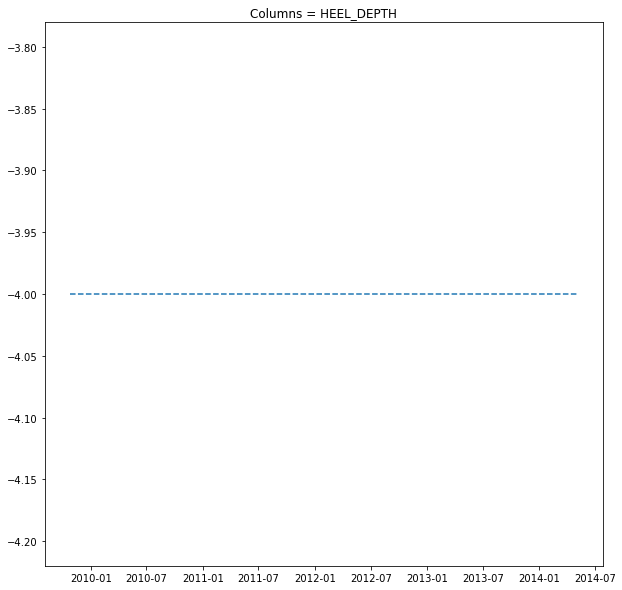

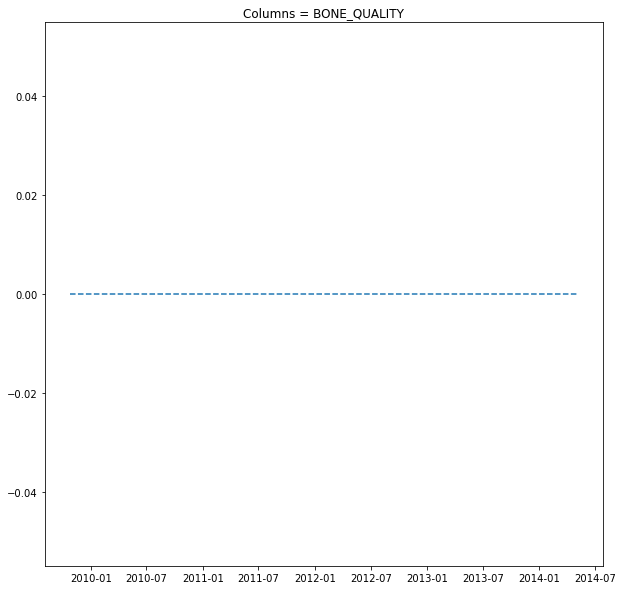

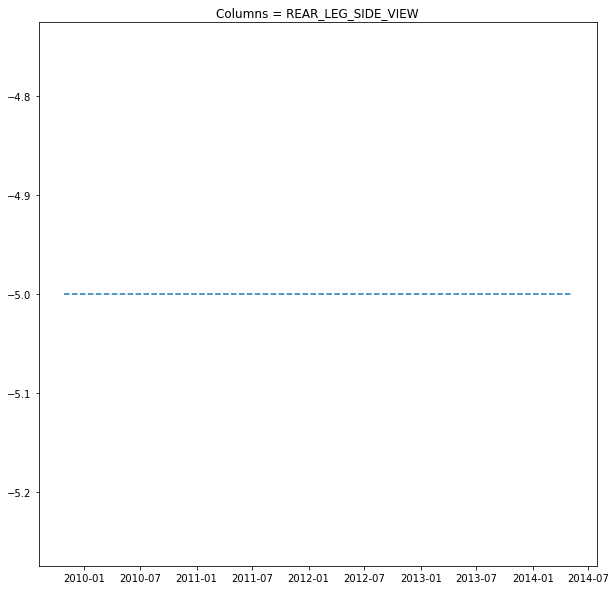

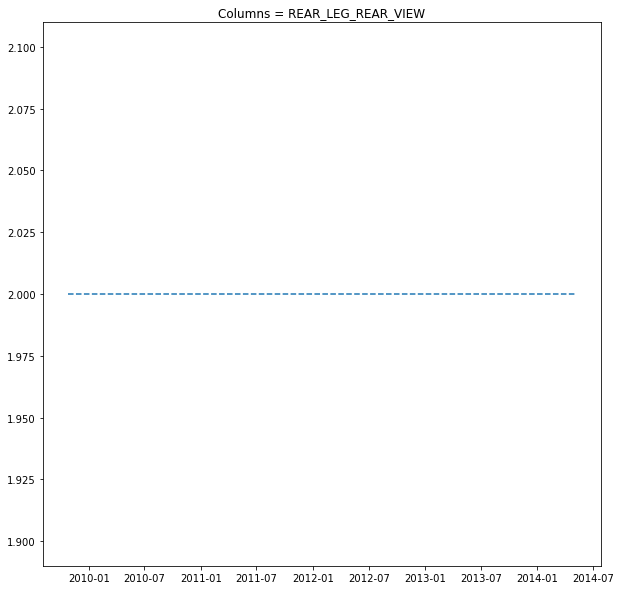

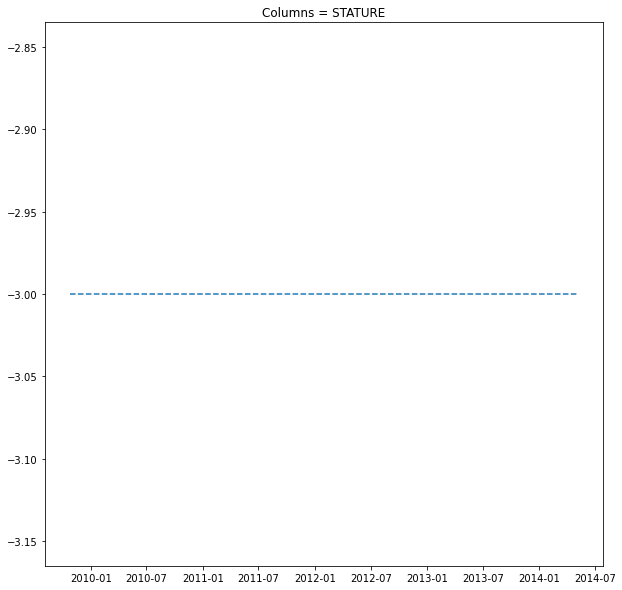

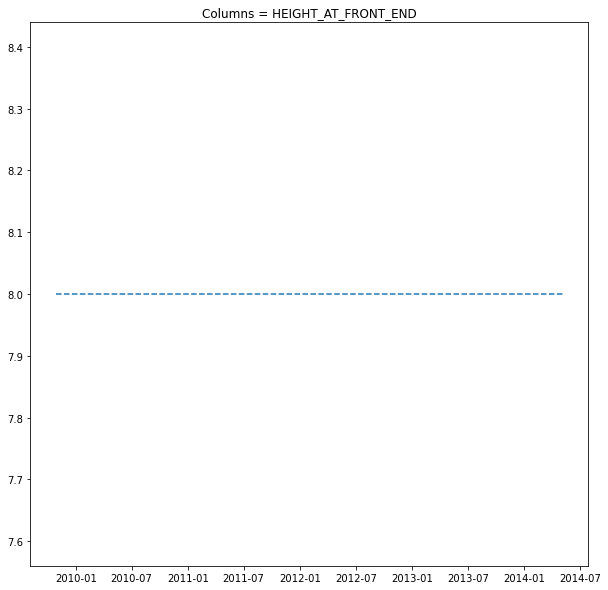

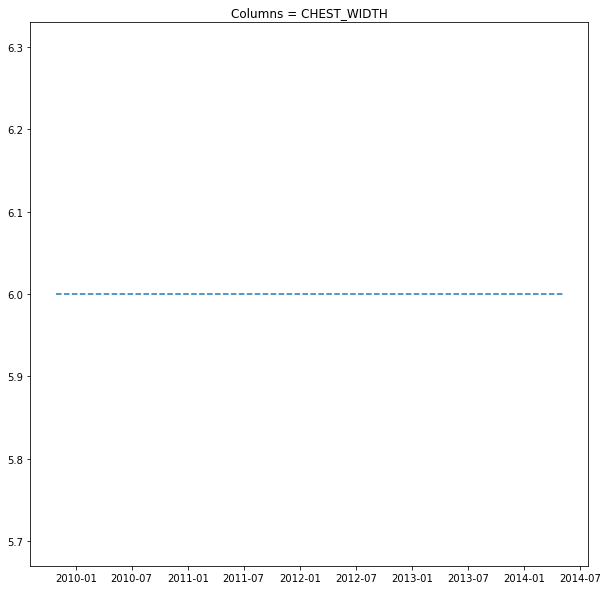

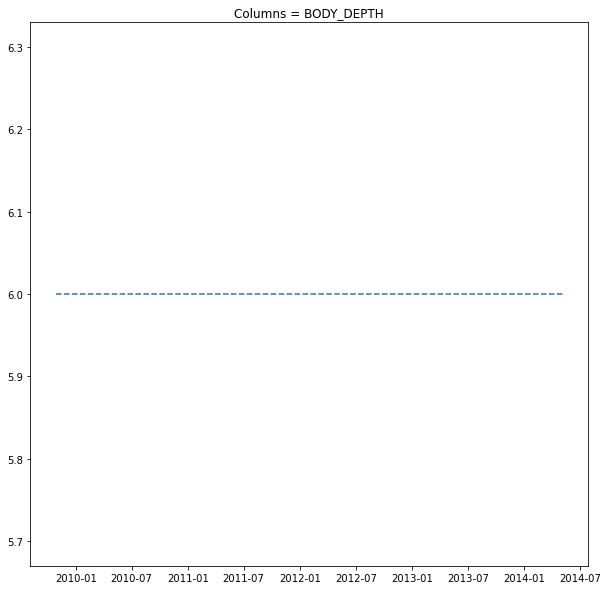

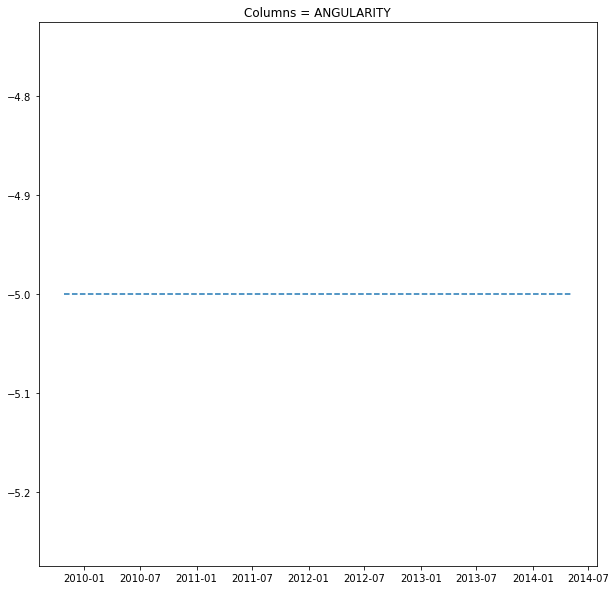

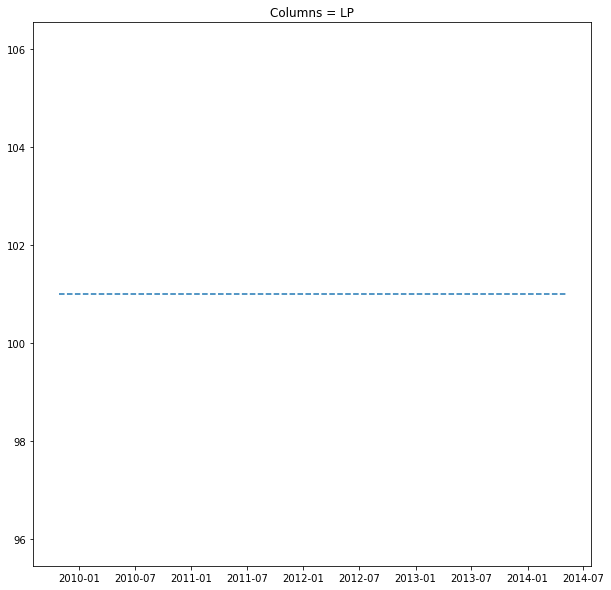

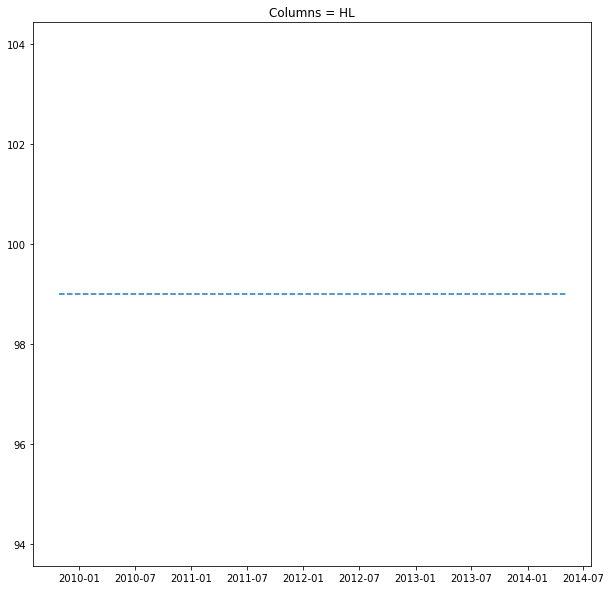

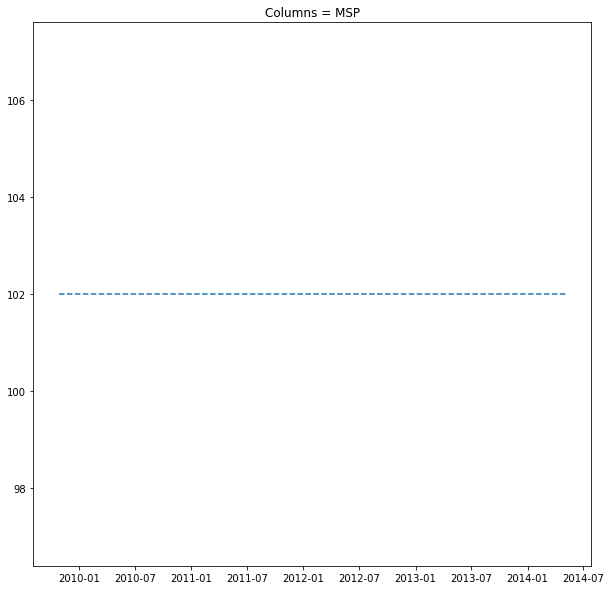

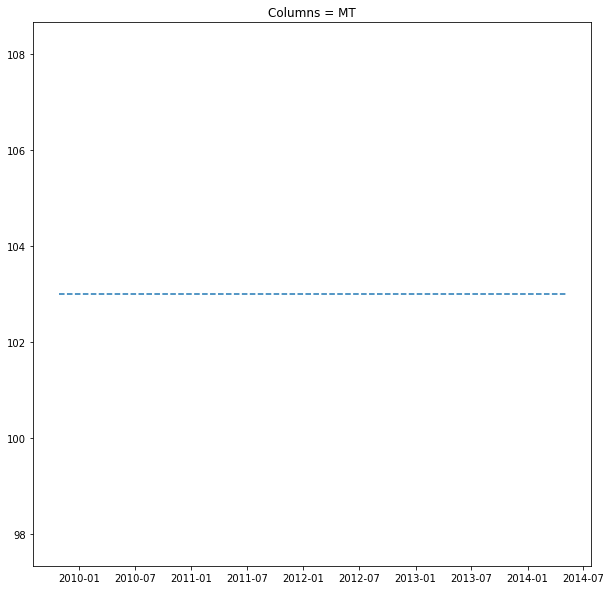

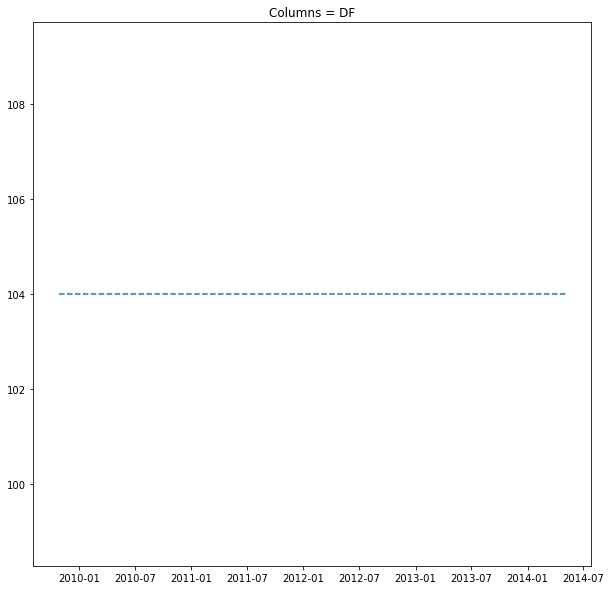

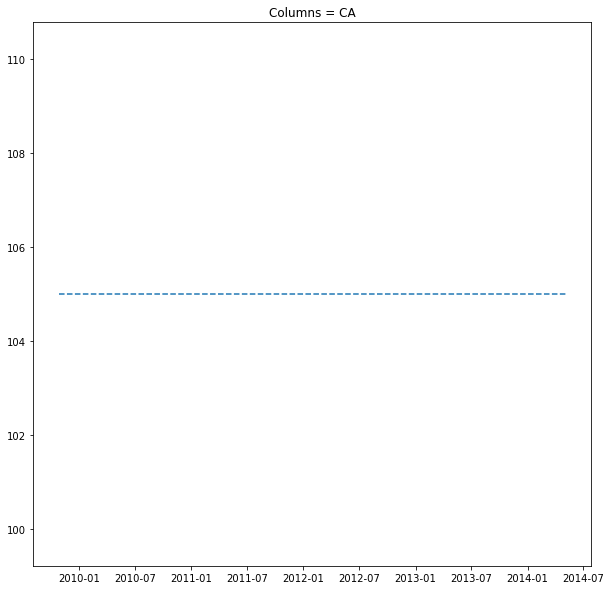

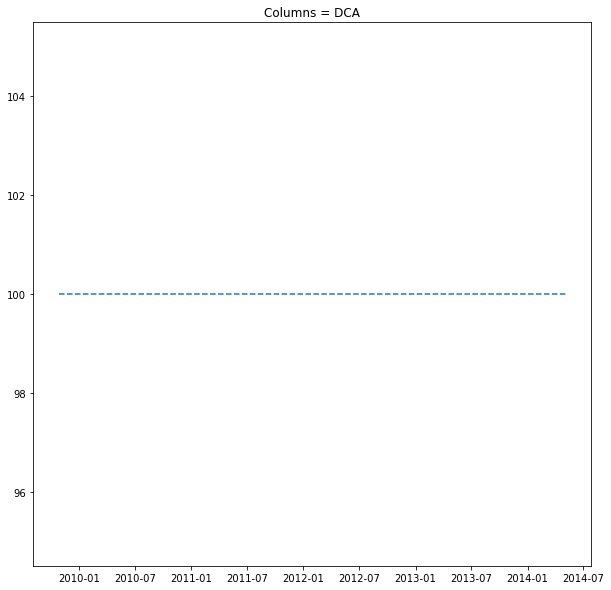

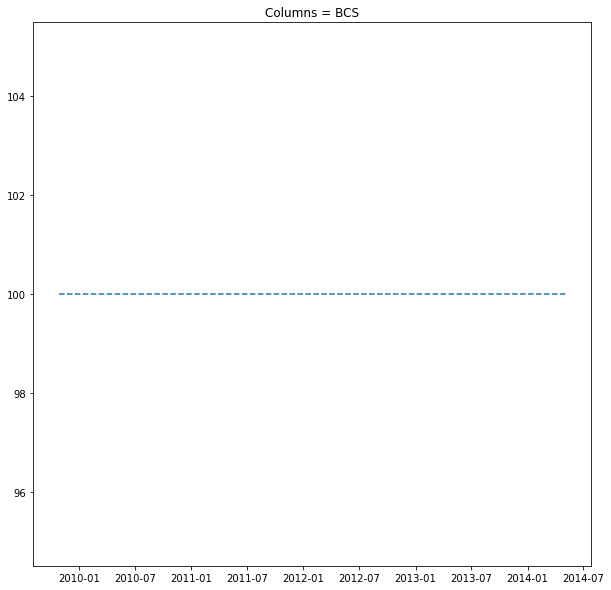

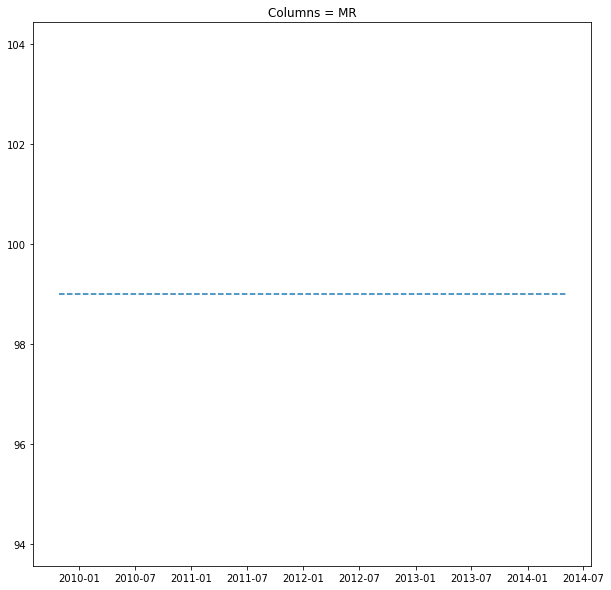

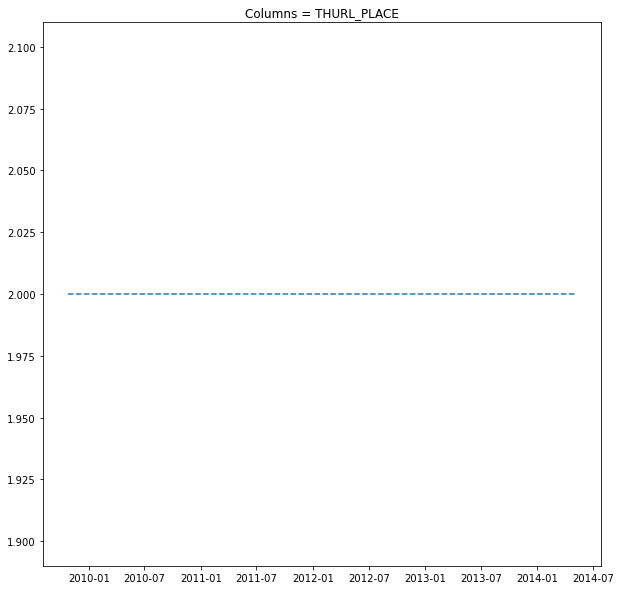

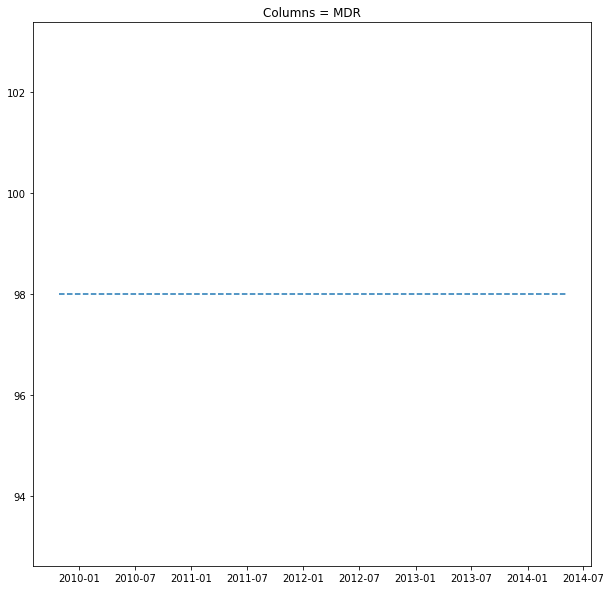

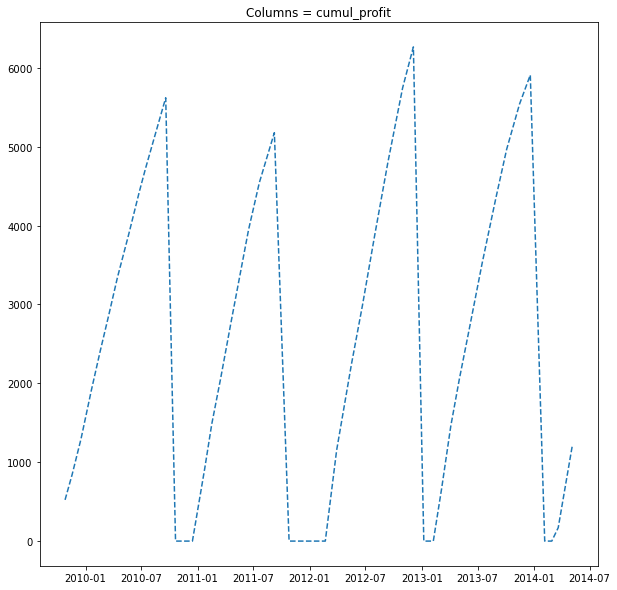

In [25]:
for c in x.columns:
    ind0 = np.where(x.ANM_ID==1)[0]
    plt.figure(figsize=(10,10))
    plt.plot(x.TEST_DATE[ind0], x.loc[ind0, c], '--')
    plt.title('Columns = %s' %c)

In [26]:
# BHB, 'CCD', 'MaBint', 'INBREEDING', 'RVALUE'

Text(0.5, 1.0, 'Columns = profit')

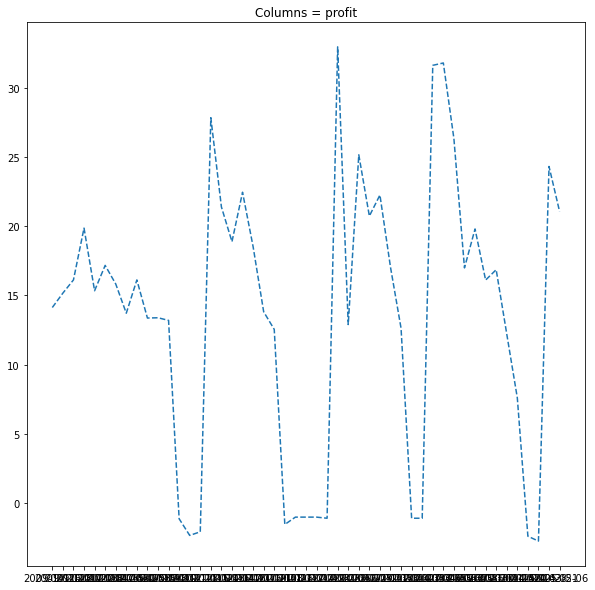

In [27]:
c = 'profit'
ind0 = np.where(x.ANM_ID==1)[0]
plt.figure(figsize=(10,10))
plt.plot(features.TEST_DATE[ind0], features.loc[ind0, c], '--')
plt.title('Columns = %s' %c)

In [29]:
# features.columns

In [30]:
# features.corr()

## Learning

### Train \& Test Split

Creating a validation set for time series problems is tricky because we have to take into account the time component. One cannot directly use the train_test_split or k-fold validation since this will disrupt the pattern in the series. The validation set should be created considering the date and time values.

In [28]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x_sort = x.sort_values(by='TEST_DATE')
#creating the train and validation set
x_train = x.iloc[:int(0.8*(x.shape[0]))]
x_test = x.iloc[int(0.8*(len(x))):]
#
y_train = y[:int(0.8*(y.shape[0]))]
y_test = y[int(0.8*(len(y))):]

print("Taille des données:")
print("------------------")
print("x_train:\t", x_train.shape)
print("x_test:\t\t", x_test.shape)
print("y_train:\t", y_train.shape)
print("y_test:\t\t", y_test.shape)


Taille des données:
------------------
x_train:	 (48592, 81)
x_test:		 (12148, 81)
y_train:	 (48592,)
y_test:		 (12148,)


In [29]:
x.dtypes

HRD_ID                      int64
HRD_PRV_CD                  int64
ANM_ID                      int64
ENTER_HERD_DATE    datetime64[ns]
COMPTR_NO                 float64
                        ...      
BCS                       float64
MR                        float64
THURL_PLACE               float64
MDR                       float64
cumul_profit              float64
Length: 81, dtype: object

In [30]:
x.columns

Index(['HRD_ID', 'HRD_PRV_CD', 'ANM_ID', 'ENTER_HERD_DATE', 'COMPTR_NO',
       'REGION', 'BIRTH_DATE', 'LEFT_HERD_DATE', 'LHR_CD', 'LHR_CD_2',
       'ANB_CD', 'COU_CD', 'REG_ID', 'ANB_CD_DAM', 'COU_CD_DAM', 'DAM_REG_ID',
       'ANB_CD_SIRE', 'COU_CD_SIRE', 'SIRE_REG_ID', 'LACT_NO', 'MILKNG_PTRN',
       'TEST_DATE', 'ANS_CD', 'DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE',
       'ABNRML_STATUS', 'MILKNG_FQCY', 'DAILY_MILK_VALUE', 'CUMUL_MILK_VALUE',
       'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'BHB', 'HR_24_FT', 'HR_24_PT',
       'CCD', 'MaBint', 'INBREEDING', 'RVALUE', 'EBV_MILK', 'EBV_FAT',
       'EBV_PROT', 'EBV_FAT_PERCENT', 'EBV_PROT_PERCENT', 'SCS', 'RUMP_ANGLE',
       'PIN_WIDTH', 'LOIN_STRENGTH', 'UDDER_DEPTH', 'UDDER_TEXTURE',
       'MEDIAN_SUSP', 'FORE_ATTACH', 'FORE_TEAT_PLACE', 'REAR_ATTACH_HEIGHT',
       'REAR_ATTACH_WIDTH', 'REAR_TEAT_PLACE', 'TEAT_LENGTH', 'FOOT_ANGLE',
       'HEEL_DEPTH', 'BONE_QUALITY', 'REAR_LEG_SIDE_VIEW',
       'REAR_LEG_REAR_VIEW', 'STATUR

# Etape 1: Clustering K-Means  \&  PCA of EBV 

In [22]:
# from sklearn.decomposition import PCA

In [31]:
cols_EBV = ['EBV_MILK', 'EBV_FAT', 'EBV_PROT', 'EBV_FAT_PERCENT','EBV_PROT_PERCENT', 'SCS']

# definir standard scaler
x_normalized_EBV = x[cols_EBV] #.drop(list_cols_object, axis=1)
scaler_EBV = StandardScaler().fit_transform(x_normalized_EBV)
# x_normalized.columns

In [32]:
#
pca_EBV = PCA()
pca_EBV.fit(x_normalized_EBV)

PCA()

In [33]:
# how much variance is explained by each component
pca_EBV.explained_variance_ratio_

array([9.98038530e-01, 1.72480371e-03, 2.03895730e-04, 3.27684000e-05,
       1.67918993e-09, 1.76790666e-10])

In [34]:
# All genetics attributes
cols_gen = ['INBREEDING', 'RVALUE', 'EBV_MILK', 'EBV_FAT',
       'EBV_PROT', 'EBV_FAT_PERCENT', 'EBV_PROT_PERCENT', 'SCS', 'RUMP_ANGLE',
       'PIN_WIDTH', 'LOIN_STRENGTH', 'UDDER_DEPTH', 'UDDER_TEXTURE',
       'MEDIAN_SUSP', 'FORE_ATTACH', 'FORE_TEAT_PLACE', 'REAR_ATTACH_HEIGHT',
       'REAR_ATTACH_WIDTH', 'REAR_TEAT_PLACE', 'TEAT_LENGTH', 'FOOT_ANGLE',
       'HEEL_DEPTH', 'BONE_QUALITY', 'REAR_LEG_SIDE_VIEW',
       'REAR_LEG_REAR_VIEW', 'STATURE', 'HEIGHT_AT_FRONT_END', 'CHEST_WIDTH',
       'BODY_DEPTH', 'ANGULARITY', 'LP', 'HL', 'MSP', 'MT', 'DF', 'CA', 'DCA',
       'BCS', 'MR', 'THURL_PLACE', 'MDR']

# Standardization
x_normalized_gen = x[cols_gen] #.drop(list_cols_object, axis=1)
scaler_gen = StandardScaler().fit_transform(x_normalized_gen)
#
#
pca_gen = PCA()
pca_gen.fit(x_normalized_gen)
#
pca_gen.explained_variance_ratio_

array([9.97089463e-01, 1.74542069e-03, 2.10901389e-04, 1.77596496e-04,
       8.40648036e-05, 7.26160720e-05, 6.23803077e-05, 4.96949395e-05,
       4.37907683e-05, 4.12932749e-05, 3.49078587e-05, 3.29539773e-05,
       2.83882586e-05, 2.71659295e-05, 2.60123611e-05, 2.33219164e-05,
       2.26574959e-05, 2.05482949e-05, 1.81041131e-05, 1.75528373e-05,
       1.72697844e-05, 1.62008478e-05, 1.43968555e-05, 1.33476559e-05,
       1.29256845e-05, 1.13718671e-05, 1.07359552e-05, 1.01481410e-05,
       9.53921516e-06, 8.47456026e-06, 8.29406361e-06, 7.34366016e-06,
       6.76808799e-06, 6.35406440e-06, 5.49598601e-06, 4.21869204e-06,
       2.91454133e-06, 2.75414929e-06, 2.60991431e-06, 1.63270396e-09,
       1.71671872e-10])

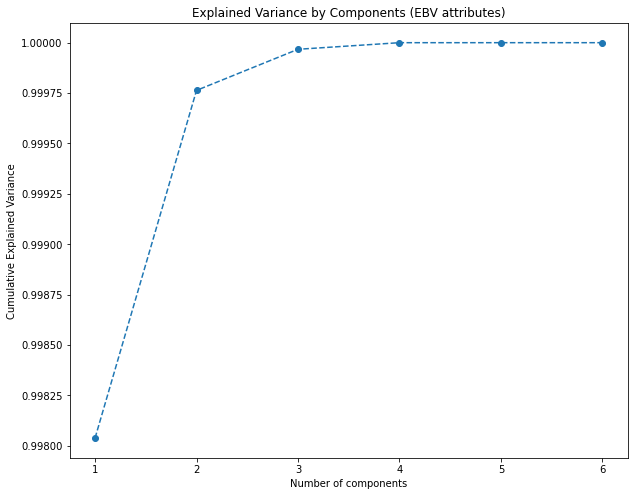

Text(0, 0.5, 'Cumulative Explained Variance')

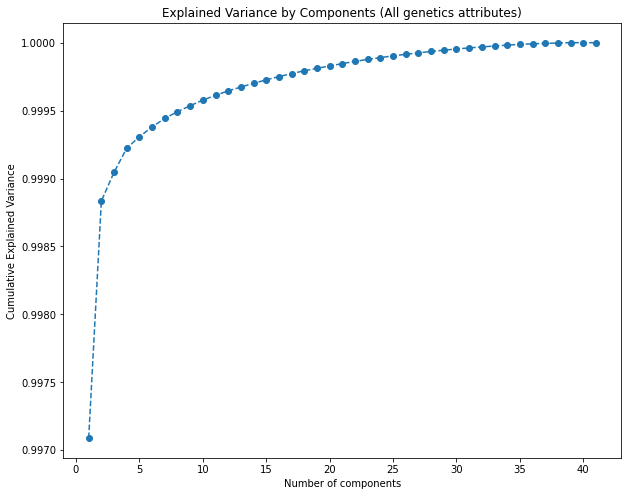

In [35]:
# The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). 
# A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 2 components.
plt.figure(figsize= (10,8))
plt.plot(range(1, len(pca_EBV.explained_variance_ratio_)+1), pca_EBV.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components (EBV attributes)')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# All genetics attributes
#
# The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). 
# A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 2 components.
plt.figure(figsize= (10,8))
plt.plot(range(1, len(pca_gen.explained_variance_ratio_)+1), pca_gen.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components (All genetics attributes)')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

We choose 2 components

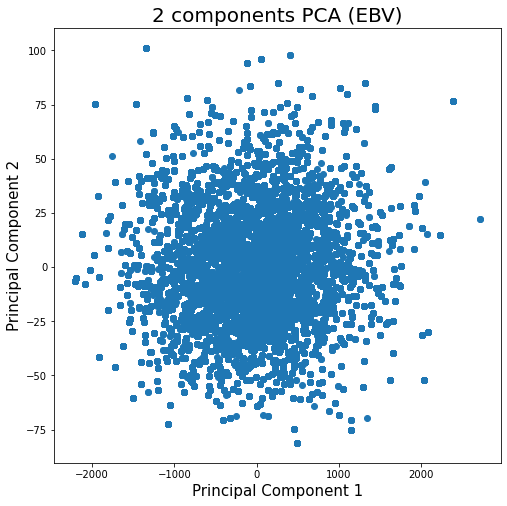

In [37]:
#===============================================================================================================
# Visualisation des donnees en 2D
pca = PCA(n_components=2)
principalComponents_EBV = pca.fit_transform(x_normalized_EBV)
principalDf_EBV = pd.DataFrame(data = principalComponents_EBV, 
                           columns = ['PCA 1', 'PCA 2'])


# #=====
# finalDf = pd.concat([principalDf, y], axis = 1)

# #====
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA (EBV)', fontsize = 20)

# #==========================================

fig = ax.scatter(principalComponents_EBV[:, 0], principalComponents_EBV[:, 1], cmap='rainbow')#, color=df['species'])
# fig.show()

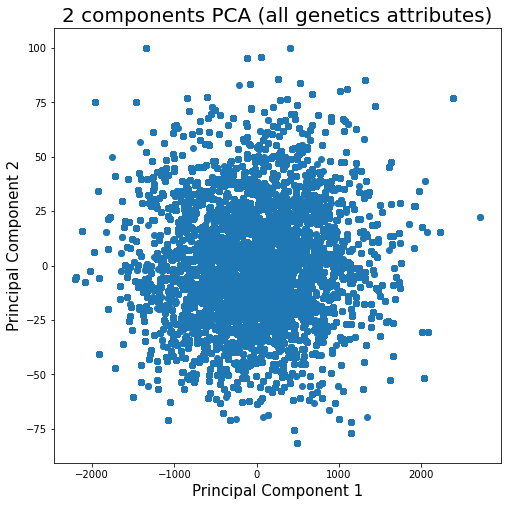

In [38]:
# Visualisation des donnees en 2D
pca_gen = PCA(n_components=2)
principalComponents_gen = pca_gen.fit_transform(x_normalized_gen)
principalDf_gen = pd.DataFrame(data = principalComponents_gen, 
                           columns = ['PCA 1', 'PCA 2'])


# #=====
# finalDf = pd.concat([principalDf, y], axis = 1)

# #====
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA (all genetics attributes)', fontsize = 20)
# #==========================================

fig = ax.scatter(principalComponents_gen[:, 0], principalComponents_gen[:, 1], cmap='rainbow')
# fig.show()

#### K-Means

In [31]:
# from sklearn.cluster import KMeans

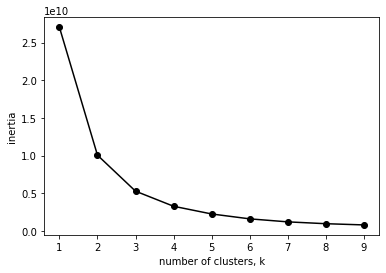

In [39]:
#
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalDf_EBV) #.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

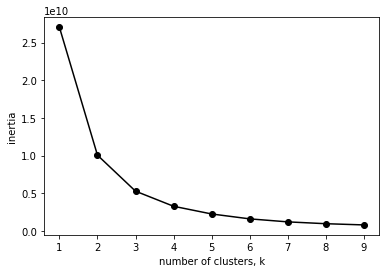

In [40]:
#
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalDf_gen) #.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [41]:
# from mpl_toolkits.mplot3d.axes3d import Axes3D

# from sklearn import metrics


Score 0.541550


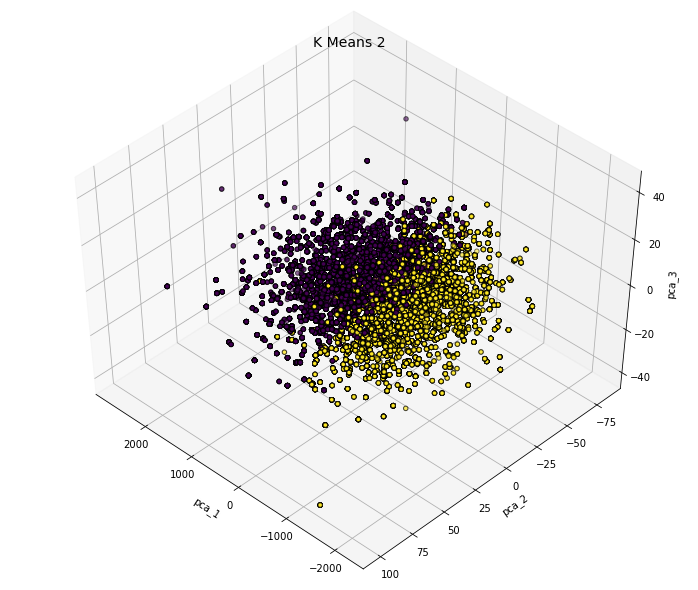

Score 0.518894


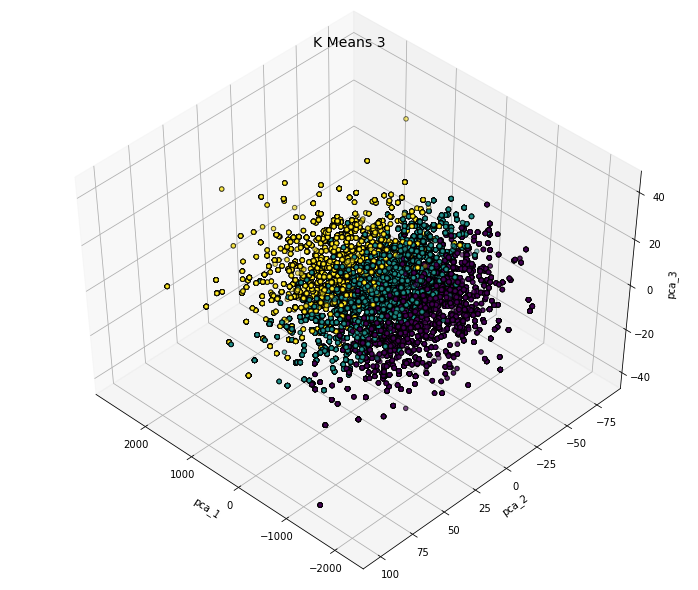

Score 0.508673


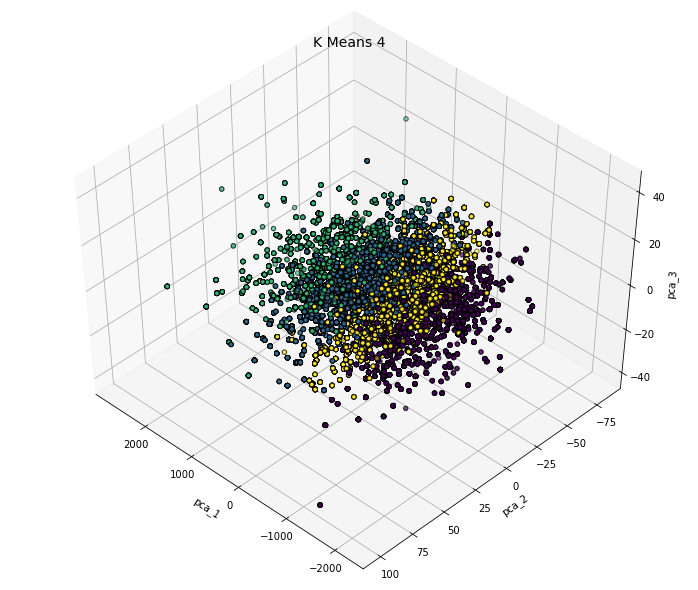

Score 0.497189


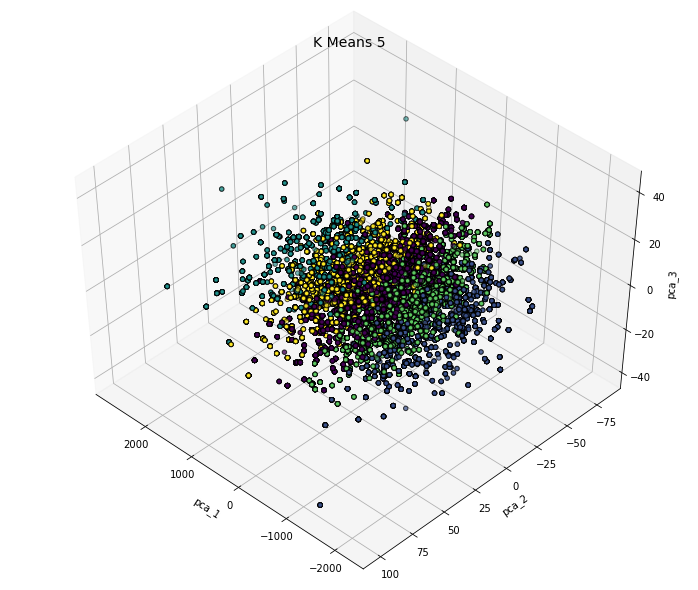

In [42]:
### All genetics Attributes
scores_kmeans = []
k_list = [2, 3, 4, 5]
for n in k_list: #range(3, 6):
    pca_gen3 = PCA(n_components=3)
    principalComponents_gen3 = pca_gen3.fit_transform(x_normalized_gen)
    principalDf_gen3 = pd.DataFrame(data = principalComponents_gen3)#, columns = ['PCA 1', 'PCA 2', 'PCA 3'])
    # X = X.reset_index(drop=True)
    kmeans_gen = KMeans(n_clusters=n)
    kmeans_gen.fit(principalDf_gen3)
    kmeans_gen.predict(principalDf_gen3)
    labels = kmeans_gen.labels_
    score = metrics.silhouette_score(x_normalized_gen, labels)
    scores_kmeans.append(score)
    print('Score %f' %score)
    #Plotting
    fig = plt.figure(1, figsize=(10,8))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    ax.scatter(principalDf_gen3.iloc[:,0], principalDf_gen3.iloc[:,1], principalDf_gen3.iloc[:,2],
              c=labels.astype(np.float), edgecolor="k")
    ax.set_xlabel("pca_1")
    ax.set_ylabel("pca_2")
    ax.set_zlabel("pca_3")
    plt.title("K Means %i" %n, fontsize=14);
    plt.show()

In [44]:
# meilleur score K=3
scores_kmeans = np.array(scores_kmeans)
ind_good = np.argmax(scores_kmeans)
K = k_list[ind_good]
print('K = ', K)

pca_gen3 = PCA(n_components=2)
principalComponents_gen3 = pca_gen3.fit_transform(x_normalized_gen)
principalDf_gen3 = pd.DataFrame(data = principalComponents_gen3)#, columns = ['PCA 1', 'PCA 2', 'PCA 3'])
# X = X.reset_index(drop=True)
kmeans_gen = KMeans(n_clusters=K)
kmeans_gen.fit(principalDf_gen3)
kmeans_gen.predict(principalDf_gen3)
labels_kmeans = kmeans_gen.labels_
# #Plotting
# fig = plt.figure(1, figsize=(10,8))
# ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# ax.scatter(principalDf_gen3.iloc[:,0], principalDf_gen3.iloc[:,1], principalDf_gen3.iloc[:,2],
#             c=labels.astype(np.float), edgecolor="k")
# ax.set_xlabel("pca_1")
# ax.set_ylabel("pca_2")
# ax.set_zlabel("pca_3")
# plt.title("K Means %i" %K, fontsize=14);
# plt.show()

K =  2


In [45]:
## Evaluation
# MSE
# mse = mean_squared_error(ds_test, forecast_values_var)
# print('MSE: ', mse)

score_kmeans = metrics.silhouette_score(x_normalized_gen, labels_kmeans)
score_kmeans

0.5415501239369676

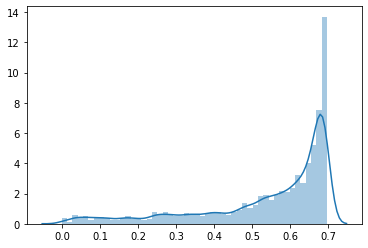

In [46]:
scores_kmeans = metrics.silhouette_samples(x_normalized_gen, labels_kmeans)
sns.distplot(scores_kmeans);

In [47]:
kmeans_gen.predict(principalDf_gen3).max()

1

In [ ]:
# score = metrics.silhouette_score(x_normalized_gen, labels)
# print('Score %f' %score)

#### GMM

In [ ]:
# from sklearn.mixture import GaussianMixture
# from sklearn import metrics

Score 0.528844


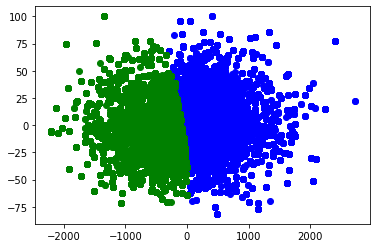

Score 0.506726


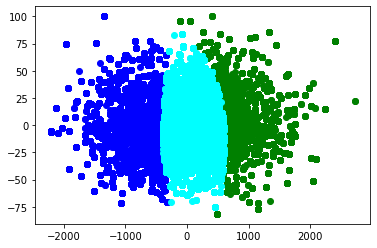

Score 0.493810


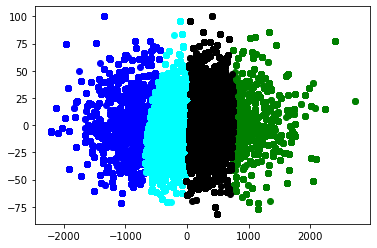

Score 0.478749


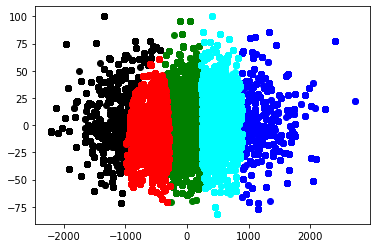

In [48]:
# training gaussian mixture model 
scores_gmm = []
k_list = [2, 3, 4, 5]
for k in k_list:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(principalComponents_gen)

    #predictions from gmm
    labels_g = gmm.predict(principalComponents_gen)
    score_g = metrics.silhouette_score(x_normalized_gen, labels_g)
    scores_gmm.append(score_g)
    print('Score %f' %score_g)
    
    frame = pd.DataFrame(principalComponents_gen)
    frame['cluster'] = labels_g
    frame.columns = ['PCA 1', 'PCA 2', 'cluster'] # cols_EBV[:2] + ['cluster']

    color=['blue','green','cyan', 'black', 'red', 'brown']
    for k in range(0, k):
        data = frame[frame["cluster"]==k]
        plt.scatter(data['PCA 1'] , data['PCA 2'], c=color[k])
    plt.show()

In [49]:
###  2 classes

scores_kmeans = np.array(scores_kmeans)
ind_good = np.argmax(scores_kmeans)
K1 = k_list[ind_good]
print('K = ', K1)

gmm = GaussianMixture(n_components=K1)
gmm.fit(principalComponents_gen)

#predictions from gmm
labels_gmm = gmm.predict(principalComponents_gen)
frame = pd.DataFrame(principalComponents_gen)
frame['cluster'] = labels_gmm
frame.columns = ['PCA 1', 'PCA 2', 'cluster'] # cols_EBV[:2] + ['cluster']

color=['blue','green','cyan', 'black', 'red', 'brown']
for k in range(0, K1):
    data = frame[frame["cluster"]==k]
    plt.scatter(data['PCA 1'] , data['PCA 2'], c=color[k])
plt.show()

IndexError: list index out of range

In [ ]:
score_gmm = metrics.silhouette_score(x_normalized_gen, labels_gmm)
score_gmm

In [ ]:
scores_gmm = metrics.silhouette_samples(x_normalized_gen, labels_gmm)
sns.distplot(scores_gmm);

# Etape 2: Time Series Forecasting

L'objectif de cette etape est de construire un modele de prediction du profit

In [ ]:
def show_graph(df1, df2, title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
def MAPE(y_orig, y_pred):
    diff = y_orig - y_pred
    MAPE = np.mean((abs(y_orig - y_pred)/y_orig)  * 100.)
    return MAPE

In [ ]:
Visualization pour detecter les variables temporelles

In [ ]:
# import seaborn as sns

# 
data_serie = x.drop(cols_date, axis = 1)

# Visualize the trends in data
j=0
for i in range(5, features.shape[0], 5):
    sns.set_style('darkgrid')
    data_serie.iloc[:305, j:i].plot(kind = 'line', legend = 'reverse', title = 'Visualizing Diary Cows Array Time-Series')
    plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
    plt.show()
    
    j=i

In [ ]:
cols = ['LHR_CD', 'LACT_NO', 'MILKNG_PTRN',
       'ANS_CD', 'DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE',
       'ABNRML_STATUS', 'MILKNG_FQCY', 'DAILY_MILK_VALUE', 'CUMUL_MILK_VALUE',
       'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'BHB', 'HR_24_FT', 'HR_24_PT',
       'CCD', 'MaBint', 'EBV_MILK', 'EBV_FAT',
       'EBV_PROT', 'EBV_FAT_PERCENT', 'EBV_PROT_PERCENT', 'SCS', 'RUMP_ANGLE',
       'PIN_WIDTH', 'LOIN_STRENGTH', 'UDDER_DEPTH', 'UDDER_TEXTURE',
       'MEDIAN_SUSP', 'FORE_ATTACH', 'FORE_TEAT_PLACE', 'REAR_ATTACH_HEIGHT',
       'REAR_ATTACH_WIDTH', 'REAR_TEAT_PLACE', 'TEAT_LENGTH', 'FOOT_ANGLE',
       'HEEL_DEPTH', 'BONE_QUALITY', 'REAR_LEG_SIDE_VIEW',
       'REAR_LEG_REAR_VIEW', 'STATURE', 'HEIGHT_AT_FRONT_END', 'CHEST_WIDTH',
       'BODY_DEPTH', 'ANGULARITY', 'LP', 'HL', 'MSP', 'MT', 'DF', 'CA', 'DCA',
       'BCS', 'MR', 'THURL_PLACE', 'MDR', 'cumul_profit']

j=0
for i in range(4, len(cols), 4):
    sns.set_style('darkgrid')
    data_serie.loc[:305, cols[j:i]].plot(kind = 'line', legend = 'reverse', title = 'Visualizing Diary Cows Array Time-Series')
    plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
    plt.show()
    
    j=i

In [ ]:
cols = ['DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE',
       'ABNRML_STATUS', 'MILKNG_FQCY', 'DAILY_MILK_VALUE', 'CUMUL_MILK_VALUE',
       'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'HR_24_FT', 'HR_24_PT',
       'CCD', 'MaBint', 'cumul_profit']
j=0
for c in range(2, len(cols), 2): #ds.columns:
    sns.set_style('darkgrid')
    # ds.loc[:1000, 'BHB'].plot(kind = 'line', legend = 'reverse', title = 'Visualizing Diary Cows Array Time-Series')
    data_serie[data_serie.ANM_ID==1].loc[:, cols[j:c]].plot(kind = 'line', legend = 'reverse', title = 'Visualizing Diary Cows Array Time-Series')
    plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
    plt.show()
    j=c

In [ ]:
cols = ['DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE',
       'ABNRML_STATUS', 'MILKNG_FQCY', 'DAILY_MILK_VALUE', 'CUMUL_MILK_VALUE',
       'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'HR_24_FT', 'HR_24_PT', 'cumul_profit']
cols_time_serie = cols + ['profit']
cols_time_serie

#### Correlation

In [63]:
# import seaborn as sns


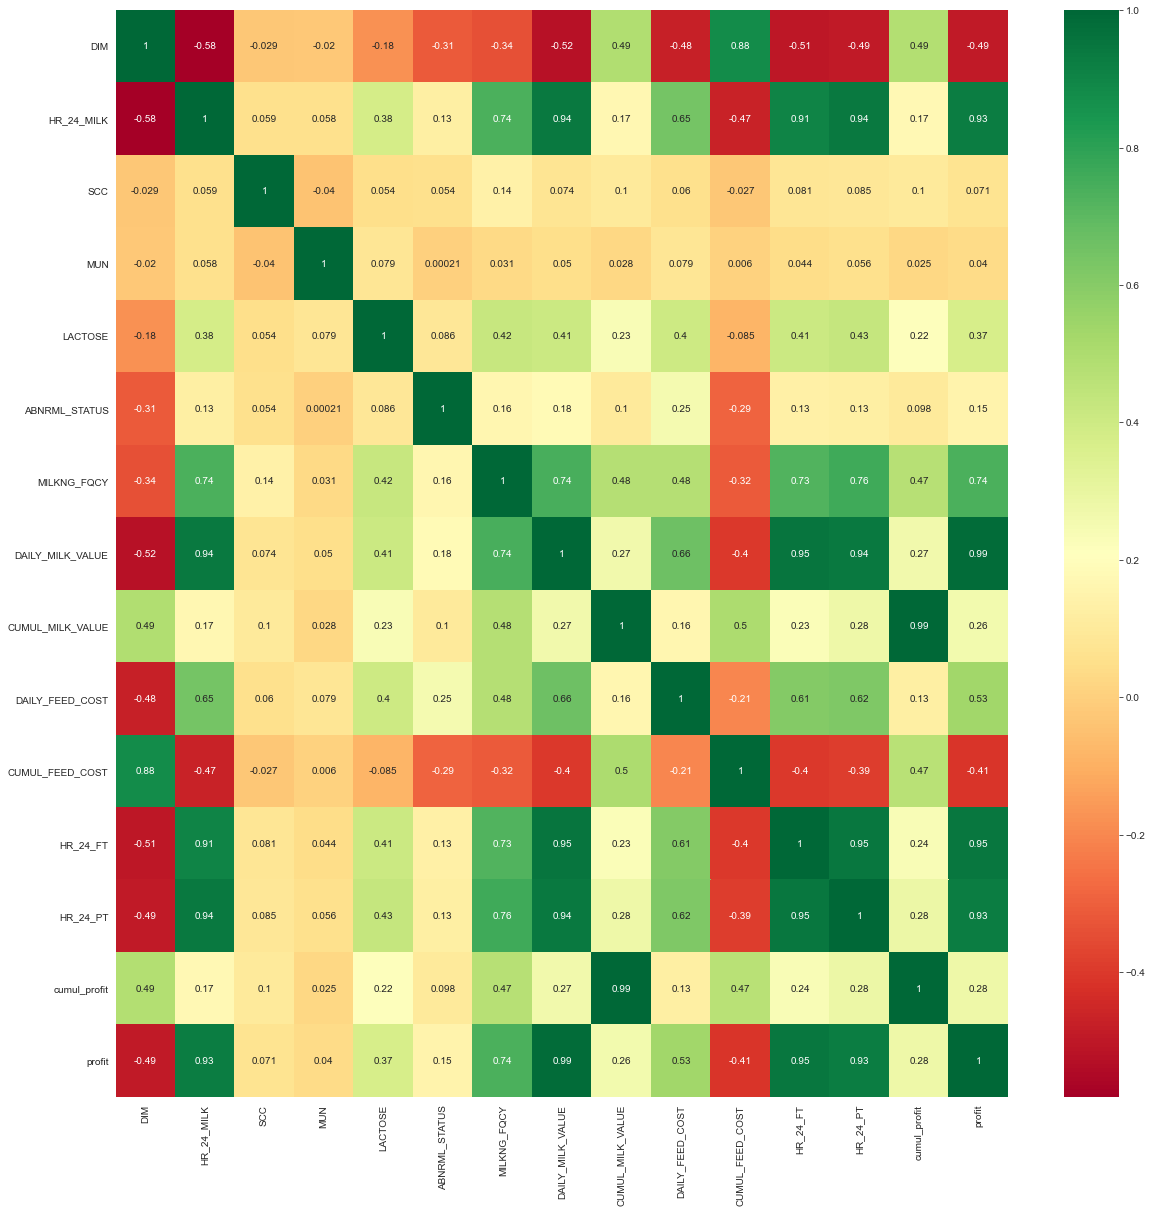

In [45]:
#get correlations of each features "in cols_time_series" in dataset
corrmat_animal = features[cols_time_serie].corr()
top_corr_features_animal = corrmat_animal.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features_animal].corr(),annot=True,cmap="RdYlGn")

##### Checking for Stationarity:
Non-stationary data has trends that are present in the data. We will have to eliminate this property because the Vector Autoregression (VAR) model, requires the data to be stationary.

"A Stationary series is one whose mean and variance do not change with time.
One of the ways to check for stationarity is the ADF test. The ADF test has to be implemented for all the 8 sensor readings column. We’ll also split the data into train & test subsets."

"The Augmented Dickey-Fuller test generates a tuple consisting of 6 parameters; the ADF test statistic, p-value, number of lags used, number of observations used, critical values at 1%, 5%, 10% levels and the maximized information criterion (icbest)."

Of the 6 values, we will be looking at the first 5 and using the p-value to determine if our series is stationary (p-value < 0.05) or not.


In [50]:
# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

In [51]:
cols_stat = ['ANB_CD', 'REG_ID', 'ANB_CD_DAM', 'COU_CD_DAM', 'DAM_REG_ID',
       'ANB_CD_SIRE', 'COU_CD_SIRE', 'SIRE_REG_ID', 'LACT_NO', 'MILKNG_PTRN',
       'ANS_CD', 'DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE',
       'ABNRML_STATUS', 'MILKNG_FQCY', 'DAILY_MILK_VALUE', 'CUMUL_MILK_VALUE',
       'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'BHB', 'HR_24_FT', 'HR_24_PT',
       'CCD', 'MaBint', 'INBREEDING', 'RVALUE', 'EBV_MILK', 'EBV_FAT',
       'EBV_PROT', 'EBV_FAT_PERCENT', 'EBV_PROT_PERCENT', 'SCS', 'RUMP_ANGLE',
       'PIN_WIDTH', 'LOIN_STRENGTH', 'UDDER_DEPTH', 'UDDER_TEXTURE',
       'MEDIAN_SUSP', 'FORE_ATTACH', 'FORE_TEAT_PLACE', 'REAR_ATTACH_HEIGHT',
       'REAR_ATTACH_WIDTH', 'REAR_TEAT_PLACE', 'TEAT_LENGTH', 'FOOT_ANGLE',
       'HEEL_DEPTH', 'BONE_QUALITY', 'REAR_LEG_SIDE_VIEW',
       'REAR_LEG_REAR_VIEW', 'STATURE', 'HEIGHT_AT_FRONT_END', 'CHEST_WIDTH',
       'BODY_DEPTH', 'ANGULARITY', 'LP', 'HL', 'MSP', 'MT', 'DF', 'CA', 'DCA',
       'BCS', 'MR', 'THURL_PLACE', 'MDR', 'profit', 'cumul_profit']

# ANB_CD:
# [0 3 1 4 2]
# ['AY':0, 'HO':3, 'BS':1, 'JE':4, 'CN':2]
# features.columns

In [52]:
# Splitting the dataset into train & test subsets
n_obs = 2000

ds = (features.sort_values(by='TEST_DATE') ).loc[:10000, cols_stat]
ds_train, ds_test = ds[:-n_obs], ds[-n_obs:]

# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity

def adf_test(ds):
    dftest = adfuller(ds, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])
    
    non_stat= False
    for key, value in dftest[4].items():
        adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        non_stat = True
    return non_stat


for i in ds_train.columns:
    print("Column: ",i)
    print('--------------------------------------')
    non_stat = adf_test(ds_train[i])
    print('\n')


Column:  ANB_CD
--------------------------------------
Test Statistic           -115.832416
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  REG_ID
--------------------------------------
Test Statistic           -115.227241
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  ANB_CD_DAM
--------------------------------------
Test Statistic           -115.884584
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Valu

Test Statistic           -113.480078
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  HR_24_PT
--------------------------------------
Test Statistic           -114.391629
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  CCD
--------------------------------------
Test Statistic           -114.063250
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary

Test Statistic            -80.141195
p-value                     0.000000
# Lags                      1.000000
# Observations          13289.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  FOOT_ANGLE
--------------------------------------
Test Statistic           -116.340385
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  HEEL_DEPTH
--------------------------------------
Test Statistic           -116.003501
p-value                     0.000000
# Lags                      0.000000
# Observations          13290.000000
Critical Value (1%)        -3.430842
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is S

In [114]:
# if variables are non-stationary, the next step is differencing them to eliminate non-stationarity.

# Differencing all variables to get rid of Stationarity
# if non_stat:
#     ds_differenced = ds_train.diff().dropna()

#     # Running the ADF test once again to test for Stationarity
#     for i in ds_differenced.columns:
#         print("Column: ",i)
#         print('--------------------------------------')
#         non_stat = adf_test(ds_differenced[i])
#         print('\n')
#     ds_final = ds_differenced
# else: ds_final = ds
    
# # Now cols: ... are non-stationary
# if non_stat:
#     ds_differenced = ds_differenced.diff().dropna()

#     # Running the ADF test for the 3rd time to test for Stationarity
#     for i in ds_differenced.columns:
#         print("Column: ",i)
#         print('--------------------------------------')
#         adf_test(ds_differenced[i])
#         print('\n')
#     ds_final = ds_differenced
# else: ds_final = ds

In [55]:
# if variables are non-stationary, the next step is differencing them to eliminate non-stationarity.

# Differencing all variables to get rid of Stationarity

ds_differenced = ds_train.diff().dropna()

# Running the ADF test once again to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    non_stat = adf_test(ds_differenced[i])
    print('\n')
ds_final = ds_differenced

Column:  ANB_CD
--------------------------------------
Test Statistic            -31.034692
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  REG_ID
--------------------------------------
Test Statistic            -30.057070
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  ANB_CD_DAM
--------------------------------------
Test Statistic            -31.223395
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Valu

Test Statistic            -30.348409
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  HR_24_PT
--------------------------------------
Test Statistic            -30.235375
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  CCD
--------------------------------------
Test Statistic            -36.009581
p-value                     0.000000
# Lags                      9.000000
# Observations          13280.000000
Critical Value (1%)        -3.430843
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary

Test Statistic            -30.053458
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  FOOT_ANGLE
--------------------------------------
Test Statistic            -29.311713
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  HEEL_DEPTH
--------------------------------------
Test Statistic            -30.304047
p-value                     0.000000
# Lags                     41.000000
# Observations          13248.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is S

In [56]:
ds_differenced = ds_differenced.diff().dropna()

# Running the ADF test for the 3rd time to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_differenced[i])
    print('\n')
ds_final = ds_differenced

Column:  ANB_CD
--------------------------------------
Test Statistic            -39.785226
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  REG_ID
--------------------------------------
Test Statistic            -39.401423
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  ANB_CD_DAM
--------------------------------------
Test Statistic            -39.655477
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Valu

Test Statistic            -38.393787
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  HR_24_PT
--------------------------------------
Test Statistic            -38.669989
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  CCD
--------------------------------------
Test Statistic            -30.961347
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary

Test Statistic            -38.595989
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  FOOT_ANGLE
--------------------------------------
Test Statistic            -39.949048
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is Stationary


Column:  HEEL_DEPTH
--------------------------------------
Test Statistic            -39.980874
p-value                     0.000000
# Lags                     41.000000
# Observations          13247.000000
Critical Value (1%)        -3.430844
Critical Value (5%)        -2.861758
Critical Value (10%)       -2.566886
dtype: float64

Series is S

In [121]:
## from statsmodels.graphics.tsaplots import plot_acf
## from statsmodels.graphics.tsaplots import plot_pacf
# 
# from statsmodels.tsa.stattools import acf, pacf


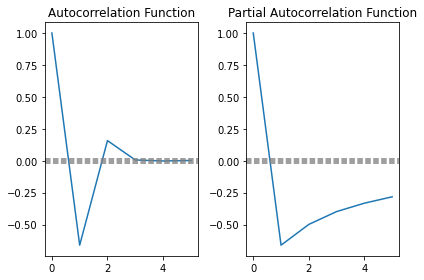

In [57]:
# AFC & PACF to dermine parameters (p, q).  ACF --> q and PACF --> p
lag_acf = acf(ds_final["profit"], nlags=5)
lag_pacf = pacf(ds_final["profit"], nlags=5, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_final["profit"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_final["profit"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_final["profit"])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_final["profit"])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) models

###### N.B. 
Je n'ai pas fini d'executer les cellules du Times series car je n'avais plus beaucoup de temps pour les reexecuter (probleme de capacite d'ordinateur).

The VARMAX class in statsmodels allows estimation of VAR, VMA, and VARMA models (through the order argument), optionally with a constant term (via the trend argument). Exogenous regressors may also be included (as usual in statsmodels, by the exog argument), and in this way a time trend may be added. Finally, the class allows measurement error (via the measurement_error argument) and allows specifying either a diagonal or unstructured innovation covariance matrix (via the error_cov_type argument).

Example 1: VARMAX
Below is a simple VARMAX(3,3) model in three endogenous variables and twelve exogenous series, but no constant term. Notice that we needed to allow for more iterations than the default (which is maxiter=50) in order for the likelihood estimation to converge. 

In [ ]:
# import statsmodels.api as sm


In [58]:
cols_exogenous = ['ANB_CD', 'ANB_CD_DAM', 'COU_CD_DAM',
       'ANB_CD_SIRE', 'COU_CD_SIRE', 'SIRE_REG_ID', 'LACT_NO', 'MILKNG_PTRN',
       'ANS_CD', 'DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE', 'ABNRML_STATUS', 
       'MILKNG_FQCY', 'CUMUL_MILK_VALUE', 'CUMUL_FEED_COST', 'BHB', 'HR_24_FT', 
       'HR_24_PT']
#         , 'INBREEDING', 'RVALUE', 'SCS', 'RUMP_ANGLE',
#        'PIN_WIDTH', 'LOIN_STRENGTH', 'UDDER_DEPTH', 'UDDER_TEXTURE',
#        'MEDIAN_SUSP', 'FORE_ATTACH', 'FORE_TEAT_PLACE', 'REAR_ATTACH_HEIGHT',
#        'REAR_ATTACH_WIDTH', 'REAR_TEAT_PLACE', 'TEAT_LENGTH', 'FOOT_ANGLE',
#        'HEEL_DEPTH', 'BONE_QUALITY', 'REAR_LEG_SIDE_VIEW',
#        'REAR_LEG_REAR_VIEW', 'STATURE', 'HEIGHT_AT_FRONT_END', 'CHEST_WIDTH',
#        'BODY_DEPTH', 'ANGULARITY', 'LP', 'HL', 'MSP', 'MT', 'DF', 'CA', 'DCA',
#        'BCS', 'MR', 'THURL_PLACE', 'MDR']

# ds_final[cols_exogenous].info()

In [59]:
# Test to get parameters p & q
exog = ds_train.loc[:3000, cols_exogenous] #['DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE', 'ABNRML_STATUS', 'MILKNG_FQCY', 
                     #'CUMUL_MILK_VALUE', 'CUMUL_FEED_COST', 'HR_24_FT', 'HR_24_PT', 'cumul_profit']]
model = []
for i in range(1, 7): # i == p
    for j in range(1, 6): # j == q
        model_exog = sm.tsa.VARMAX(ds_train.loc[:3000, ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']], order=(i, j), trend='n', exog=exog)

        res_exog = model_exog.fit(maxiter=1000, disp=False)
        model.append(res_exog)
        print('******** i= ', i, '****** j= ', j, '*******')
        print(res_exog.summary())

******** i=  1 ****** j=  1 *******
                                           Statespace Model Results                                          
Dep. Variable:     ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']   No. Observations:                 8508
Model:                                                   VARMAX(1,1)   Log Likelihood              -18239.634
Date:                                               Wed, 28 Apr 2021   AIC                          36653.269
Time:                                                       03:18:01   BIC                          37266.511
Sample:                                                            0   HQIC                         36862.526
                                                              - 8508                                         
Covariance Type:                                                 opg                                         
Ljung-Box (Q):          379.62, 131.28, 22.57   Jarque-Bera (JB):   514821.30, 6155.

KeyboardInterrupt: 

This confirm the results of ACF and PACF: P=1 and Q=1

In [149]:
print(len(model))

1


****** p=  1  & q=  1  ********


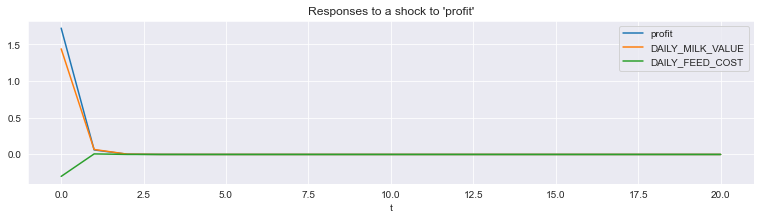

****** p=  1  & q=  2  ********


IndexError: list index out of range

In [150]:
for p in range(1,7):
    for q in range(1,6):
        print('****** p= ', p, ' & q= ', q, ' ********')
        ax = model[p+q-2].impulse_responses(20, orthogonalized=True).plot(figsize=(13,3))
        ax.set(xlabel='t', title="Responses to a shock to 'profit'")
        plt.show()

In [196]:
##### Evaluation (MSE, RMSE, MAPE)
# MAPE(ds_train.loc[1000:, ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']],  res_exog.impulse_responses(7000, orthogonalized=True))
# MAPE(ds_test[['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']],  res_exog.impulse_responses())
# res_exog.impulse_responses(10)
for p in range(1,7):
    for q in range(1,6):
        print('****** p= ', p, ' & q= ', q, ' ********')
        print( MAPE(ds_train.loc[3000:5000, ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']], model[p+q-2].predict(start=3000, end=5000, exog=exog[:2000]) ) )
        print('*********')           

****** p=  1  & q=  1  ********
profit             -44.824473
DAILY_MILK_VALUE          inf
DAILY_FEED_COST     45.858798
dtype: float64
*********
****** p=  1  & q=  2  ********
profit             -44.856215
DAILY_MILK_VALUE          inf
DAILY_FEED_COST     45.815152
dtype: float64
*********
****** p=  1  & q=  3  ********
profit             -44.801647
DAILY_MILK_VALUE          inf
DAILY_FEED_COST     45.897029
dtype: float64
*********
****** p=  1  & q=  4  ********
profit             -44.768762
DAILY_MILK_VALUE          inf
DAILY_FEED_COST     45.938800
dtype: float64
*********
****** p=  1  & q=  5  ********
profit             -44.759803
DAILY_MILK_VALUE          inf
DAILY_FEED_COST     45.959628
dtype: float64
*********
****** p=  2  & q=  1  ********
profit             -44.856215
DAILY_MILK_VALUE          inf
DAILY_FEED_COST     45.815152
dtype: float64
*********
****** p=  2  & q=  2  ********
profit             -44.801647
DAILY_MILK_VALUE          inf
DAILY_FEED_COST     45.897

In [132]:
ds_train.shape
# res_exog.get_forecast(step=1, exog=exog.iloc[0])
res_exog.predict(start=len(ds_train), end=len(ds_train), exog=exog.iloc[len(ds_train)-1])

C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


profit  DAILY_MILK_VALUE  DAILY_FEED_COST
8001  19.52613         26.334606         6.828497

In [197]:
for p in range(1,7):
    for q in range(1,6):
        print('****** p= ', p, ' & q= ', q, ' ********')
        print( model[p+q-2].predict(start=len(ds_train), end=len(ds_train), exog=exog.iloc[len(ds_train)-1]) )

****** p=  1  & q=  1  ********


IndexError: single positional indexer is out-of-bounds

In [141]:
MAPE(ds_train.loc[8000, ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']], 
     res_exog.predict(start=len(ds_train), end=len(ds_train), exog=exog.iloc[len(ds_train)-1]) )

C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


profit               0.236806
DAILY_MILK_VALUE     4.757300
DAILY_FEED_COST     16.419862
dtype: float64

profit


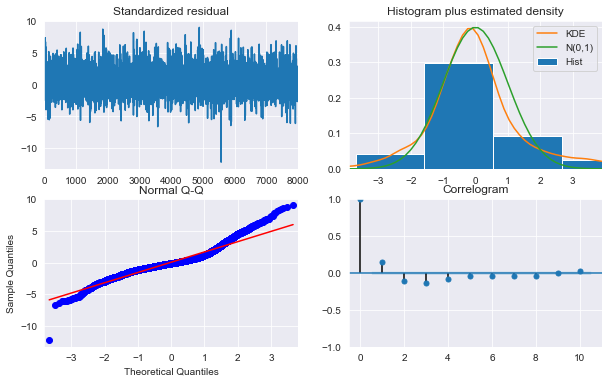

DAILY_MILK_VALUE


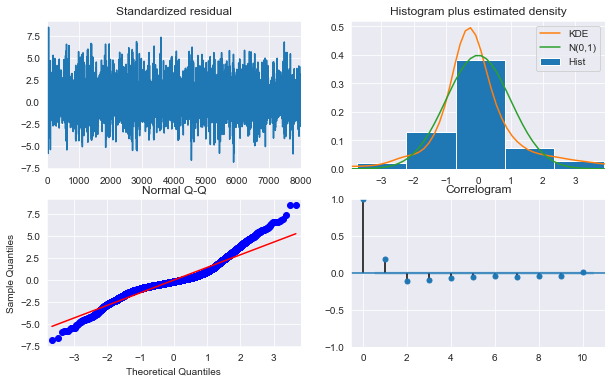

DAILY_FEED_COST


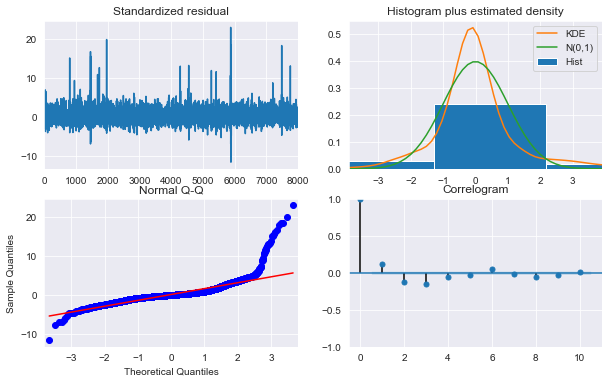

In [146]:
cols_print = ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']
for i in range(3):
    print(cols_print[i])
    res_exog.plot_diagnostics(variable=i, lags=10, fig=None, figsize=(10,6) )#, truncate_endog_names=24)
    plt.show()

In [150]:
res_exog.forecast(steps=7, exog=exog[-7:])

C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


profit  DAILY_MILK_VALUE  DAILY_FEED_COST
8001  19.214339         25.993806         6.793982
8002  18.382960         24.899181         6.533179
8003  17.178702         23.526920         6.324679
8004  15.619759         21.702007         6.066578
8005  16.049997         22.070227         5.912713
8006  18.366341         24.327181         5.886662
8007  18.760358         24.698051         5.890340

In [154]:
# from sklearn.metrics import mean_squared_error

# rmse = 
np.sqrt(mean_squared_error(ds_train[cols_print][-7:], res_exog.forecast(steps=7, exog=exog[-7:])))

C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


1.8827006680296943

In [272]:
# make prediction on validation
# Forecasting
# lag_order = 2000 #res.k_ar
exog_test = ds_test[['DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE', 'ABNRML_STATUS', 'MILKNG_FQCY', 
                 'CUMUL_MILK_VALUE', 'CUMUL_FEED_COST', 'HR_24_FT', 'HR_24_PT', 'cumul_profit']]
cols = ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']

predicted_exog = res.forecast( steps=len(ds_test), exog= exog_test) # (ds_test[cols_time_serie].values[-lag_order:], n_obs)

# Renaming
forecast_exog = predicted_exog.rename(columns = {'profit': 'profit_pred',
                                 'DAILY_MILK_VALUE': 'DAILY_MILK_VALUE_pred',
                                 'DAILY_FEED_COST': 'DAILY_FEED_COST_pred'
                                         })
# #converting predictions to dataframe
# forecast_exog = pd.DataFrame(predicted_exog,  columns = cols)
# # forecast_exog = pd.DataFrame(predicted_exog,  index = ds_test.index[-n_obs:], columns = cols)

C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [276]:
# from math import *


In [277]:
cols = ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']
#check rmse
for i in range(len(cols)):
    print('RMSE value for', cols[i], 'is : ', sqrt(mean_squared_error(forecast_exog.iloc[:, i], ds_test[cols[i]])))

RMSE value for profit is :  4.241997912808483
RMSE value for DAILY_MILK_VALUE is :  4.908211963306418
RMSE value for DAILY_FEED_COST is :  1.5281175655673271


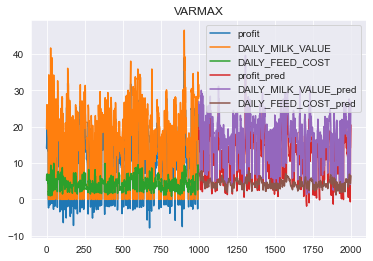

In [280]:
show_graph(ds_train.loc[:1000, cols], forecast_exog.iloc[:1000], 'VARMAX')

In [101]:
exog = ds_final.loc[:1000, ['DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE', 'ABNRML_STATUS', 'MILKNG_FQCY', 
                 'CUMUL_MILK_VALUE', 'CUMUL_FEED_COST', 'HR_24_FT', 'HR_24_PT', 'cumul_profit']]
#
cols = ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']

for i in range(4):
    for j in range(4):
        model_exog = sm.tsa.VARMAX(ds_train.loc[:1000, ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']], order=(i,j), trend='n', exog=exog)
        # fit
        res_exog = model_exog.fit(maxiter=1000, disp=False)
        #print(res_exog.summary())
        #check rmse
        for c in cols:
            print('RMSE value for', c, 'is : ', sqrt(mean_squared_error(forecast_exog[c], ds_test[c])))
        # plot
        ax = res_exog.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
        ax.set(xlabel='t', title='Responses to a shock to `profit');
        plt.show()

C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


KeyboardInterrupt: 

#### Vector Autoregression Moving-Average (VARMA) models

In [82]:
# sm.tsa.VARMAX( ds_final.loc[:400, ['profit']], order=(1,1) )
# ds_final.shape
# ds_final.loc[:400, cols_]

ANB_CD     REG_ID  ANB_CD_DAM  COU_CD_DAM  DAM_REG_ID  ANB_CD_SIRE  \
50683     0.0  1119695.0         0.0         0.0    400766.0          0.0   
55732     0.0 -1849801.0         0.0         0.0  -1317809.0          0.0   
58945     0.0    81470.0         0.0         0.0    529976.0          0.0   
29786     0.0  1153204.0         0.0         0.0    179939.0          0.0   
38096     0.0  -582450.0         0.0         0.0  -2330221.0          0.0   
...       ...        ...         ...         ...         ...          ...   
1483      0.0 -1166746.0         0.0         0.0   1000505.0          0.0   
43864     0.0   713403.0         0.0         0.0  -1812174.0          0.0   
57024     0.0    47693.0         0.0         0.0   1391935.0          0.0   
43637     0.0  -602156.0         0.0         0.0   -886163.0          0.0   
400       0.0   837476.0         0.0         0.0   1534897.0          0.0   

       COU_CD_SIRE  SIRE_REG_ID  LACT_NO  MILKNG_PTRN  ...    MT   DF    CA  \
50683          0.0     -19941.0     -1.0         -2.0  ...   7.0  6.0   4.0   
55732          0.0       7877.0      3.0          2.0  ...  -4.0 -2.0  -6.0   
58945          0.0      -3661.0     -1.0         -2.0  ...   2.0  1.0   1.0   
29786          0.0     -22969.0     -1.0          2.0  ...   5.0 -3.0   8.0   
38096          0.0      30247.0      1.0         -2.0  ... -11.0  1.0  -9.0   
...            ...          ...      ...          ...  ...   ...  ...   ...   
1483          12.0      -3086.0      0.0          4.0  ...  -5.0 -6.0 -13.0   
43864          0.0     -24864.0      5.0         -2.0  ...  -1.0  4.0   8.0   
57024          0.0      25301.0     -8.0          0.0  ...   3.0  1.0   1.0   
43637          0.0      -3331.0      8.0         -2.0  ...   0.0 -2.0 -11.0   
400           12.0     -17990.0     -7.0          4.0  ...   7.0 -3.0   6.0   

        DCA  BCS    MR  THURL_PLACE   MDR  profit  cumul_profit  
50683   2.0  4.0   0.0          2.0  -3.0    0.23       -2457.0  
55732  -5.0 -6.0   6.0         -3.0   7.0  -10.64       -5931.0  
58945   7.0  7.0  -6.0          2.0  -6.0   33.01        6104.0  
29786  -8.0 -4.0   0.0         -1.0   0.0  -25.04        2081.0  
38096   0.0 -1.0   0.0         -3.0   1.0    5.97       -4030.0  
...     ...  ...   ...          ...   ...     ...           ...  
1483    1.0 -1.0  -1.0          7.0  -3.0   26.95        5340.0  
43864  -7.0  9.0   1.0        -12.0   1.0  -30.09       -2088.0  
57024  11.0 -6.0  -1.0          9.0   5.0   23.92        3435.0  
43637  -6.0  6.0   5.0         -8.0  -1.0   -3.98       -1636.0  
400    -1.0 -9.0 -11.0          8.0 -11.0  -19.58       -3901.0  

[12546 rows x 70 columns]

In [107]:
for i in range(1, 5):
    for j in range(1, 3):
        model_varma = sm.tsa.VARMAX(ds_train[['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']], order=(i, j), exog=None)
        res_varma = model_varma.fit(maxiter=100, disp=False)
        print(res_varma.summary())

                                           Statespace Model Results                                          
Dep. Variable:     ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']   No. Observations:                13291
Model:                                                    VARMA(1,1)   Log Likelihood              -52422.799
                                                         + intercept   AIC                         104899.597
Date:                                               Wed, 28 Apr 2021   BIC                         105101.958
Time:                                                       03:48:07   HQIC                        104967.138
Sample:                                                            0                                         
                                                             - 13291                                         
Covariance Type:                                                 opg                                         
Ljung-Box 

                                           Statespace Model Results                                          
Dep. Variable:     ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']   No. Observations:                13291
Model:                                                    VARMA(2,1)   Log Likelihood              -52407.180
                                                         + intercept   AIC                         104886.360
Date:                                               Wed, 28 Apr 2021   BIC                         105156.174
Time:                                                       03:48:52   HQIC                        104976.414
Sample:                                                            0                                         
                                                             - 13291                                         
Covariance Type:                                                 opg                                         
Ljung-Box 

                                           Statespace Model Results                                          
Dep. Variable:     ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']   No. Observations:                13291
Model:                                                    VARMA(3,1)   Log Likelihood              -52395.464
                                                         + intercept   AIC                         104880.928
Date:                                               Wed, 28 Apr 2021   BIC                         105218.196
Time:                                                       03:49:42   HQIC                        104993.496
Sample:                                                            0                                         
                                                             - 13291                                         
Covariance Type:                                                 opg                                         
Ljung-Box 

                                           Statespace Model Results                                          
Dep. Variable:     ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']   No. Observations:                13291
Model:                                                    VARMA(4,1)   Log Likelihood              -52384.412
                                                         + intercept   AIC                         104876.825
Date:                                               Wed, 28 Apr 2021   BIC                         105281.546
Time:                                                       03:51:19   HQIC                        105011.906
Sample:                                                            0                                         
                                                             - 13291                                         
Covariance Type:                                                 opg                                         
Ljung-Box 

                                           Statespace Model Results                                          
Dep. Variable:     ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']   No. Observations:                13291
Model:                                                    VARMA(4,2)   Log Likelihood              -52384.390
                                                         + intercept   AIC                         104894.780
Date:                                               Wed, 28 Apr 2021   BIC                         105366.955
Time:                                                       03:53:27   HQIC                        105052.375
Sample:                                                            0                                         
                                                             - 13291                                         
Covariance Type:                                                 opg                                         
Ljung-Box 

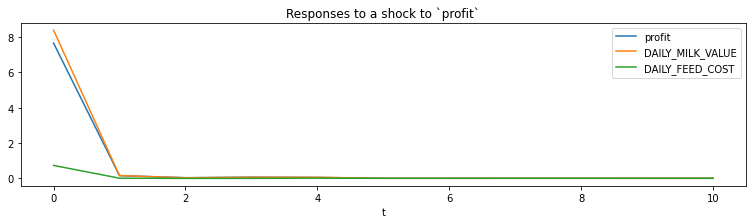

In [108]:
ax = res_varma.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `profit`');

### ARIMA models

Time Series Forcasting : ARIMA Model ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

* Number of AR (Auto-Regressive) terms (p) AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

* Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

* Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results. An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4. The ACF and PACF plots for the TS after differencing can be plotted as:

- From the ACF graph, we see that curve touches y=0.0 line at x=3. Thus, from theory, Q = 3.
- From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

###### ACF (1st way)

In [175]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# 
from statsmodels.tsa.stattools import acf, pacf

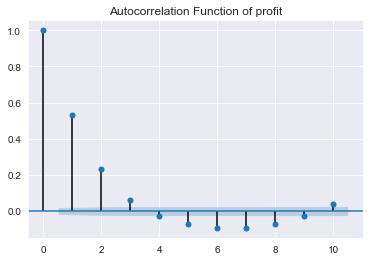

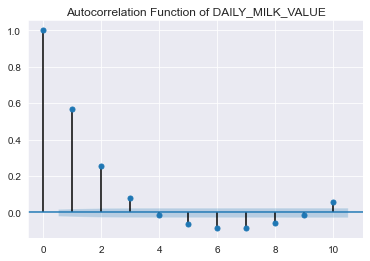

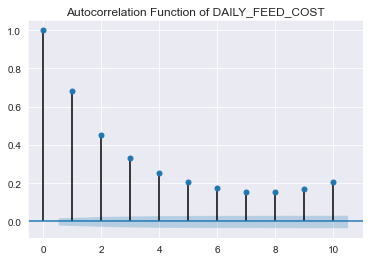

In [178]:
for c in ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']:
    plot_acf(ds_final[c], lags=10)
    plt.title('Autocorrelation Function of %s' %c)
    plt.show()

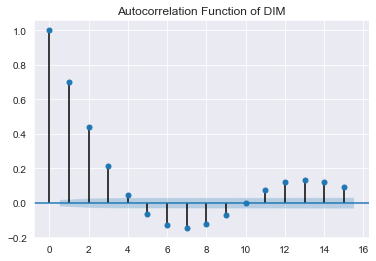

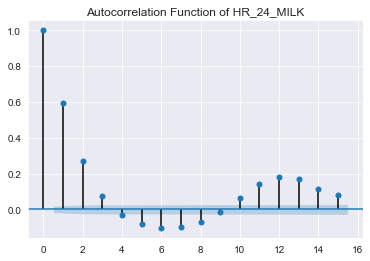

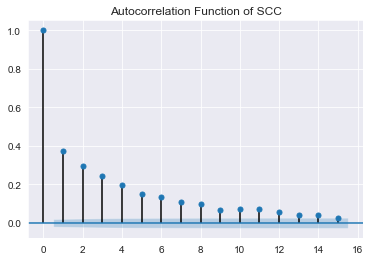

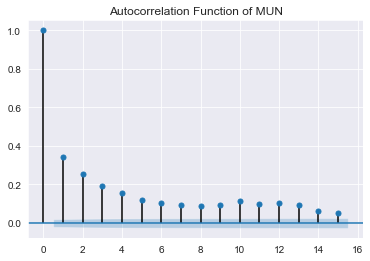

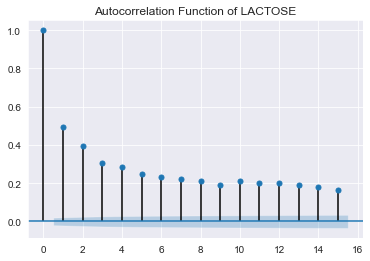

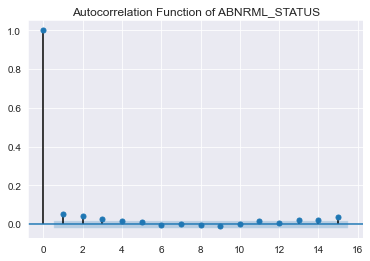

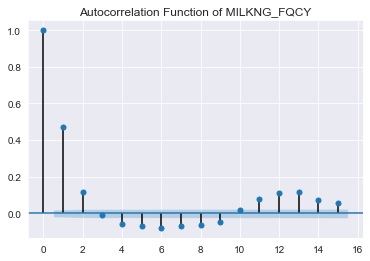

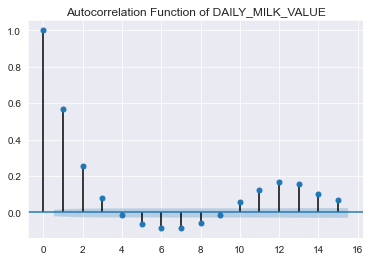

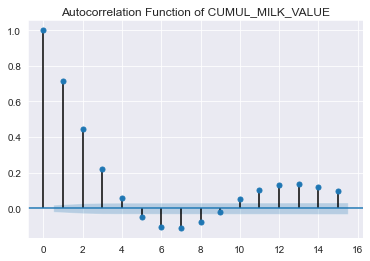

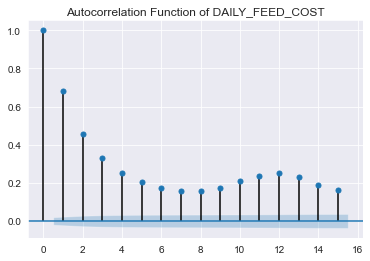

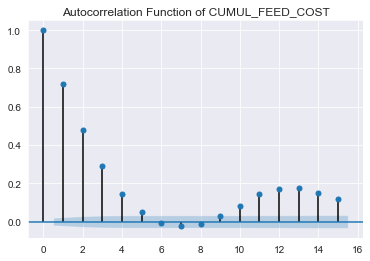

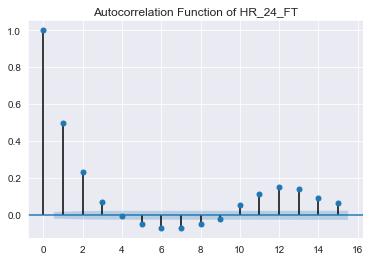

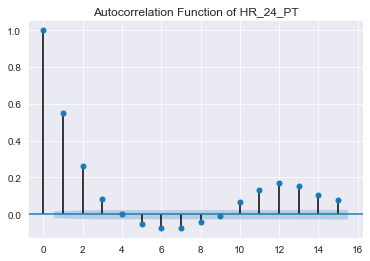

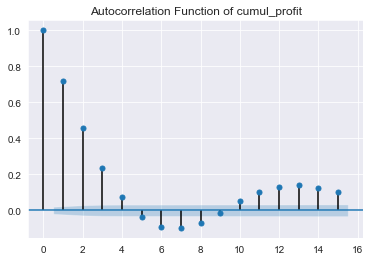

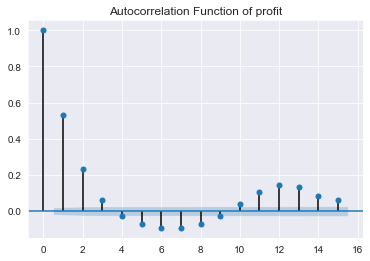

In [179]:
for c in cols_time_serie:
    plot_acf(ds_final[c], lags=15)
    plt.title('Autocorrelation Function of %s' %c)
    plt.show()

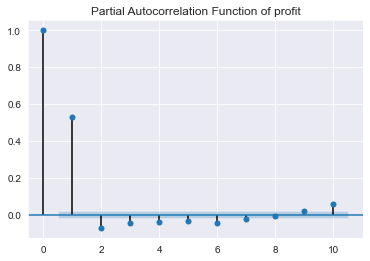

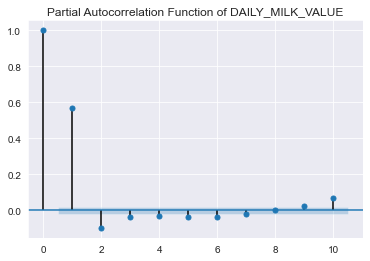

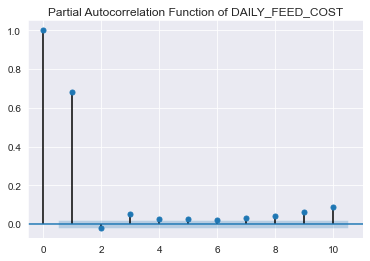

In [180]:
#PACF
for c in ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']:
    plot_pacf(ds_final[c], lags=10)
    plt.title('Partial Autocorrelation Function of %s' %c)
    plt.show()
# plot_pacf(series, lags=50)

###### ACF \& PACF (2nd way)

C:\Users\SAMAKE AWA\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


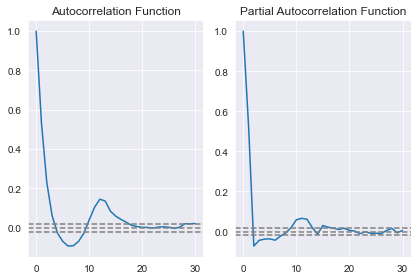

In [174]:
lag_acf = acf(ds_final["profit"], nlags=30)
lag_pacf = pacf(ds_final["profit"], nlags=30, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_final["profit"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_final["profit"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_final["profit"])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_final["profit"])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
model_arima = SARIMAX(ds_train['profit'], 
                order = (0, 1, 1))#, seasonal_order =(2, 1, 1, 12))
  
result_arima = model_arima.fit()
result_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 profit   No. Observations:                13291
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -45889.357
Date:                Wed, 28 Apr 2021   AIC                          91782.714
Time:                        03:34:36   BIC                          91797.704
Sample:                             0   HQIC                         91787.717
                              - 13291                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9980      0.001  -1750.290      0.000      -0.999      -0.997
sigma2        58.4147      0.719     81.214      0.000      57.005      59.824
===================================================================================
Ljung-Box (Q):                       42.57   Jarque-Bera (JB):               525.91
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.49
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
start = len(ds_train)
end = len(ds_train) + len(ds_test) - 1
  
# Predictions for one-year against the test set
predictions_arima = result_arima.predict(start, end,
                             typ = 'levels').rename("Predictions")
  

In [98]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print('rmse ', rmse(ds_test["profit"], predictions_arima) )
  
# Calculate mean squared error
print('mse ', mean_squared_error(ds_test["profit"], predictions_arima) )

rmse  7.694113940810548
mse  59.19938933417522


### Etape Classification (profit):

In [155]:
# data_serie = features.drop(cols_date, axis=1)

Object `plot.hist` not found.


AxesSubplot(0.125,0.125;0.775x0.755)


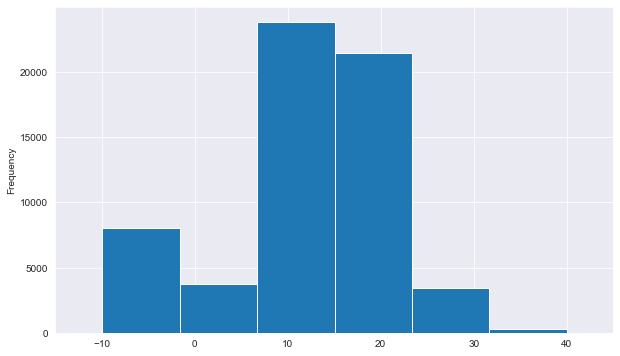

In [53]:
plt.figure(figsize=(10,6))
histogram = features['profit'].plot.hist(xlim=(-15, 45))
print(histogram)
plt.show()

***** profit  *****


<Figure size 720x576 with 0 Axes>

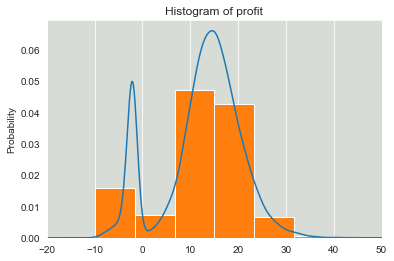

***** DAILY_MILK_VALUE  *****


<Figure size 720x576 with 0 Axes>

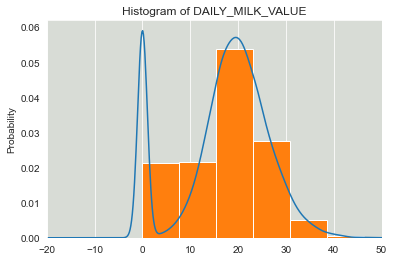

***** DAILY_FEED_COST  *****


<Figure size 720x576 with 0 Axes>

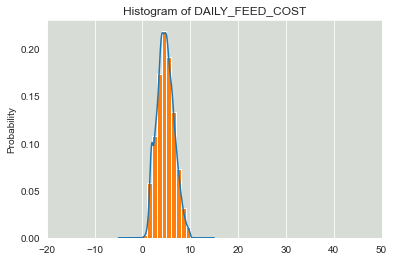

In [54]:
# Histogram
for c in ['profit', 'DAILY_MILK_VALUE', 'DAILY_FEED_COST']:
    print('***** %s  *****' %c)
    plt.figure(figsize=(10,8))
    fig, ax = plt.subplots()
    features[c].plot.kde(ax=ax, legend=False, title='Histogram of %s' %c)
    features[c].plot.hist(density=True, ax=ax)
    ax.set_ylabel('Probability')
    ax.grid(axis='y')
    ax.set_facecolor('#d8dcd6')
    plt.xlim(-20, 50)
    plt.show()


##### Seuil 0

In [82]:
# features[features.profit > 0]
print("Nombre de 'good profit': ", np.where(features.profit > 0)[0].shape[0])
print("Nombre de 'bad profit': ", np.where(features.profit < 0)[0].shape[0])

Nombre de 'good profit':  51447
Nombre de 'bad profit':  9287


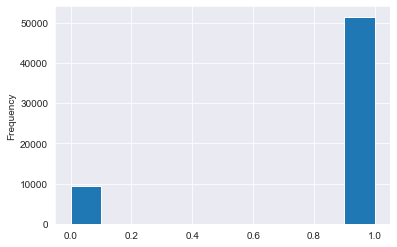

In [83]:
# class_profit = 0 if "profit <= 0" else class_profit=1
# Voir figure ci-dessus (histogramme), pour le choix du seuil 0
x['class_profit_0'] = 0
x.loc[np.where(features.profit > 0)[0], 'class_profit_0'] = 1
x['class_profit_0'].plot.hist()

##### Seuil mean_profit

In [84]:
mean_profit = features['profit'].mean()
print(mean_profit)

12.521563714191506


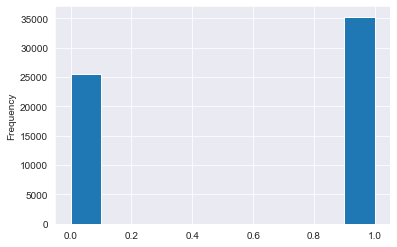

In [85]:
x['class_profit_mean'] = 0
x.loc[np.where(features.profit > mean_profit)[0], 'class_profit_mean'] = 1
x['class_profit_mean'].plot.hist()

# Etape 3 & 4

##### Seuil 0

In [88]:
# x_col = (x.columns).drop( cols_gen).tolist() + ['profit']
# features_col
# x.drop(['profit_x', 'profit_y'], axis=1)
x['profit'] = features['profit']

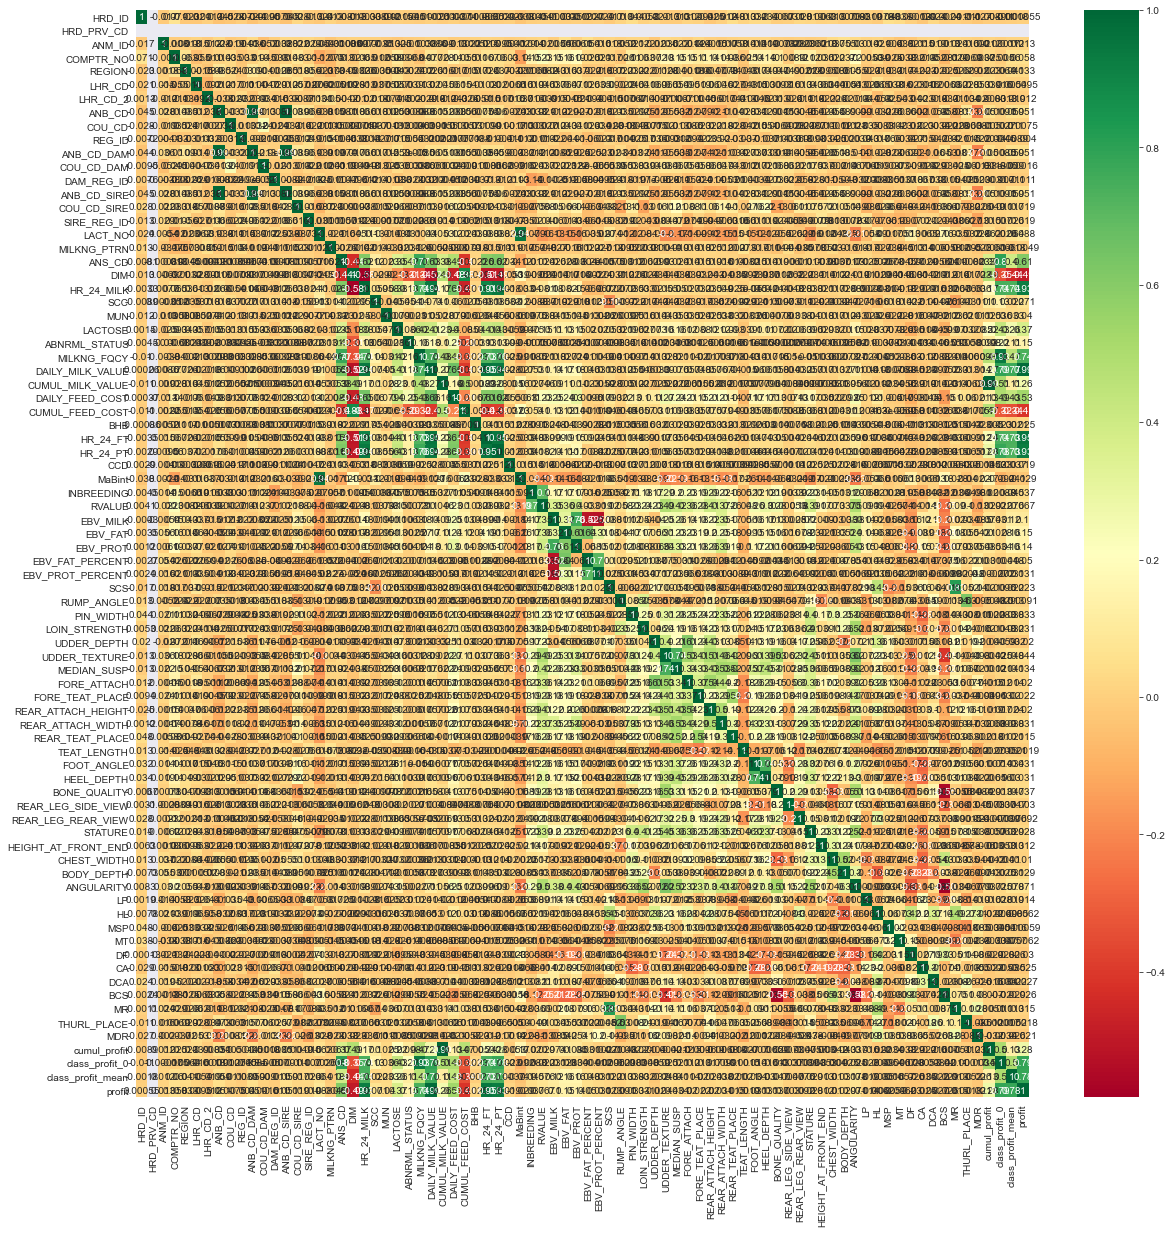

In [89]:
#get correlations of each features in dataset
# x_bad_profit = x.iloc[np.where(features.profit < 0)[0]]
corrmat_bad_profit = x.corr()
top_corr_features_bad_profit = corrmat_bad_profit.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x[top_corr_features_bad_profit].corr(), annot=True, cmap="RdYlGn")

In [90]:
attributes_neg_corr_0 = corrmat_bad_profit[ corrmat_bad_profit['class_profit_0'] < 0 ].index
attributes_neg_corr_0 = attributes_neg_corr_0.tolist()
print(attributes_neg_corr_0)
print(corrmat_bad_profit[ corrmat_bad_profit['class_profit_0'] < 0 ]['class_profit_0'])

['HRD_ID', 'ANM_ID', 'COMPTR_NO', 'LHR_CD_2', 'DAM_REG_ID', 'LACT_NO', 'DIM', 'CUMUL_FEED_COST', 'MaBint', 'EBV_PROT_PERCENT', 'TEAT_LENGTH', 'REAR_LEG_REAR_VIEW', 'CHEST_WIDTH', 'HL', 'MT', 'DF', 'DCA', 'BCS', 'THURL_PLACE', 'MDR']
HRD_ID               -0.011001
ANM_ID               -0.000167
COMPTR_NO            -0.004983
LHR_CD_2             -0.001348
DAM_REG_ID           -0.007014
LACT_NO              -0.002617
DIM                  -0.345189
CUMUL_FEED_COST      -0.321893
MaBint               -0.091884
EBV_PROT_PERCENT     -0.001955
TEAT_LENGTH          -0.001459
REAR_LEG_REAR_VIEW   -0.000386
CHEST_WIDTH          -0.004010
HL                   -0.006892
MT                   -0.006691
DF                   -0.028315
DCA                  -0.008449
BCS                  -0.020063
THURL_PLACE          -0.000173
MDR                  -0.003439
Name: class_profit_0, dtype: float64


##### Seuil mean_profit

In [91]:
attributes_neg_corr_mean = corrmat_bad_profit[ (corrmat_bad_profit['class_profit_mean']) < 0 ].index
attributes_neg_corr_mean = attributes_neg_corr_mean.tolist()
print(attributes_neg_corr_mean)
print(corrmat_bad_profit[ (corrmat_bad_profit['class_profit_mean']) < 0 ]['class_profit_mean'])

['HRD_ID', 'LHR_CD_2', 'REG_ID', 'DAM_REG_ID', 'MILKNG_PTRN', 'DIM', 'CUMUL_FEED_COST', 'BHB', 'MaBint', 'UDDER_DEPTH', 'HL', 'DF', 'CA', 'BCS', 'MDR']
HRD_ID            -0.001753
LHR_CD_2          -0.018895
REG_ID            -0.008949
DAM_REG_ID        -0.011392
MILKNG_PTRN       -0.017591
DIM               -0.440758
CUMUL_FEED_COST   -0.344698
BHB               -0.002132
MaBint            -0.040916
UDDER_DEPTH       -0.031670
HL                -0.008490
DF                -0.026421
CA                -0.035299
BCS               -0.029059
MDR               -0.025573
Name: class_profit_mean, dtype: float64


# Etape 5

In [92]:
# print('egalite ', len(np.where(labels_gmm==labels_kmeans)[0]))
# print('non egalite ', len(np.where(labels_gmm!=labels_kmeans)[0]))

In [93]:
x.shape

(60740, 84)

[1 2 0]


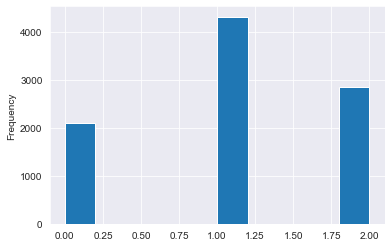

[3 0 1 2]


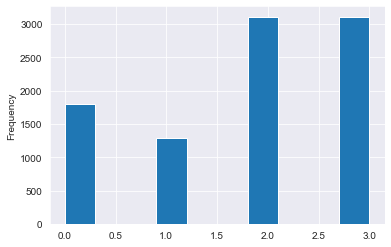

[3 2 4 1 0]


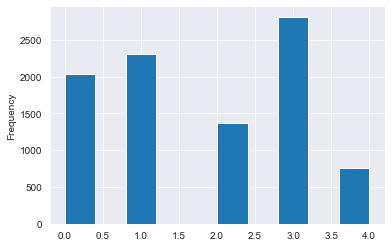

[4 0 3 5 1 2]


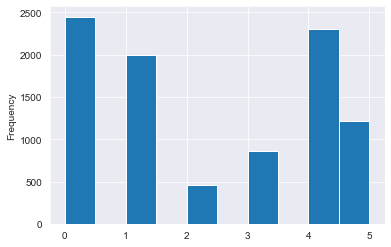

[3 4 0 1 2 5 6]


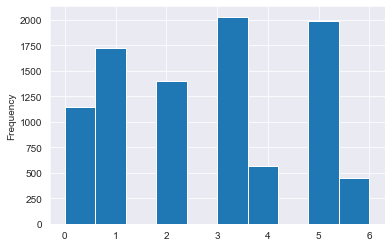

[4 0 6 5 7 2 1 3]


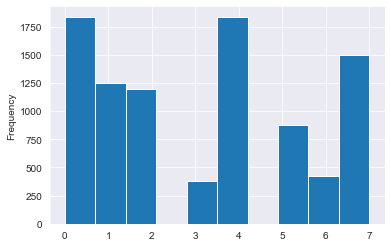

[5 0 2 6 7 4 3 1 8]


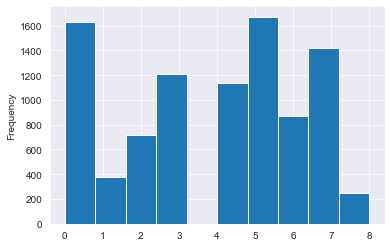

In [94]:
# Ici on teste pour voir si un grand nombre de cluster aurait un effet
for n in range(3, 10): #k_list:
    pca_gen3 = PCA(n_components=3)
    principalComponents_gen3 = pca_gen3.fit_transform(x_normalized_gen)
    principalDf_gen3 = pd.DataFrame(data = principalComponents_gen3)#, columns = ['PCA 1', 'PCA 2', 'PCA 3'])
    # X = X.reset_index(drop=True)
    kmeans_gen = KMeans(n_clusters=n)
    kmeans_gen.fit(principalDf_gen3)
    kmeans_gen.predict(principalDf_gen3)
    labels = kmeans_gen.labels_
    x['labels_gen_kmeans'] = labels
    x_bad_profit = x.iloc[np.where(features.profit < 0)[0]]

    # classes of "genetics" with bad profit"
    print(pd.unique(x_bad_profit['labels_gen_kmeans']))
    x_bad_profit['labels_gen_kmeans'].plot.hist()
    plt.show()

[1 0]


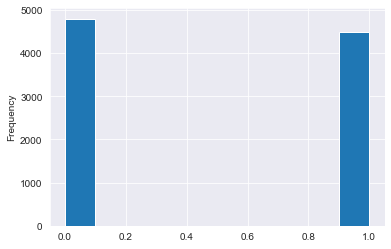

In [95]:
x['labels_gen_kmeans'] = labels_kmeans
x_bad_profit = x.iloc[np.where(features.profit < 0)[0]]

# classes of "genetics" with bad profit"
print(pd.unique(x_bad_profit['labels_gen_kmeans']))
x_bad_profit['labels_gen_kmeans'].plot.hist()

In [96]:
x_bad_profit[attributes_neg_corr_0 + ['labels_gen_kmeans']]

HRD_ID  ANM_ID  COMPTR_NO  LHR_CD_2  DAM_REG_ID  LACT_NO    DIM  \
12       1687       1      508.0       8.0   1606165.0        1  376.0   
13       1687       1      508.0       8.0   1606165.0        1  376.0   
14       1687       1      508.0       8.0   1606165.0        1  376.0   
22       1687       1      508.0       8.0   1606165.0        2  304.0   
23       1687       1      508.0       8.0   1606165.0        2  304.0   
...       ...     ...        ...       ...         ...      ...    ...   
60696    1383   13951      576.0       8.0    925668.0        3    0.0   
60710    1383   13951      576.0       8.0    925668.0        3  420.0   
60726    2994   13953      475.0       8.0   1143341.0        3  302.0   
60736    2994   13953      475.0       8.0   1143341.0        4  336.0   
60737    2994   13953      475.0       8.0   1143341.0        5   13.0   

       CUMUL_FEED_COST  MaBint  EBV_PROT_PERCENT  ...  REAR_LEG_REAR_VIEW  \
12              2123.0      43             -0.03  ...                 2.0   
13              2188.0      44             -0.03  ...                 2.0   
14              2244.0      45             -0.03  ...                 2.0   
22              1735.0      55             -0.03  ...                 2.0   
23              1735.0      56             -0.03  ...                 2.0   
...                ...     ...               ...  ...                 ...   
60696              0.0      55              0.20  ...                 4.0   
60710           2720.0      69              0.20  ...                 4.0   
60726           1366.0      63             -0.01  ...                 0.0   
60736           1550.0      75             -0.01  ...                 0.0   
60737             71.0      76             -0.01  ...                 0.0   

       CHEST_WIDTH     HL     MT     DF    DCA    BCS  THURL_PLACE    MDR  \
12             6.0   99.0  103.0  104.0  100.0  100.0          2.0   98.0   
13             6.0   99.0  103.0  104.0  100.0  100.0          2.0   98.0   
14             6.0   99.0  103.0  104.0  100.0  100.0          2.0   98.0   
22             6.0   99.0  103.0  104.0  100.0  100.0          2.0   98.0   
23             6.0   99.0  103.0  104.0  100.0  100.0          2.0   98.0   
...            ...    ...    ...    ...    ...    ...          ...    ...   
60696          3.0  102.0   97.0  101.0  101.0   99.0         -1.0  102.0   
60710          3.0  102.0   97.0  101.0  101.0   99.0         -1.0  102.0   
60726          1.0   97.0  100.0  101.0  100.0  105.0         -2.0   97.0   
60736          1.0   97.0  100.0  101.0  100.0  105.0         -2.0   97.0   
60737          1.0   97.0  100.0  101.0  100.0  105.0         -2.0   97.0   

       labels_gen_kmeans  
12                     1  
13                     1  
14                     1  
22                     1  
23                     1  
...                  ...  
60696                  1  
60710                  1  
60726                  1  
60736                  1  
60737                  1  

[9287 rows x 21 columns]

##### Seuil mean_profit

[1 0]


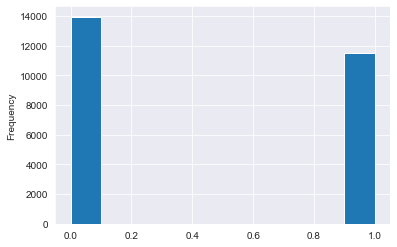

In [97]:
x['labels_gen_kmeans'] = labels_kmeans
x_bad_profit_mean = x.iloc[np.where(features.profit < mean_profit)[0]]

# classes of "genetics" with bad profit"
print(pd.unique(x_bad_profit_mean['labels_gen_kmeans']))
x_bad_profit_mean['labels_gen_kmeans'].plot.hist()

In [98]:
(np.where(features.profit > mean_profit)[0]).shape

(35254,)